In [11]:
import pandas as pd
import numpy as np

In [28]:
# Đọc file CSV
input_file = 'data/data_csv/player/all_players_cleaned.csv'
output_file = 'data/data_csv/player/all_players_processed.csv'
df = pd.read_csv(input_file)
# In tong so hang
print(f"Số hàng: {len(df)}")


Số hàng: 3980


In [1]:

# In thông tin ban đầu
print("\nThông tin ban đầu:")
print(f"Số hàng: {len(df)}")
print(f"Số cột: {len(df.columns)}")
print("\nCác cột trong dataset:")
print(df.columns.tolist())

# Kiểm tra và loại bỏ các hàng có team_name trống
print("\nĐang xử lý dữ liệu...")
df_cleaned = df.dropna(subset=['team_name'])

# In thông tin sau khi xử lý
print("\nThông tin sau khi xử lý:")
print(f"Số hàng còn lại: {len(df_cleaned)}")
print(f"Số hàng đã xóa: {len(df) - len(df_cleaned)}")

# Lưu kết quả
print("\nĐang lưu file...")
df_cleaned.to_csv(output_file, index=False)
print(f"Đã lưu kết quả vào file: {output_file}")

# In mẫu dữ liệu
print("\nMẫu dữ liệu sau khi xử lý:")
print(df_cleaned.head()) 

Đang đọc file...

Thông tin ban đầu:
Số hàng: 3980
Số cột: 260

Các cột trong dataset:
['player_id', 'name', 'season', 'position', 'age', 'team_name', 'team_short_name', 'mins_played', 'goals', 'accurate_back_zone_pass', 'accurate_chipped_pass', 'accurate_corners_intobox', 'accurate_cross', 'accurate_cross_nocorner', 'accurate_flick_on', 'accurate_freekick_cross', 'accurate_fwd_zone_pass', 'accurate_goal_kicks', 'accurate_keeper_sweeper', 'accurate_keeper_throws', 'accurate_launches', 'accurate_layoffs', 'accurate_long_balls', 'accurate_pass', 'accurate_pull_back', 'accurate_through_ball', 'accurate_throws', 'aerial_lost', 'aerial_won', 'appearances', 'assist_attempt_saved', 'assist_blocked_shot', 'assist_free_kick_won', 'assist_handball_won', 'assist_own_goal', 'assist_pass_lost', 'assist_penalty_won', 'assist_post', 'att_assist_openplay', 'att_assist_setplay', 'att_bx_centre', 'att_bx_left', 'att_bx_right', 'att_cmiss_high', 'att_cmiss_high_left', 'att_cmiss_high_right', 'att_cmiss_l

In [29]:
def convert_age_to_decimal(age_str):
    """
    Chuyển đổi chuỗi tuổi dạng 'X year Y day' thành số thập phân biểu thị số năm.
    Xử lý các trường hợp đặc biệt như NaN, số nguyên, và chuỗi không hợp lệ.
    """
    
    # Nếu đã là số
    if isinstance(age_str, (int, float)):
        return int(age_str)
    
    # Tách chuỗi thành các phần
    parts = str(age_str).lower().split()
    
    # Lấy số năm
    years = int(parts[0])

    return years


df = df.dropna(subset=['age'])
print(f"Số hàng sau khi loại bỏ age NaN: {len(df)}")
df['age'] = df['age'].apply(convert_age_to_decimal)

Số hàng sau khi loại bỏ age NaN: 3977


In [30]:
# Kiểm tra số lượng bản ghi trùng lặp
duplicates = df.duplicated()
print(f"Số bản ghi trùng lặp: {duplicates.sum()}")

# Hiển thị các bản ghi trùng lặp
if duplicates.sum() > 0:
    print("\nCác bản ghi trùng lặp:")
    print(df[duplicates])

# Xóa các bản ghi trùng lặp và giữ lại bản ghi đầu tiên
df = df.drop_duplicates()
print(f"\nSố bản ghi sau khi xóa trùng lặp: {len(df)}")

Số bản ghi trùng lặp: 991

Các bản ghi trùng lặp:
      player_id             name     season  \
1990       1870        Lee Grant  2021-2022   
1991       2100     James Milner  2021-2022   
1992       2214    Robert Elliot  2021-2022   
1993       2216  Darren Randolph  2021-2022   
1994       2250     Scott Carson  2021-2022   
...         ...              ...        ...   
2976     122634     Adrian Blake  2021-2022   
2977     122872   Jeong Sang-Bin  2021-2022   
2978     123450   Yáser Asprilla  2021-2022   
2979     124176     Jack Grieves  2021-2022   
2980     126837       Diego Rosa  2021-2022   

                                  position  age               team_name  \
1990                            Goalkeeper   42       Manchester United   
1991  Left/Centre/Right Central Midfielder   39  Brighton & Hove Albion   
1992                            Goalkeeper   39               Gateshead   
1993                            Goalkeeper   38                     NaN   
1994      

In [31]:
# In info của df
print(df.info())
# In so hang cua df
print(f"Số hàng: {len(df)}")
# In so cot cua df
print(f"Số cột: {len(df.columns)}")


<class 'pandas.core.frame.DataFrame'>
Index: 2986 entries, 0 to 3979
Columns: 260 entries, player_id to yellow_card
dtypes: float64(253), int64(2), object(5)
memory usage: 5.9+ MB
None
Số hàng: 2986
Số cột: 260


In [32]:
# Kiểm tra xem các cột có tồn tại không
columns_to_drop = ['team_name', 'team_short_name']
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    print(f"Đang xóa các cột: {existing_columns}")
    df = df.drop(columns=existing_columns)
    print(f"Số cột còn lại: {len(df.columns)}")
    print("Các cột còn lại:")
    print(df.columns.tolist())
else:
    print("Không tìm thấy cột team_name hoặc team_short_name trong dataset")

Đang xóa các cột: ['team_name', 'team_short_name']
Số cột còn lại: 258
Các cột còn lại:
['player_id', 'name', 'season', 'position', 'age', 'mins_played', 'goals', 'accurate_back_zone_pass', 'accurate_chipped_pass', 'accurate_corners_intobox', 'accurate_cross', 'accurate_cross_nocorner', 'accurate_flick_on', 'accurate_freekick_cross', 'accurate_fwd_zone_pass', 'accurate_goal_kicks', 'accurate_keeper_sweeper', 'accurate_keeper_throws', 'accurate_launches', 'accurate_layoffs', 'accurate_long_balls', 'accurate_pass', 'accurate_pull_back', 'accurate_through_ball', 'accurate_throws', 'aerial_lost', 'aerial_won', 'appearances', 'assist_attempt_saved', 'assist_blocked_shot', 'assist_free_kick_won', 'assist_handball_won', 'assist_own_goal', 'assist_pass_lost', 'assist_penalty_won', 'assist_post', 'att_assist_openplay', 'att_assist_setplay', 'att_bx_centre', 'att_bx_left', 'att_bx_right', 'att_cmiss_high', 'att_cmiss_high_left', 'att_cmiss_high_right', 'att_cmiss_left', 'att_cmiss_right', 'att_c

In [33]:
# Kiểm tra tỷ lệ null của từng cột
null_percentages = (df.isnull().sum() / len(df)) * 100
print("Tỷ lệ null của từng cột:")
print(null_percentages)

# Lấy danh sách các cột có tỷ lệ null > 80%
columns_to_drop = null_percentages[null_percentages > 80].index.tolist()
print("Số cột bị xóa: ", len(columns_to_drop))
print(columns_to_drop)

# Xóa các cột có tỷ lệ null > 80%
df = df.drop(columns=columns_to_drop)

# Xử lý các cột còn lại
print("\nĐang xử lý các cột còn lại...")

# Xử lý các cột số (numeric)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        print(f"\nĐang xử lý cột số: {col}")
        # Fill với giá trị trung bình theo position
        df[col] = df[col].fillna(df.groupby('position')[col].transform('mean'))
        # Nếu vẫn còn null, fill với giá trị trung bình chung
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())
        print(f"Số giá trị null còn lại: {df[col].isnull().sum()}")


# Kiểm tra kết quả cuối cùng
print("\nKiểm tra kết quả cuối cùng:")
print("Số lượng null còn lại trong mỗi cột:")
print(df.isnull().sum())
print("\nTỷ lệ null còn lại trong mỗi cột:")
print((df.isnull().sum() / len(df)) * 100)

Tỷ lệ null của từng cột:
player_id       0.000000
name            0.000000
season          0.000000
position        0.000000
age             0.000000
                 ...    
wins           56.028131
won_contest    60.683188
won_corners    63.194910
won_tackle     58.338915
yellow_card    64.902880
Length: 258, dtype: float64
Số cột bị xóa:  110
['accurate_corners_intobox', 'accurate_freekick_cross', 'accurate_goal_kicks', 'accurate_keeper_sweeper', 'accurate_keeper_throws', 'accurate_pull_back', 'accurate_through_ball', 'assist_attempt_saved', 'assist_blocked_shot', 'assist_free_kick_won', 'assist_handball_won', 'assist_own_goal', 'assist_pass_lost', 'assist_penalty_won', 'assist_post', 'att_assist_setplay', 'att_cmiss_high', 'att_cmiss_high_left', 'att_cmiss_high_right', 'att_cmiss_left', 'att_cmiss_right', 'att_fastbreak', 'att_freekick_goal', 'att_freekick_miss', 'att_freekick_post', 'att_freekick_target', 'att_freekick_total', 'att_goal_high_centre', 'att_goal_high_left', 'att_goa

In [34]:
# Kiểm tra cùng player_id nhưng khác name
print("Kiểm tra cùng player_id nhưng khác name:")
player_id_groups = df.groupby('player_id')['name'].nunique()
duplicate_ids = player_id_groups[player_id_groups > 1]
if len(duplicate_ids) > 0:
    print(f"Số lượng player_id có nhiều tên khác nhau: {len(duplicate_ids)}")
    print("\nChi tiết các player_id có nhiều tên:")
    for player_id in duplicate_ids.index:
        names = df[df['player_id'] == player_id]['name'].unique()
        print(f"\nPlayer ID: {player_id}")
        print(f"Các tên tương ứng: {names}")
else:
    print("Không có player_id nào có nhiều tên khác nhau")

# Kiểm tra cùng name nhưng khác player_id
print("\nKiểm tra cùng name nhưng khác player_id:")
name_groups = df.groupby('name')['player_id'].nunique()
duplicate_names = name_groups[name_groups > 1]
if len(duplicate_names) > 0:
    print(f"Số lượng tên có nhiều player_id khác nhau: {len(duplicate_names)}")
    print("\nChi tiết các tên có nhiều player_id:")
    for name in duplicate_names.index:
        ids = df[df['name'] == name]['player_id'].unique()
        print(f"\nTên: {name}")
        print(f"Các player_id tương ứng: {ids}")
else:
    print("Không có tên nào có nhiều player_id khác nhau")

Kiểm tra cùng player_id nhưng khác name:
Không có player_id nào có nhiều tên khác nhau

Kiểm tra cùng name nhưng khác player_id:
Không có tên nào có nhiều player_id khác nhau


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

Kiểm tra outliers cho các cột số:


Cột: player_id
Số lượng outliers (IQR): 2
Giá trị outliers (IQR):
player_id
302305    1
303421    1
Name: count, dtype: int64

Số lượng outliers (Z-score): 2
Giá trị outliers (Z-score):
player_id
302305    1
303421    1
Name: count, dtype: int64


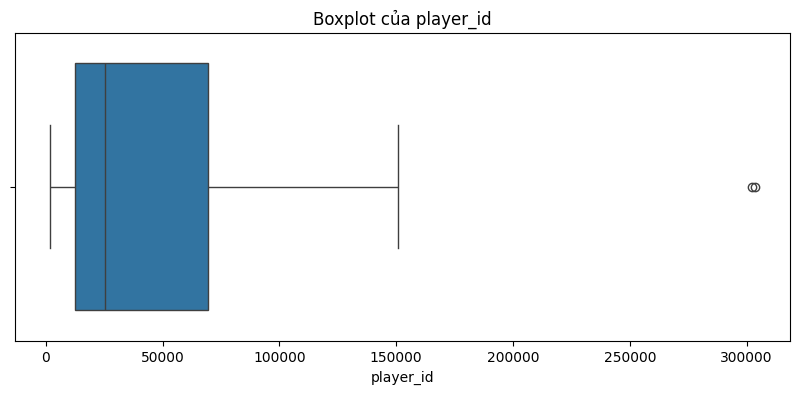


Cột: age
Số lượng outliers (IQR): 2
Giá trị outliers (IQR):
age
43    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 5
Giá trị outliers (Z-score):
age
42    3
43    2
Name: count, dtype: int64


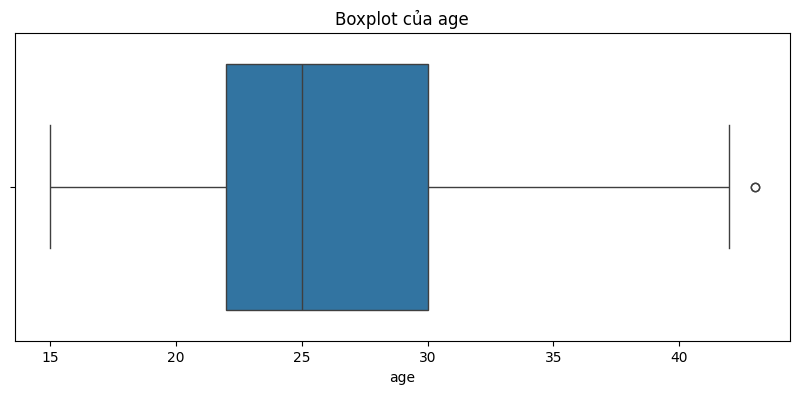


Cột: mins_played
Số lượng outliers (IQR): 155
Giá trị outliers (IQR):
mins_played
3240.0    11
3420.0     6
3150.0     6
2899.0     5
3330.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 0


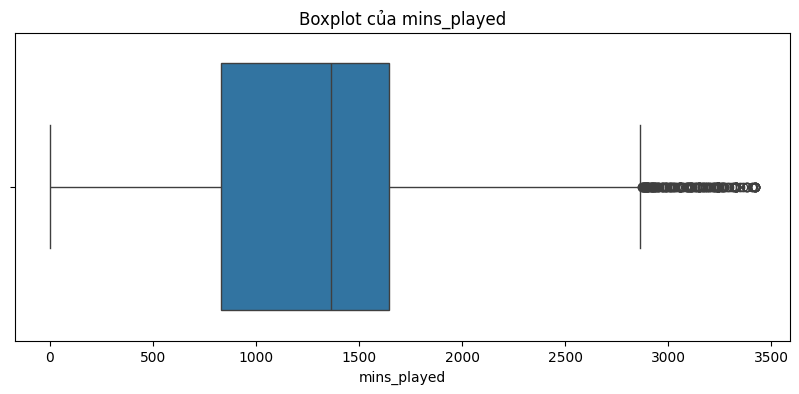


Cột: goals
Số lượng outliers (IQR): 111
Giá trị outliers (IQR):
goals
8.0     24
10.0    15
9.0     13
11.0    13
13.3    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
goals
11.0    13
13.3    11
15.0     6
12.0     5
13.0     4
Name: count, dtype: int64


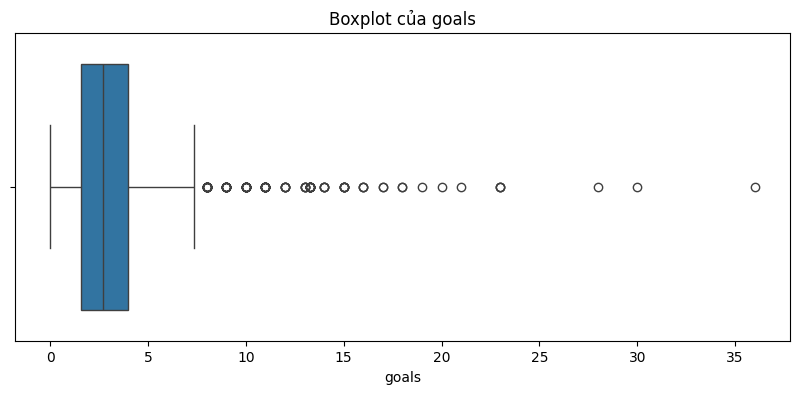


Cột: accurate_back_zone_pass
Số lượng outliers (IQR): 161
Giá trị outliers (IQR):
accurate_back_zone_pass
789.083333     5
715.000000     3
679.000000     2
1295.000000    2
902.000000     2
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
accurate_back_zone_pass
1251.0    2
964.0     2
1242.0    2
1045.0    2
1295.0    2
Name: count, dtype: int64


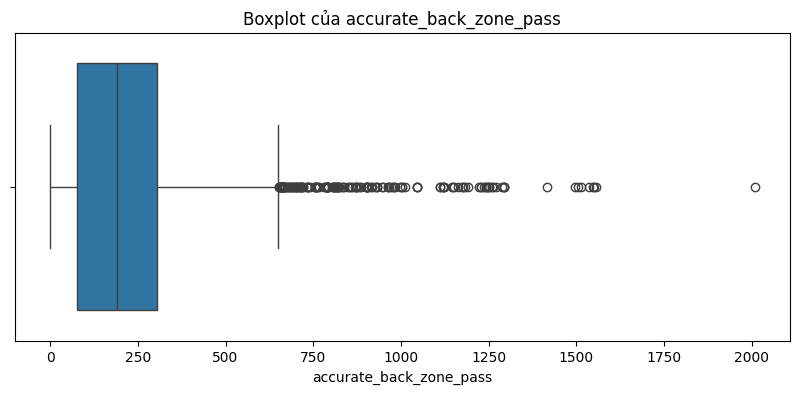


Cột: accurate_chipped_pass
Số lượng outliers (IQR): 93
Giá trị outliers (IQR):
accurate_chipped_pass
86.0     7
94.0     6
80.0     4
85.0     4
110.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 54
Giá trị outliers (Z-score):
accurate_chipped_pass
110.0    3
101.0    3
98.0     3
125.0    3
111.0    3
Name: count, dtype: int64


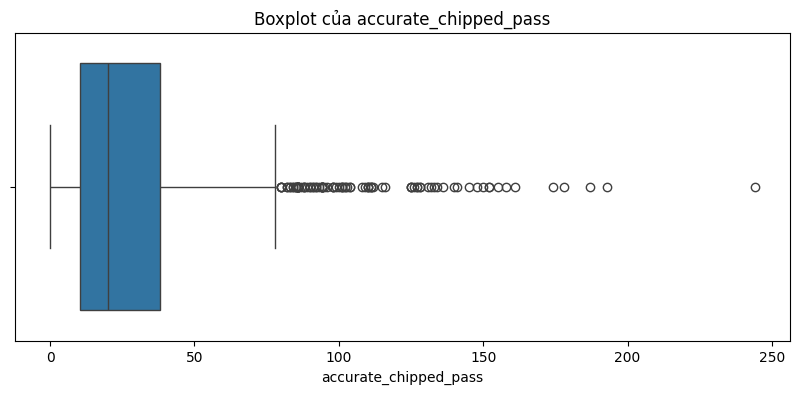


Cột: accurate_cross
Số lượng outliers (IQR): 123
Giá trị outliers (IQR):
accurate_cross
22.0    8
28.0    7
20.0    6
26.0    6
33.0    6
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
accurate_cross
33.0    6
36.0    5
37.0    5
34.0    4
41.0    4
Name: count, dtype: int64


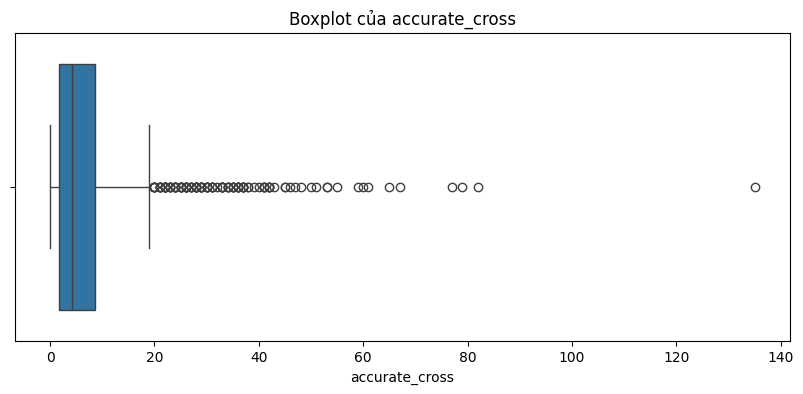


Cột: accurate_cross_nocorner
Số lượng outliers (IQR): 93
Giá trị outliers (IQR):
accurate_cross_nocorner
19.0    15
20.0    11
16.0    10
18.0     9
22.0     6
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
accurate_cross_nocorner
20.0    11
22.0     6
24.0     5
25.0     5
33.0     4
Name: count, dtype: int64


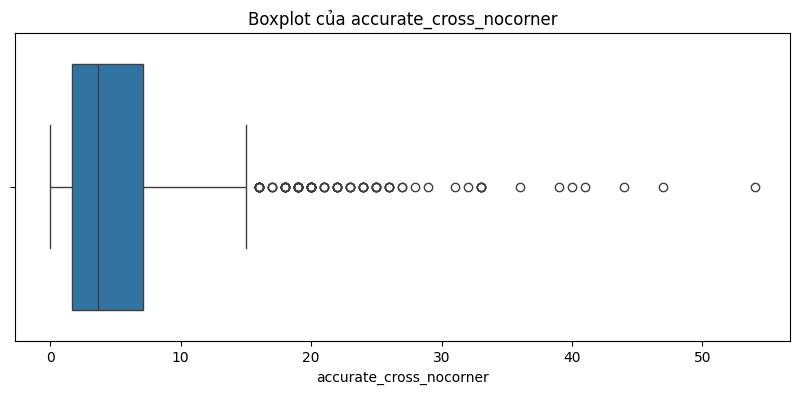


Cột: accurate_flick_on
Số lượng outliers (IQR): 218
Giá trị outliers (IQR):
accurate_flick_on
6.721519     122
7.000000      23
8.000000      21
9.000000      10
10.000000      6
Name: count, dtype: int64

Số lượng outliers (Z-score): 33
Giá trị outliers (Z-score):
accurate_flick_on
11.0    6
13.0    5
15.0    5
22.0    3
17.0    2
Name: count, dtype: int64


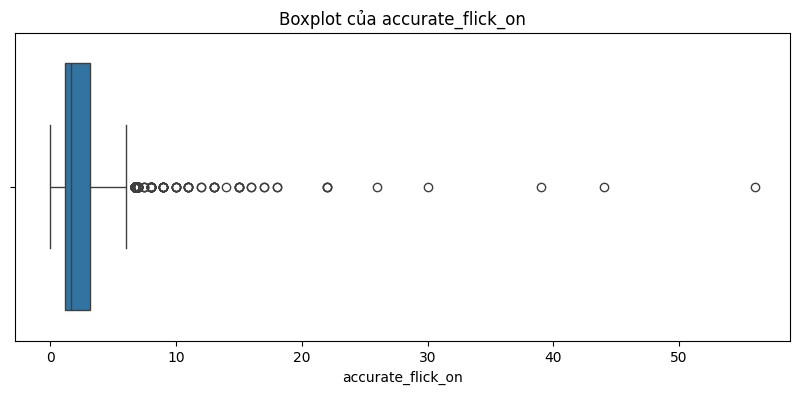


Cột: accurate_fwd_zone_pass
Số lượng outliers (IQR): 105
Giá trị outliers (IQR):
accurate_fwd_zone_pass
987.0     2
705.0     2
778.0     2
1125.0    2
670.0     2
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
accurate_fwd_zone_pass
987.0     2
1125.0    2
814.0     2
912.0     1
1572.0    1
Name: count, dtype: int64


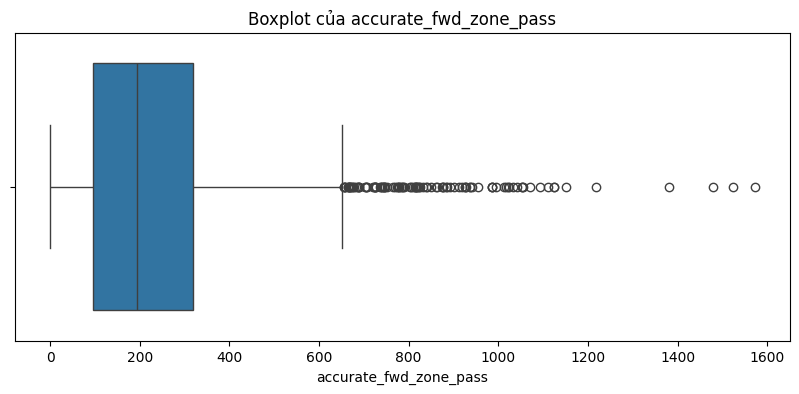


Cột: accurate_launches
Số lượng outliers (IQR): 370
Giá trị outliers (IQR):
accurate_launches
26.803738    248
13.000000     13
15.000000     12
16.000000     10
17.000000      8
Name: count, dtype: int64

Số lượng outliers (Z-score): 30
Giá trị outliers (Z-score):
accurate_launches
44.0    3
40.0    3
54.0    3
39.0    2
47.0    2
Name: count, dtype: int64


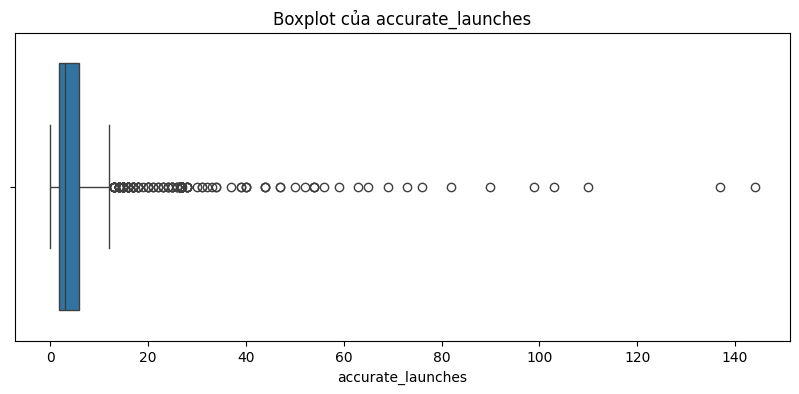


Cột: accurate_layoffs
Số lượng outliers (IQR): 81
Giá trị outliers (IQR):
accurate_layoffs
29.0    7
38.0    6
32.0    6
33.0    6
34.0    6
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
accurate_layoffs
33.0    6
38.0    6
34.0    6
41.0    4
42.0    3
Name: count, dtype: int64


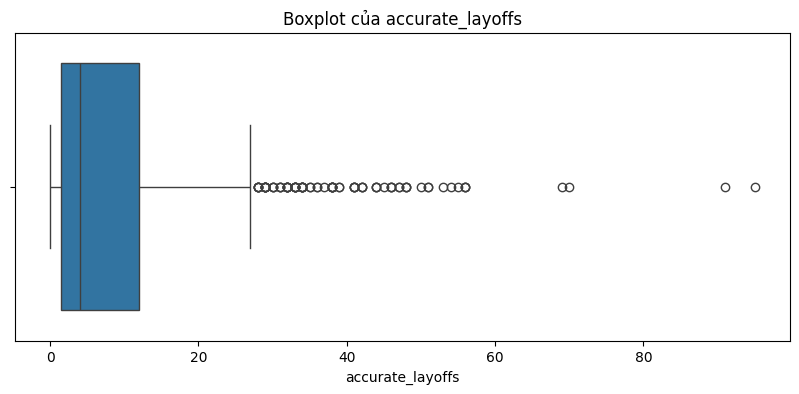


Cột: accurate_long_balls
Số lượng outliers (IQR): 360
Giá trị outliers (IQR):
accurate_long_balls
102.327434    242
99.000000       4
128.000000      4
157.000000      4
121.000000      3
Name: count, dtype: int64

Số lượng outliers (Z-score): 49
Giá trị outliers (Z-score):
accurate_long_balls
157.0    4
159.0    3
165.0    2
171.0    2
213.0    2
Name: count, dtype: int64


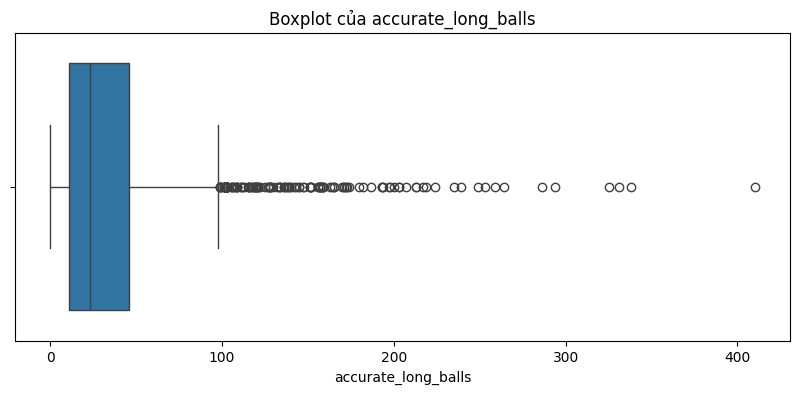


Cột: accurate_pass
Số lượng outliers (IQR): 107
Giá trị outliers (IQR):
accurate_pass
1426.0    2
1568.0    2
1607.0    2
1389.0    2
1359.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
accurate_pass
1607.0    2
2049.0    1
1692.0    1
2516.0    1
2270.0    1
Name: count, dtype: int64


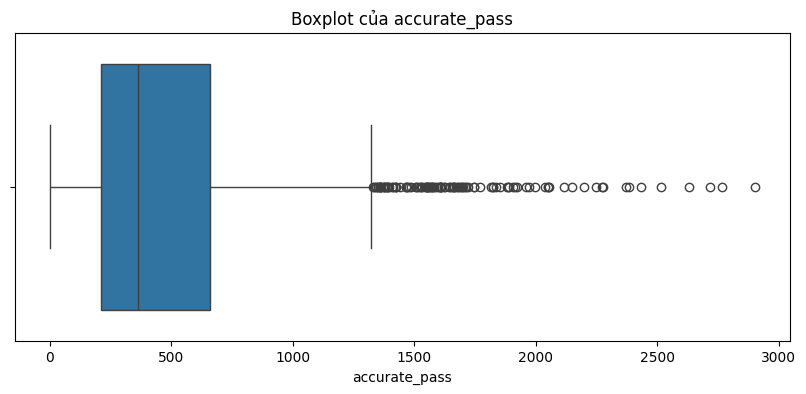


Cột: accurate_throws
Số lượng outliers (IQR): 378
Giá trị outliers (IQR):
accurate_throws
98.197531     83
111.038462    79
34.000000      6
53.000000      4
47.000000      4
Name: count, dtype: int64

Số lượng outliers (Z-score): 67
Giá trị outliers (Z-score):
accurate_throws
273.0    3
151.0    3
224.0    2
215.0    2
191.0    2
Name: count, dtype: int64


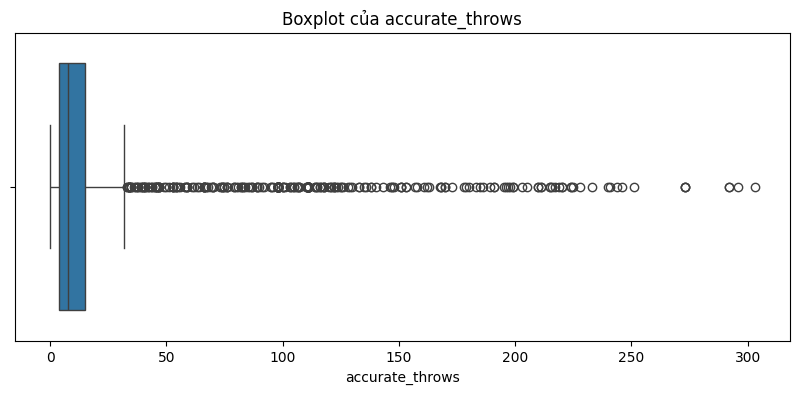


Cột: aerial_lost
Số lượng outliers (IQR): 108
Giá trị outliers (IQR):
aerial_lost
54.0    7
64.0    6
57.0    5
56.0    5
65.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
aerial_lost
72.0    4
80.0    3
96.0    3
92.0    3
77.0    2
Name: count, dtype: int64


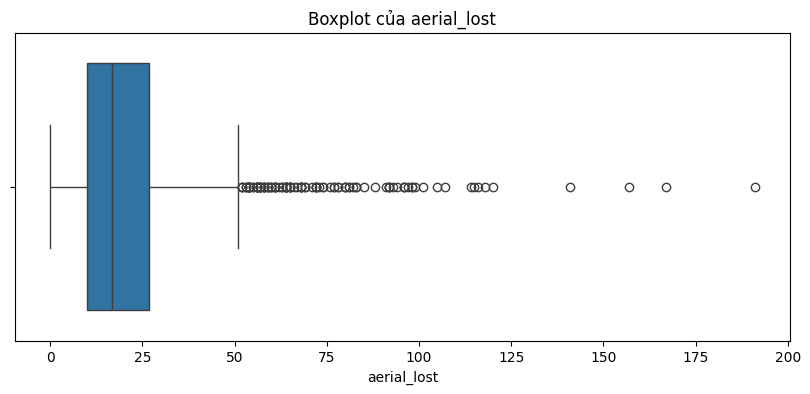


Cột: aerial_won
Số lượng outliers (IQR): 143
Giá trị outliers (IQR):
aerial_won
57.0    9
58.0    8
55.0    7
56.0    7
66.0    7
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
aerial_won
100.0    5
82.0     3
75.0     3
85.0     3
109.0    3
Name: count, dtype: int64


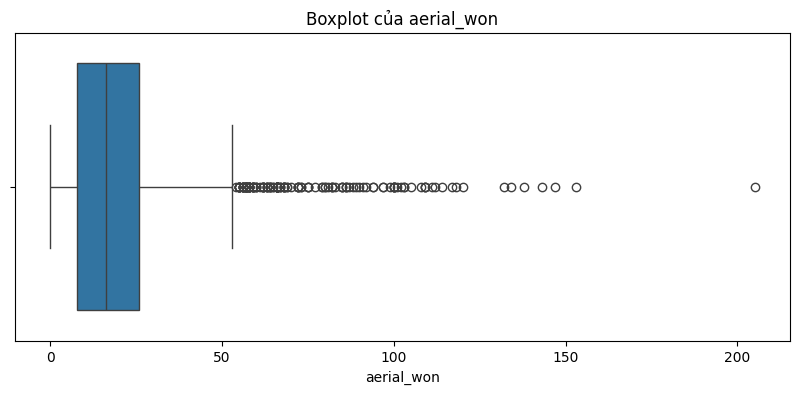


Cột: appearances
Số lượng outliers (IQR): 388
Giá trị outliers (IQR):
appearances
1.0     106
36.0     64
35.0     61
2.0      57
3.0      44
Name: count, dtype: int64

Số lượng outliers (Z-score): 0


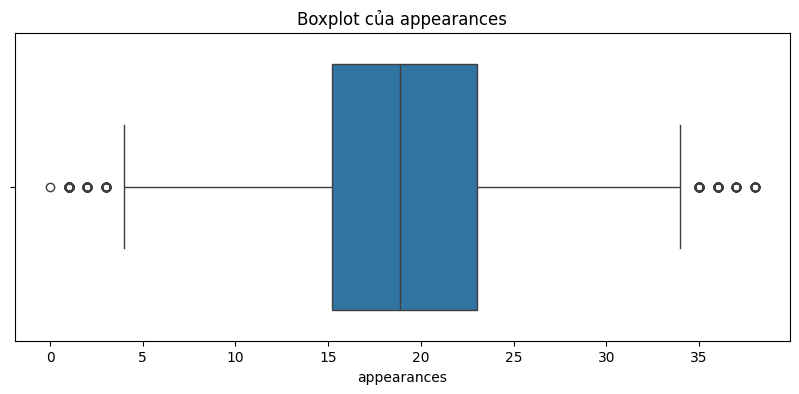


Cột: att_assist_openplay
Số lượng outliers (IQR): 154
Giá trị outliers (IQR):
att_assist_openplay
28.0    12
32.0    11
30.0    11
36.0    10
31.0     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
att_assist_openplay
38.0    7
41.0    6
39.0    6
42.0    5
45.0    3
Name: count, dtype: int64


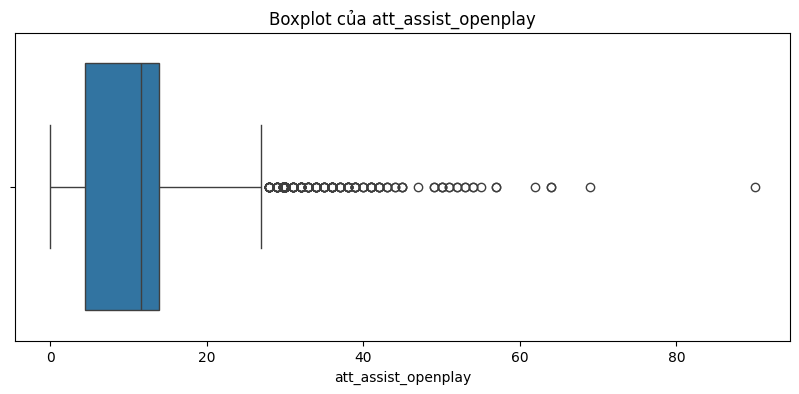


Cột: att_bx_centre
Số lượng outliers (IQR): 137
Giá trị outliers (IQR):
att_bx_centre
24.000000    11
26.000000    10
25.000000    10
26.545455    10
23.000000     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
att_bx_centre
30.0    5
32.0    5
40.0    4
33.0    4
35.0    4
Name: count, dtype: int64


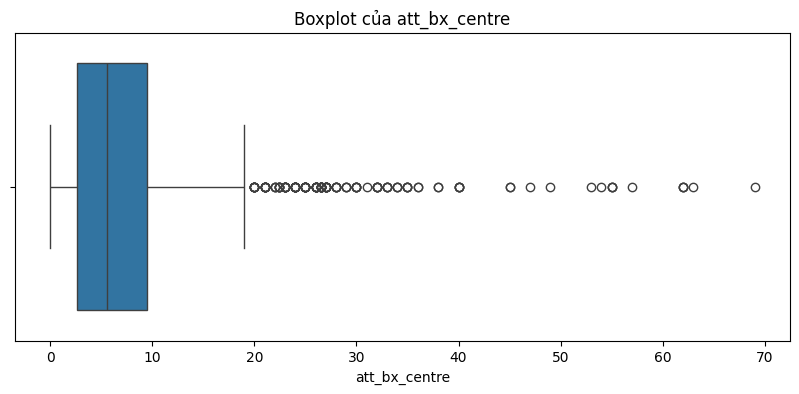


Cột: att_bx_left
Số lượng outliers (IQR): 68
Giá trị outliers (IQR):
att_bx_left
9.0     15
10.0    12
12.0     7
16.0     6
11.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 41
Giá trị outliers (Z-score):
att_bx_left
12.0    7
16.0    6
11.0    5
13.0    5
19.0    4
Name: count, dtype: int64


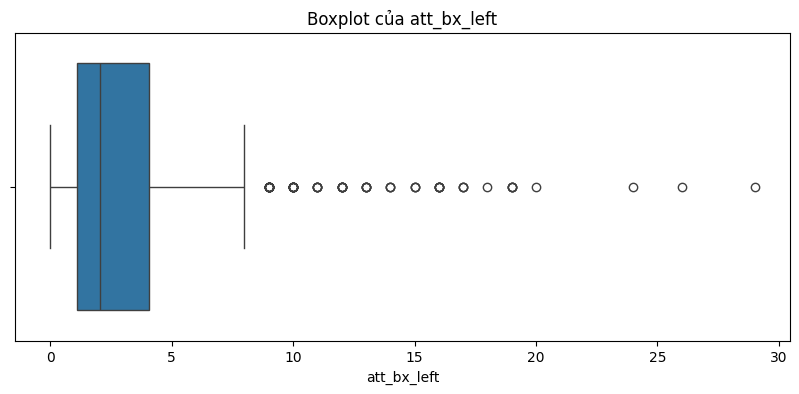


Cột: att_bx_right
Số lượng outliers (IQR): 125
Giá trị outliers (IQR):
att_bx_right
8.200000     45
8.000000     18
11.909091    10
12.000000     8
11.000000     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
att_bx_right
11.909091    10
12.000000     8
11.000000     7
14.000000     6
13.000000     3
Name: count, dtype: int64


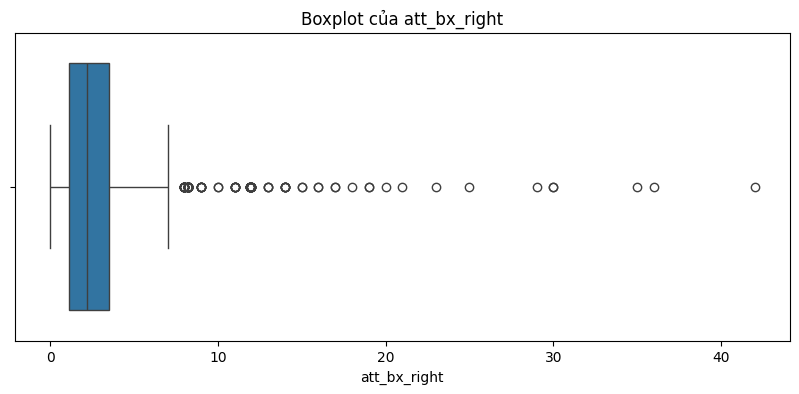


Cột: att_corner
Số lượng outliers (IQR): 130
Giá trị outliers (IQR):
att_corner
9.0     29
12.0    19
10.0    17
11.0    17
14.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 67
Giá trị outliers (Z-score):
att_corner
12.0    19
13.0    10
14.0    10
15.0     8
17.0     6
Name: count, dtype: int64


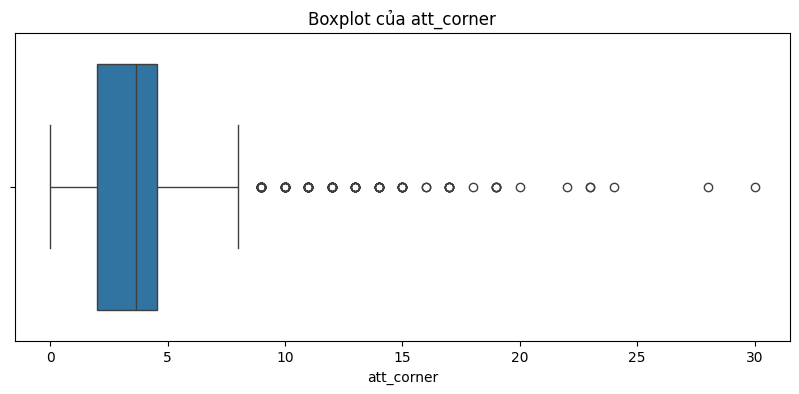


Cột: att_hd_miss
Số lượng outliers (IQR): 72
Giá trị outliers (IQR):
att_hd_miss
8.0     21
10.0    12
9.0     11
11.0     8
12.0     8
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
att_hd_miss
10.0    12
9.0     11
11.0     8
12.0     8
13.0     3
Name: count, dtype: int64


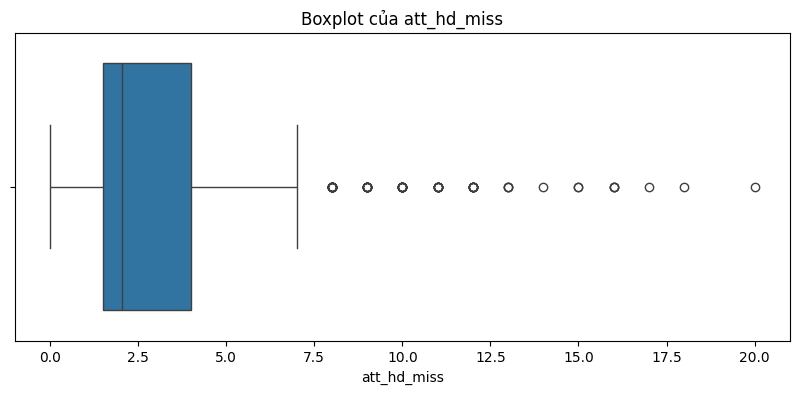


Cột: att_hd_total
Số lượng outliers (IQR): 135
Giá trị outliers (IQR):
att_hd_total
11.0    19
14.0    15
12.0    11
13.0    11
16.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 58
Giá trị outliers (Z-score):
att_hd_total
16.0    10
19.0    10
17.0     8
18.0     7
20.0     6
Name: count, dtype: int64


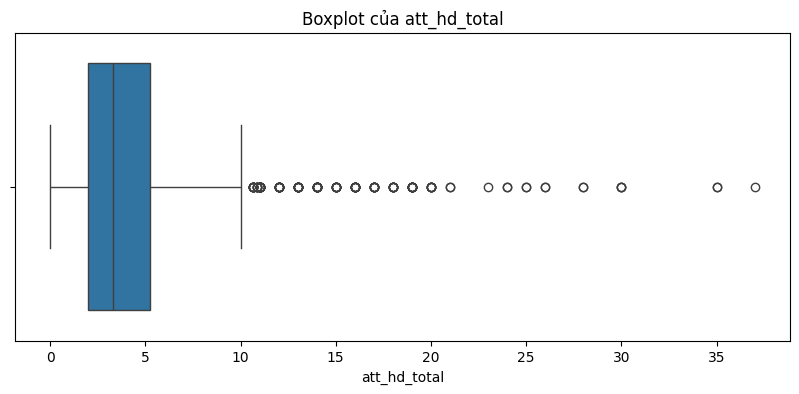


Cột: att_ibox_blocked
Số lượng outliers (IQR): 122
Giá trị outliers (IQR):
att_ibox_blocked
10.000000    19
11.000000    15
12.000000    13
11.727273    10
15.000000    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
att_ibox_blocked
15.0    10
14.0     9
18.0     7
16.0     6
20.0     5
Name: count, dtype: int64


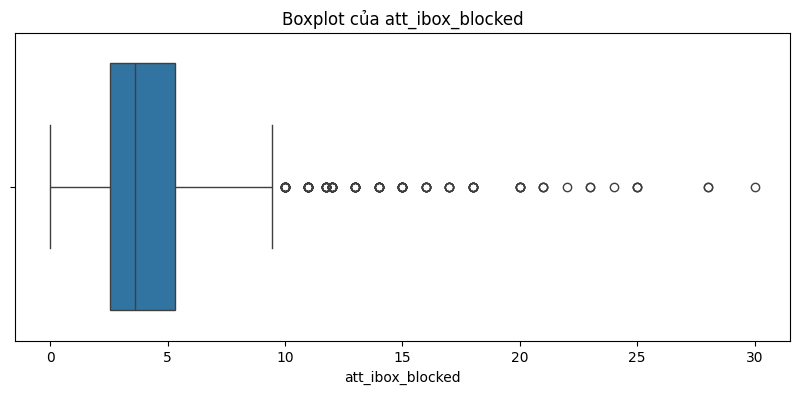


Cột: att_ibox_goal
Số lượng outliers (IQR): 273
Giá trị outliers (IQR):
att_ibox_goal
5.833333     123
6.000000      25
7.000000      25
8.000000      19
11.000000     12
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
att_ibox_goal
13.444444    12
11.000000    12
10.000000     9
15.000000     7
12.000000     4
Name: count, dtype: int64


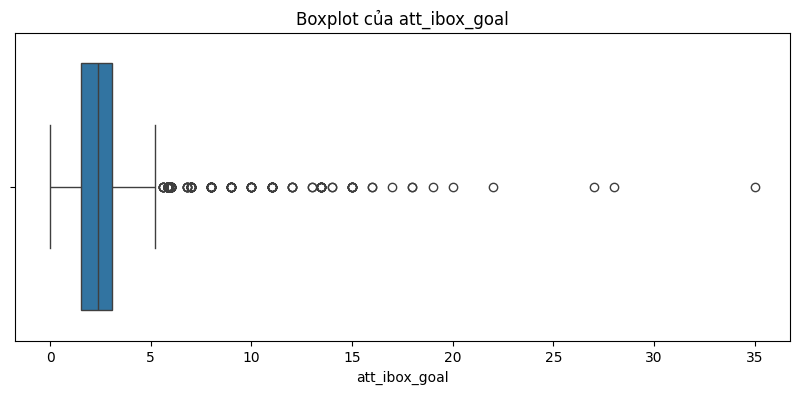


Cột: att_ibox_miss
Số lượng outliers (IQR): 139
Giá trị outliers (IQR):
att_ibox_miss
13.000000    21
12.000000    19
14.000000    14
19.000000    11
13.454545    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
att_ibox_miss
19.0    11
17.0     8
18.0     6
22.0     4
21.0     4
Name: count, dtype: int64


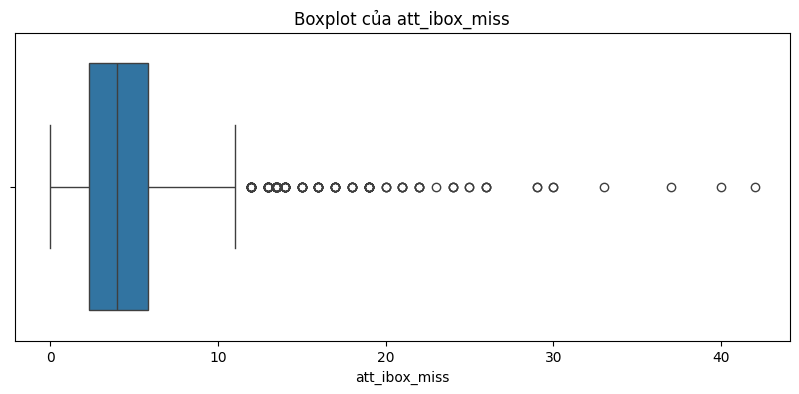


Cột: att_ibox_target
Số lượng outliers (IQR): 134
Giá trị outliers (IQR):
att_ibox_target
11.0    17
10.0    15
13.0    14
12.0    13
14.0    12
Name: count, dtype: int64

Số lượng outliers (Z-score): 69
Giá trị outliers (Z-score):
att_ibox_target
14.000000    12
17.000000    10
14.545455    10
16.000000     9
21.000000     5
Name: count, dtype: int64


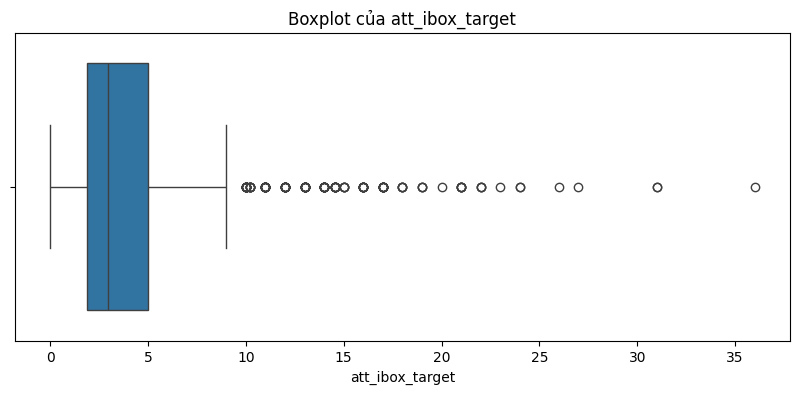


Cột: att_lf_target
Số lượng outliers (IQR): 203
Giá trị outliers (IQR):
att_lf_target
6.777778    47
6.571429    27
6.000000    24
8.000000    16
7.000000    14
Name: count, dtype: int64

Số lượng outliers (Z-score): 50
Giá trị outliers (Z-score):
att_lf_target
13.666667    12
11.000000     8
10.000000     7
14.000000     5
17.000000     3
Name: count, dtype: int64


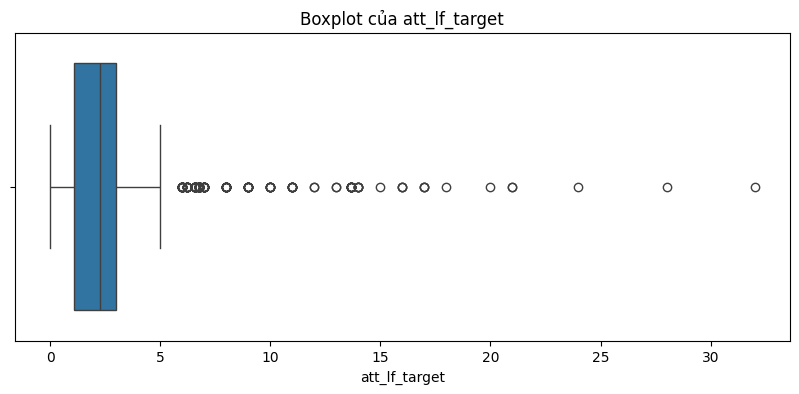


Cột: att_lf_total
Số lượng outliers (IQR): 191
Giá trị outliers (IQR):
att_lf_total
24.700000    45
19.000000    12
17.888889    10
21.000000    10
38.333333     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
att_lf_total
38.333333    9
47.000000    4
35.000000    4
37.000000    3
61.000000    3
Name: count, dtype: int64


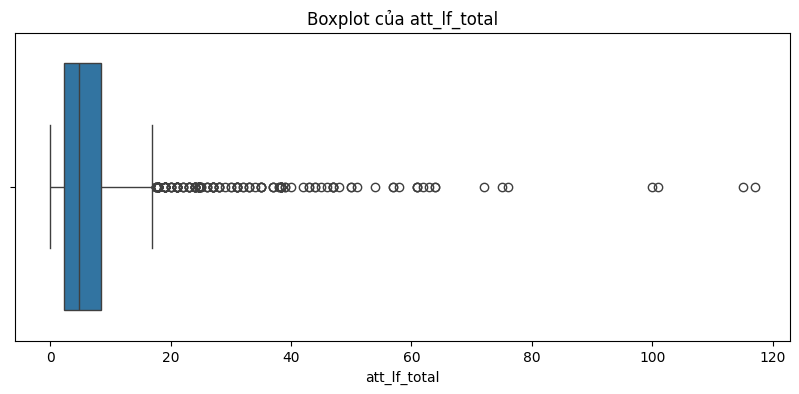


Cột: att_miss_high
Số lượng outliers (IQR): 186
Giá trị outliers (IQR):
att_miss_high
0.0    56
5.0    54
6.0    33
8.0    13
7.0    12
Name: count, dtype: int64

Số lượng outliers (Z-score): 43
Giá trị outliers (Z-score):
att_miss_high
8.0     13
7.0     12
9.0      8
11.0     4
10.0     2
Name: count, dtype: int64


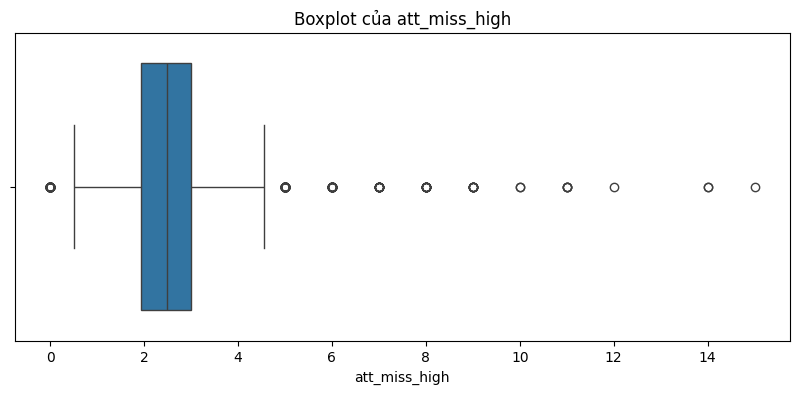


Cột: att_miss_left
Số lượng outliers (IQR): 152
Giá trị outliers (IQR):
att_miss_left
6.000000    46
7.000000    29
8.000000    24
6.555556    12
9.000000    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
att_miss_left
8.0     24
9.0     11
10.0     6
12.0     5
11.0     5
Name: count, dtype: int64


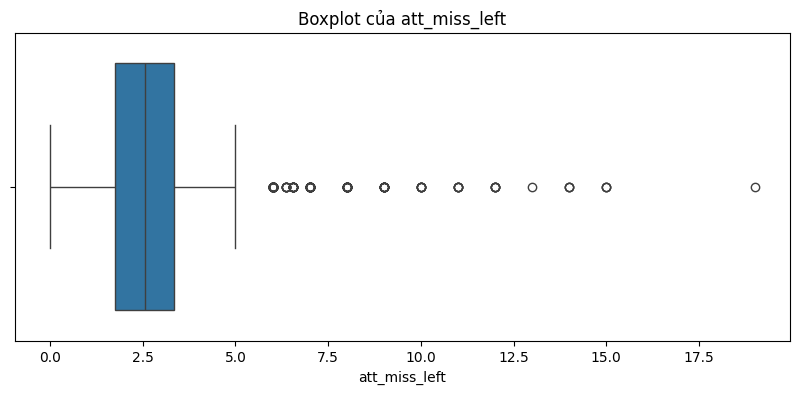


Cột: att_miss_right
Số lượng outliers (IQR): 131
Giá trị outliers (IQR):
att_miss_right
6.000000    41
7.000000    26
8.000000    15
9.000000    15
6.333333    12
Name: count, dtype: int64

Số lượng outliers (Z-score): 52
Giá trị outliers (Z-score):
att_miss_right
9.0     15
8.0     15
11.0    10
10.0     5
14.0     3
Name: count, dtype: int64


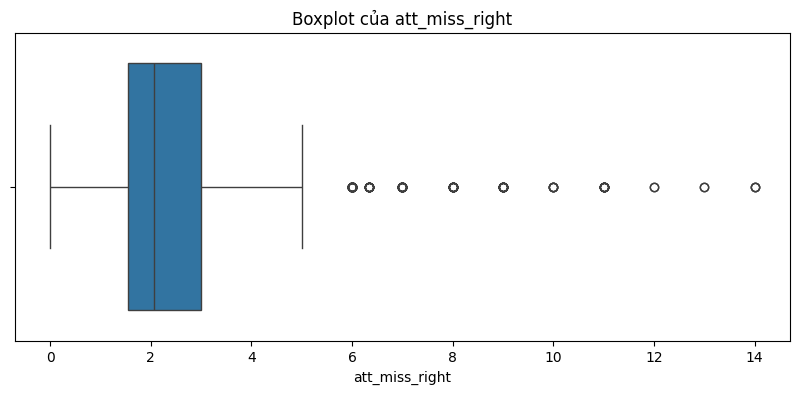


Cột: att_obox_blocked
Số lượng outliers (IQR): 135
Giá trị outliers (IQR):
att_obox_blocked
7.0     31
8.0     28
10.0    18
12.0    12
9.0     12
Name: count, dtype: int64

Số lượng outliers (Z-score): 64
Giá trị outliers (Z-score):
att_obox_blocked
10.0    18
12.0    12
11.0    11
13.0     6
15.0     4
Name: count, dtype: int64


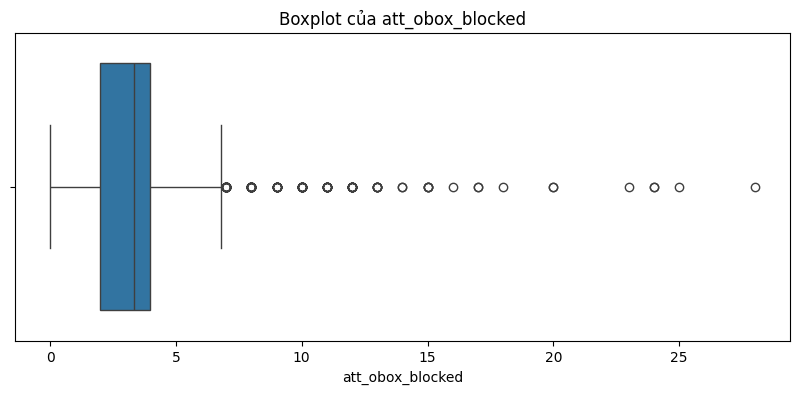


Cột: att_obox_miss
Số lượng outliers (IQR): 87
Giá trị outliers (IQR):
att_obox_miss
10.0    20
9.0     16
12.0    14
11.0     9
15.0     6
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
att_obox_miss
12.0    14
11.0     9
15.0     6
13.0     6
14.0     4
Name: count, dtype: int64


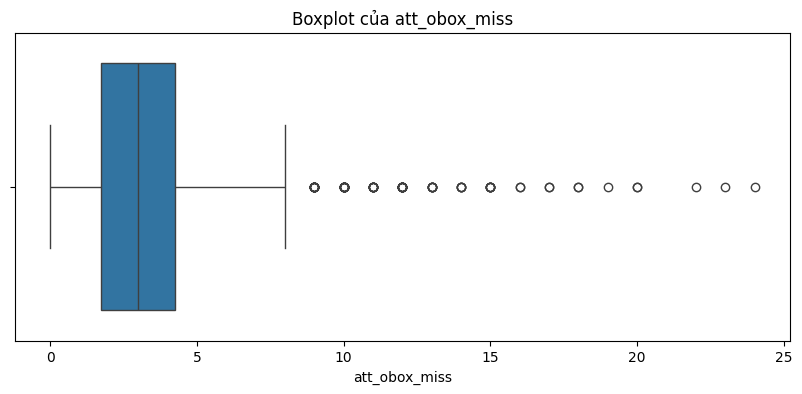


Cột: att_obox_target
Số lượng outliers (IQR): 120
Giá trị outliers (IQR):
att_obox_target
6.000000     34
5.117647     31
7.000000     13
10.000000    10
9.000000      9
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
att_obox_target
7.0     13
10.0    10
9.0      9
8.0      7
12.0     4
Name: count, dtype: int64


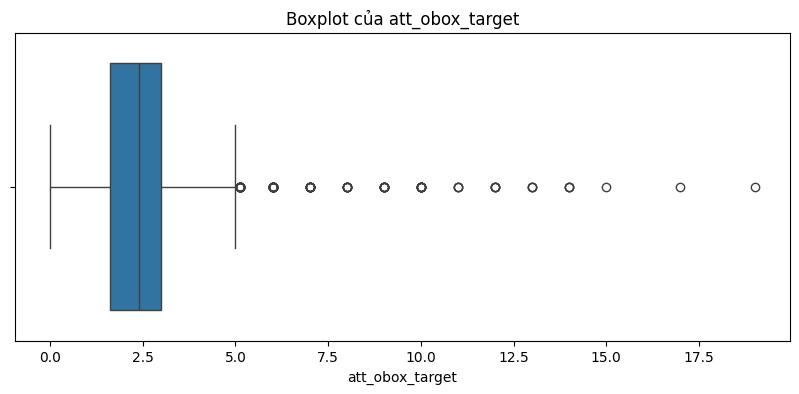


Cột: att_obx_centre
Số lượng outliers (IQR): 99
Giá trị outliers (IQR):
att_obx_centre
22.0    9
23.0    9
21.0    8
29.0    8
20.0    8
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
att_obx_centre
29.0    8
26.0    6
31.0    4
27.0    4
30.0    4
Name: count, dtype: int64


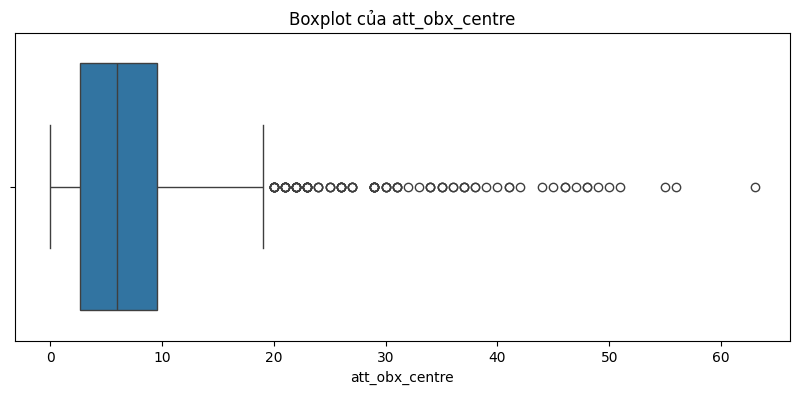


Cột: att_openplay
Số lượng outliers (IQR): 91
Giá trị outliers (IQR):
att_openplay
51.583333    9
62.000000    5
55.000000    5
56.000000    5
49.000000    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 62
Giá trị outliers (Z-score):
att_openplay
62.0    5
56.0    5
57.0    4
59.0    3
63.0    3
Name: count, dtype: int64


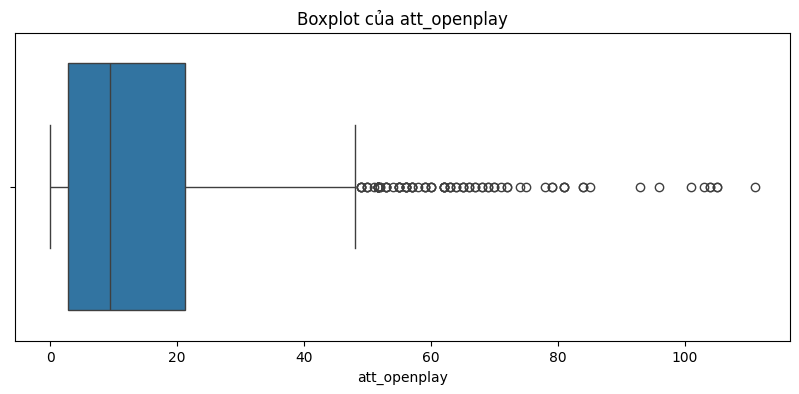


Cột: att_rf_target
Số lượng outliers (IQR): 76
Giá trị outliers (IQR):
att_rf_target
10.0    19
12.0    12
11.0    10
13.0     8
19.0     4
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
att_rf_target
12.0    12
11.0    10
13.0     8
19.0     4
18.0     4
Name: count, dtype: int64


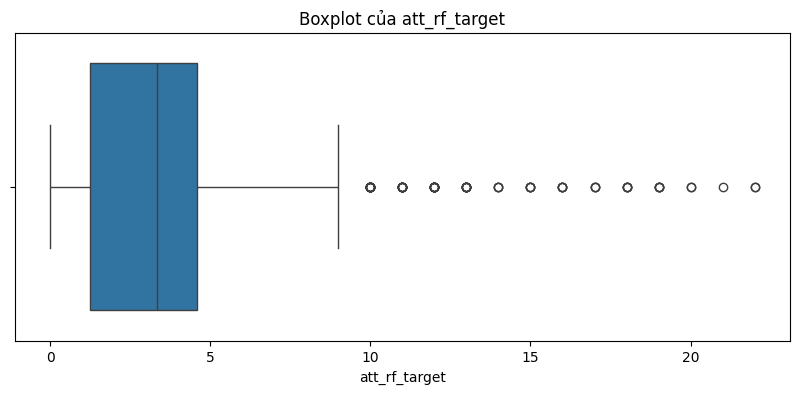


Cột: att_rf_total
Số lượng outliers (IQR): 101
Giá trị outliers (IQR):
att_rf_total
34.0    12
47.0    10
33.0     9
35.0     5
51.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 65
Giá trị outliers (Z-score):
att_rf_total
47.0    10
51.0     5
48.0     4
40.0     4
50.0     3
Name: count, dtype: int64


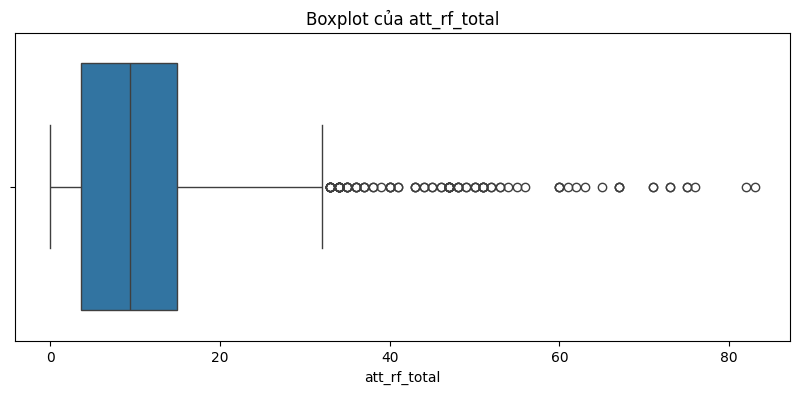


Cột: att_setpiece
Số lượng outliers (IQR): 75
Giá trị outliers (IQR):
att_setpiece
5.0     33
6.0     17
7.0     17
8.0      4
12.0     1
Name: count, dtype: int64

Số lượng outliers (Z-score): 42
Giá trị outliers (Z-score):
att_setpiece
6.0     17
7.0     17
8.0      4
12.0     1
13.0     1
Name: count, dtype: int64


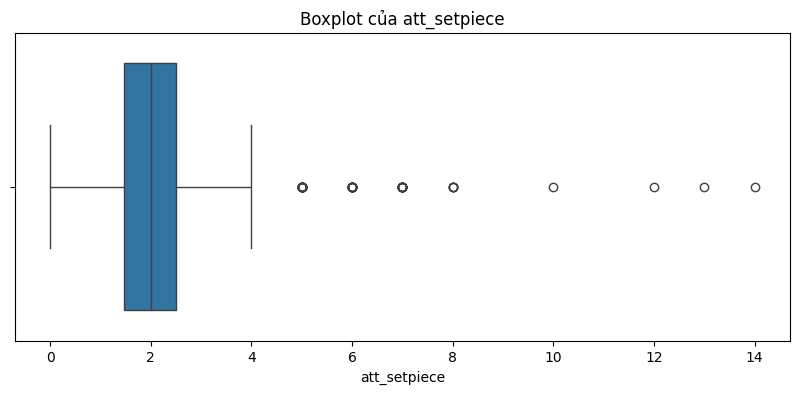


Cột: att_sv_low_centre
Số lượng outliers (IQR): 131
Giá trị outliers (IQR):
att_sv_low_centre
6.0     32
7.0     21
8.0     21
8.4     11
11.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 71
Giá trị outliers (Z-score):
att_sv_low_centre
8.0     21
8.4     11
11.0    10
9.0     10
13.0     6
Name: count, dtype: int64


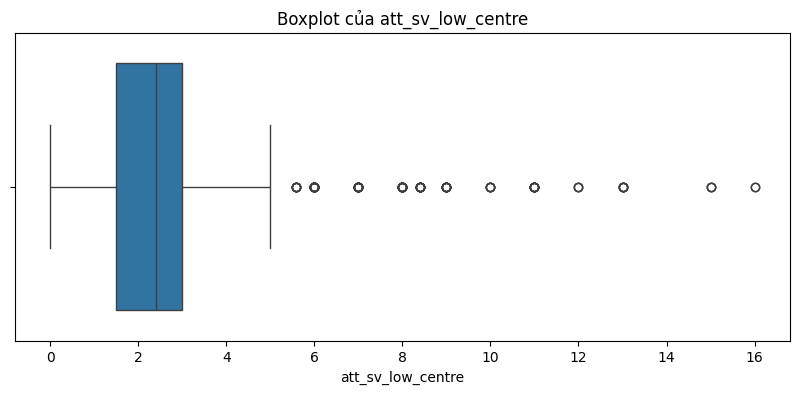


Cột: att_sv_low_left
Số lượng outliers (IQR): 147
Giá trị outliers (IQR):
att_sv_low_left
0.0    39
4.0    39
5.0    30
6.0    17
7.0    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 69
Giá trị outliers (Z-score):
att_sv_low_left
5.0    30
6.0    17
7.0    11
8.0     5
9.0     3
Name: count, dtype: int64


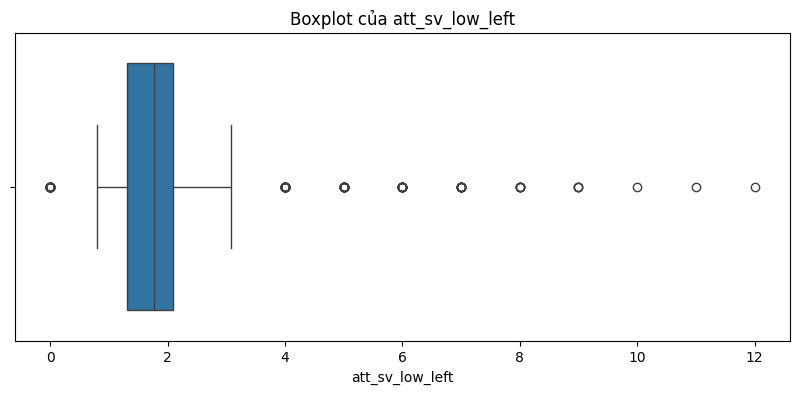


Cột: attempted_tackle_foul
Số lượng outliers (IQR): 112
Giá trị outliers (IQR):
attempted_tackle_foul
23.0    17
24.0    16
26.0    11
25.0    11
27.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 41
Giá trị outliers (Z-score):
attempted_tackle_foul
29.0    8
32.0    6
31.0    4
33.0    4
37.0    3
Name: count, dtype: int64


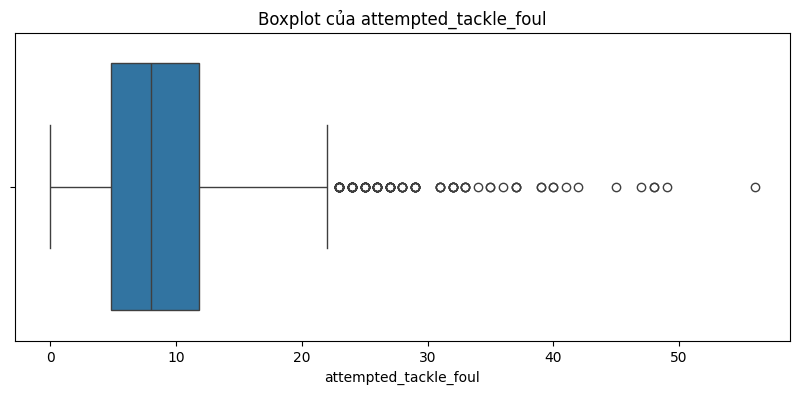


Cột: attempts_conceded_ibox
Số lượng outliers (IQR): 171
Giá trị outliers (IQR):
attempts_conceded_ibox
288.0    6
282.0    6
283.0    6
268.0    4
327.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 27
Giá trị outliers (Z-score):
attempts_conceded_ibox
342.0    3
382.0    2
360.0    2
341.0    2
389.0    1
Name: count, dtype: int64


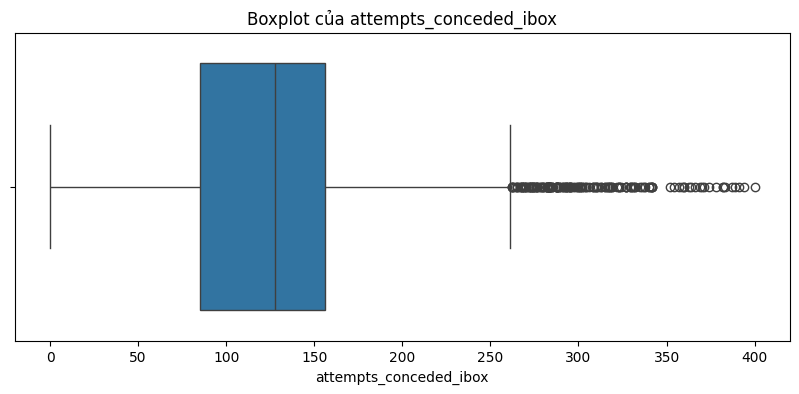


Cột: attempts_conceded_obox
Số lượng outliers (IQR): 307
Giá trị outliers (IQR):
attempts_conceded_obox
2.0      42
1.0      42
127.0    10
132.0     8
126.0     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 45
Giá trị outliers (Z-score):
attempts_conceded_obox
179.0    4
183.0    3
186.0    3
187.0    3
177.0    2
Name: count, dtype: int64


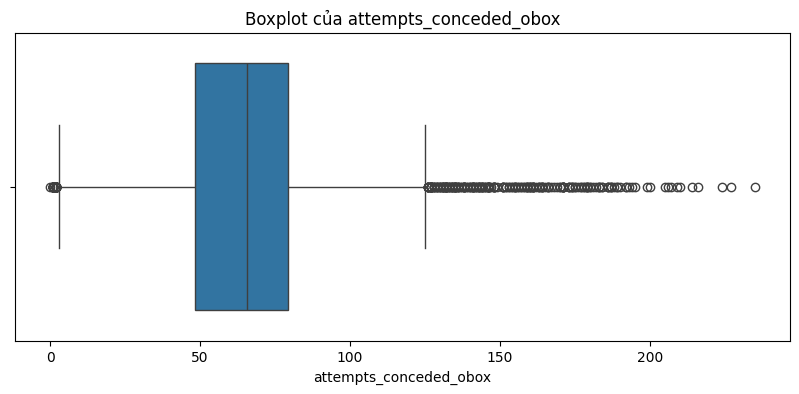


Cột: attempts_ibox
Số lượng outliers (IQR): 122
Giá trị outliers (IQR):
attempts_ibox
39.000000    9
47.833333    9
38.000000    8
40.000000    7
44.000000    7
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
attempts_ibox
79.0    4
52.0    4
55.0    4
50.0    4
62.0    3
Name: count, dtype: int64


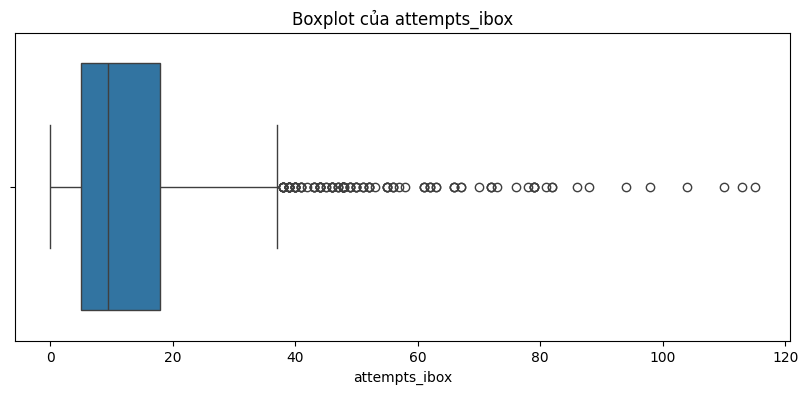


Cột: attempts_obox
Số lượng outliers (IQR): 97
Giá trị outliers (IQR):
attempts_obox
21.0    9
23.0    9
24.0    7
22.0    7
29.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
attempts_obox
29.0    5
27.0    5
30.0    5
32.0    4
34.0    3
Name: count, dtype: int64


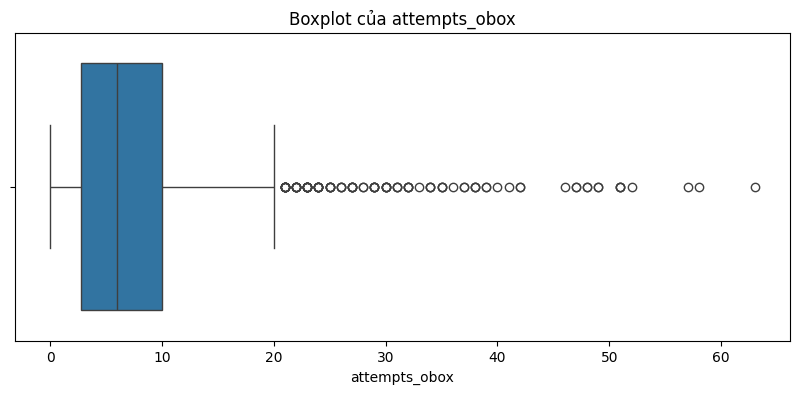


Cột: backward_pass
Số lượng outliers (IQR): 84
Giá trị outliers (IQR):
backward_pass
279.0    5
280.0    3
305.0    3
295.0    3
288.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 44
Giá trị outliers (Z-score):
backward_pass
335.0    2
341.0    2
315.0    2
340.0    2
368.0    2
Name: count, dtype: int64


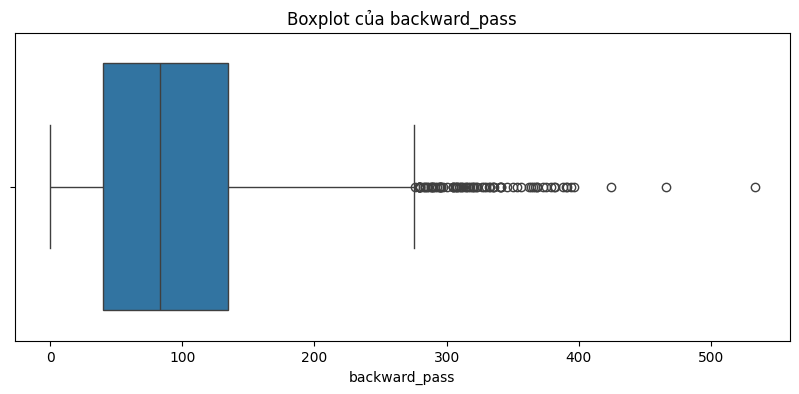


Cột: ball_recovery
Số lượng outliers (IQR): 108
Giá trị outliers (IQR):
ball_recovery
259.0    4
199.0    4
197.0    4
326.0    3
219.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
ball_recovery
259.0    4
326.0    3
291.0    2
301.0    2
255.0    2
Name: count, dtype: int64


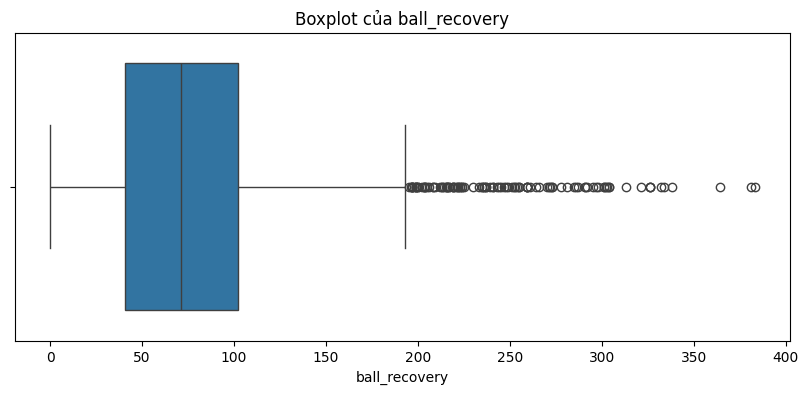


Cột: big_chance_created
Số lượng outliers (IQR): 152
Giá trị outliers (IQR):
big_chance_created
7.588235     31
8.000000     30
9.000000     18
11.000000    15
10.000000    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 52
Giá trị outliers (Z-score):
big_chance_created
11.0    15
16.0     7
12.0     6
15.0     4
14.0     4
Name: count, dtype: int64


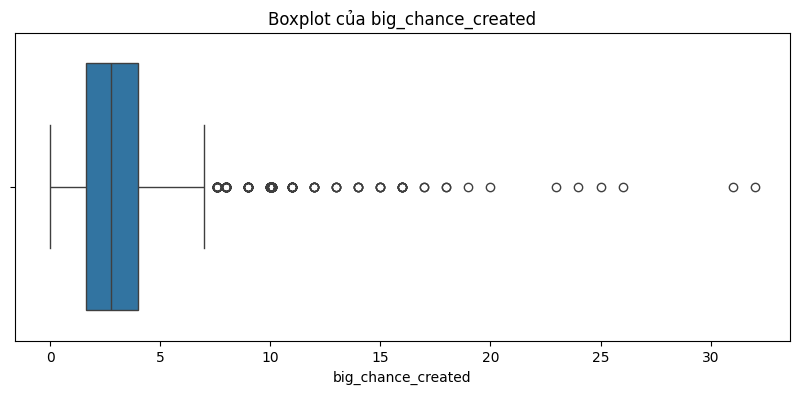


Cột: big_chance_missed
Số lượng outliers (IQR): 353
Giá trị outliers (IQR):
big_chance_missed
6.584416    124
5.000000     49
6.000000     35
5.333333     19
9.000000     19
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
big_chance_missed
13.0    10
12.0    10
10.0     9
14.0     6
11.0     4
Name: count, dtype: int64


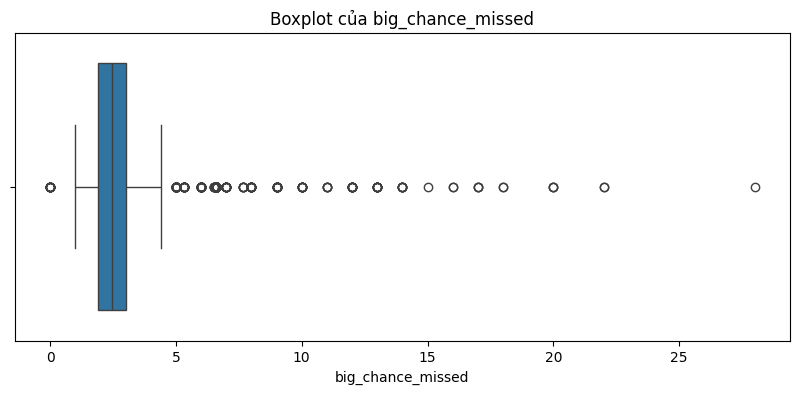


Cột: blocked_cross
Số lượng outliers (IQR): 390
Giá trị outliers (IQR):
blocked_cross
6.769231    92
6.391892    90
5.000000    49
6.000000    41
7.000000    26
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
blocked_cross
10.0    10
11.0     8
14.0     6
12.0     6
13.0     5
Name: count, dtype: int64


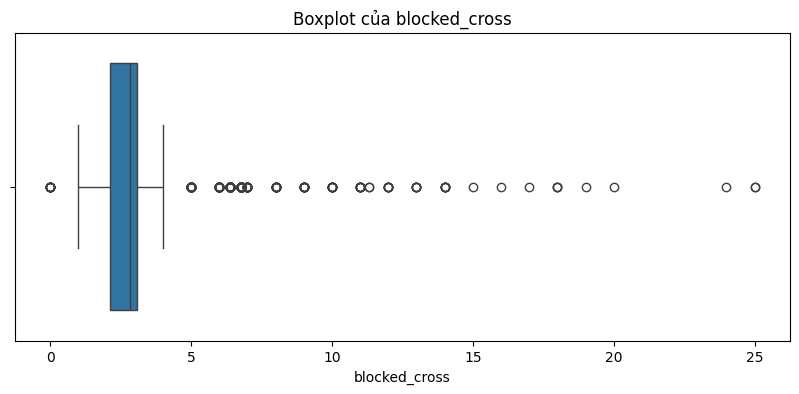


Cột: blocked_pass
Số lượng outliers (IQR): 117
Giá trị outliers (IQR):
blocked_pass
47.0    9
45.0    9
61.0    8
50.0    7
57.0    6
Name: count, dtype: int64

Số lượng outliers (Z-score): 62
Giá trị outliers (Z-score):
blocked_pass
61.0    8
57.0    6
60.0    5
70.0    5
55.0    5
Name: count, dtype: int64


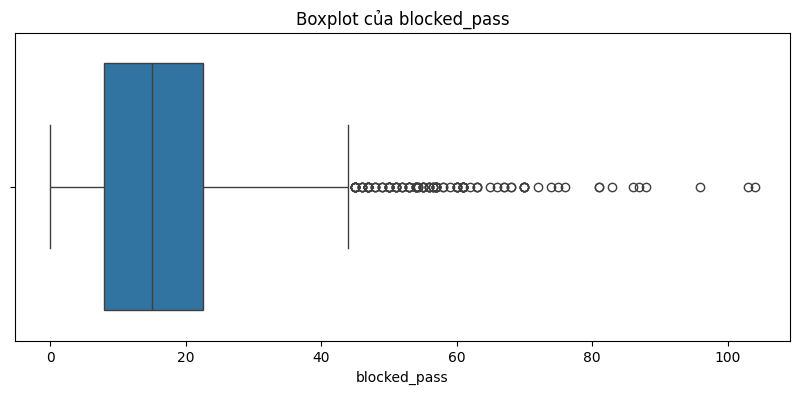


Cột: blocked_scoring_att
Số lượng outliers (IQR): 144
Giá trị outliers (IQR):
blocked_scoring_att
15.0    30
18.0    13
21.0    12
20.0    12
16.0    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
blocked_scoring_att
21.0    12
22.0     5
24.0     5
23.0     5
25.0     5
Name: count, dtype: int64


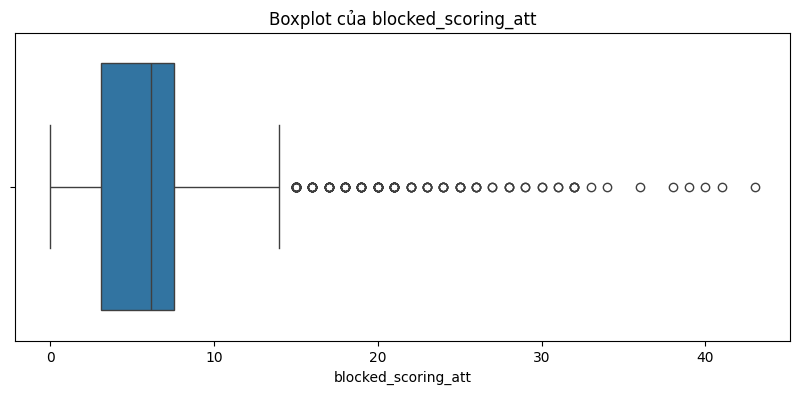


Cột: challenge_lost
Số lượng outliers (IQR): 105
Giá trị outliers (IQR):
challenge_lost
33.0    10
34.0     8
37.0     7
38.0     6
39.0     6
Name: count, dtype: int64

Số lượng outliers (Z-score): 54
Giá trị outliers (Z-score):
challenge_lost
46.0    5
45.0    5
41.0    5
49.0    4
42.0    4
Name: count, dtype: int64


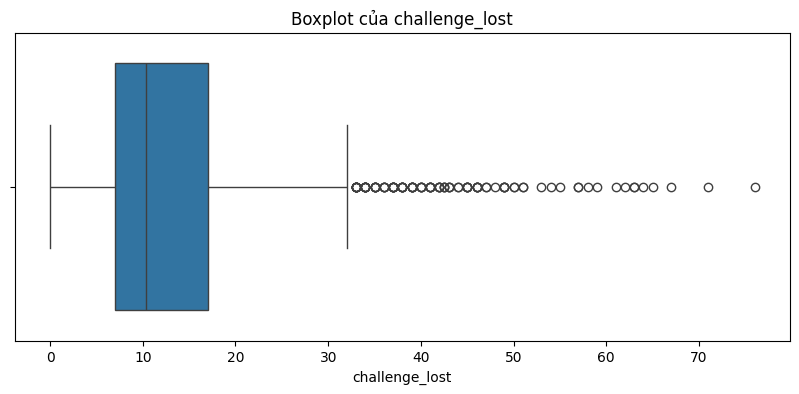


Cột: clean_sheet
Số lượng outliers (IQR): 69
Giá trị outliers (IQR):
clean_sheet
11.0    27
13.0    10
12.0    10
14.0     9
16.0     4
Name: count, dtype: int64

Số lượng outliers (Z-score): 69
Giá trị outliers (Z-score):
clean_sheet
11.0    27
13.0    10
12.0    10
14.0     9
16.0     4
Name: count, dtype: int64


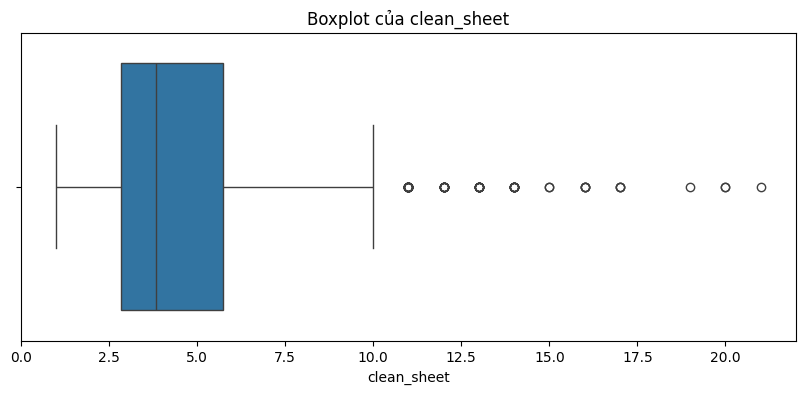


Cột: crosses_18yard
Số lượng outliers (IQR): 128
Giá trị outliers (IQR):
crosses_18yard
42.0    8
43.0    8
39.0    6
49.0    6
38.0    6
Name: count, dtype: int64

Số lượng outliers (Z-score): 60
Giá trị outliers (Z-score):
crosses_18yard
51.0    4
52.0    4
56.0    4
60.0    3
55.0    3
Name: count, dtype: int64


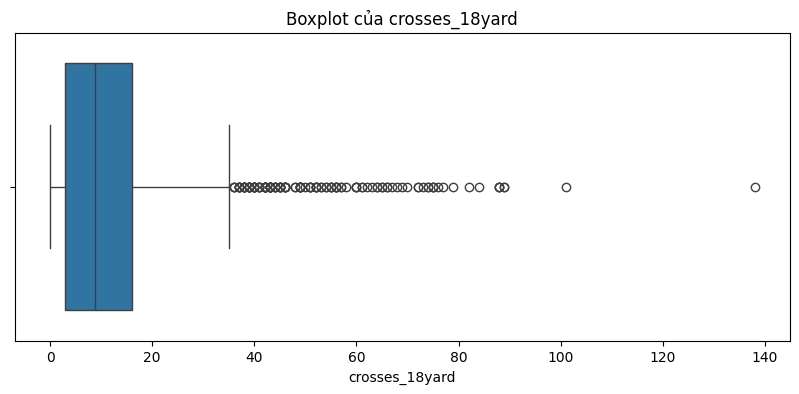


Cột: crosses_18yardplus
Số lượng outliers (IQR): 127
Giá trị outliers (IQR):
crosses_18yardplus
22.0    11
25.0    10
21.0     8
24.0     8
23.0     8
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
crosses_18yardplus
29.0    6
32.0    5
39.0    5
35.0    4
38.0    4
Name: count, dtype: int64


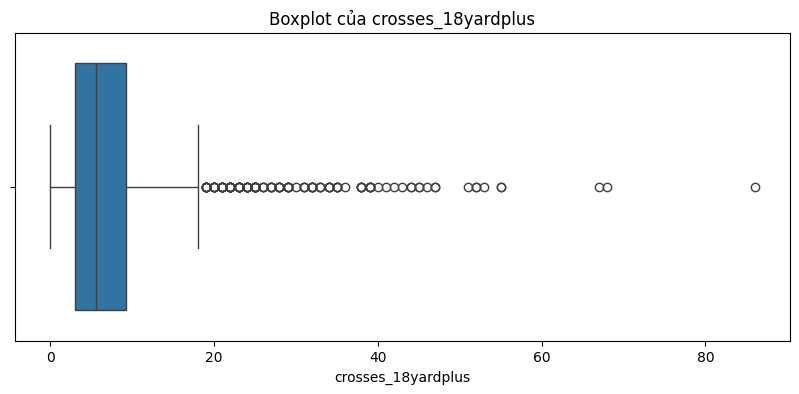


Cột: dispossessed
Số lượng outliers (IQR): 108
Giá trị outliers (IQR):
dispossessed
43.166667    9
42.000000    8
44.000000    7
51.000000    6
58.000000    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 58
Giá trị outliers (Z-score):
dispossessed
51.0    6
58.0    5
59.0    4
54.0    4
53.0    4
Name: count, dtype: int64


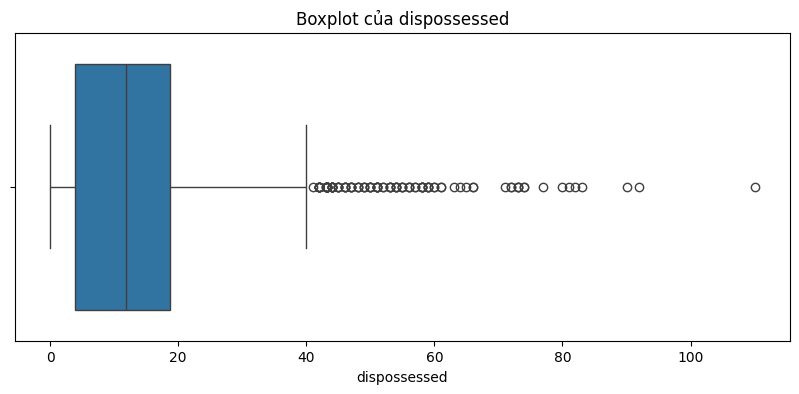


Cột: draws
Số lượng outliers (IQR): 381
Giá trị outliers (IQR):
draws
1.0     167
9.0      66
10.0     44
12.0     30
11.0     28
Name: count, dtype: int64

Số lượng outliers (Z-score): 76
Giá trị outliers (Z-score):
draws
12.0    30
13.0    19
14.0    19
15.0     8
Name: count, dtype: int64


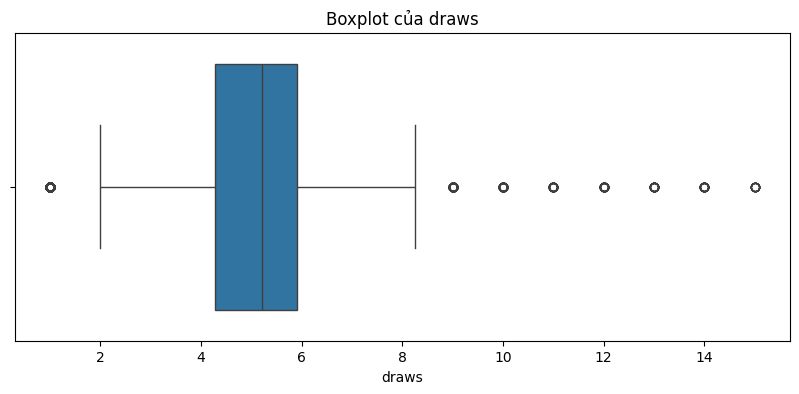


Cột: duel_lost
Số lượng outliers (IQR): 95
Giá trị outliers (IQR):
duel_lost
201.0    4
187.0    4
176.0    3
206.0    3
205.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 46
Giá trị outliers (Z-score):
duel_lost
224.0    2
239.0    2
213.0    2
241.0    2
258.0    2
Name: count, dtype: int64


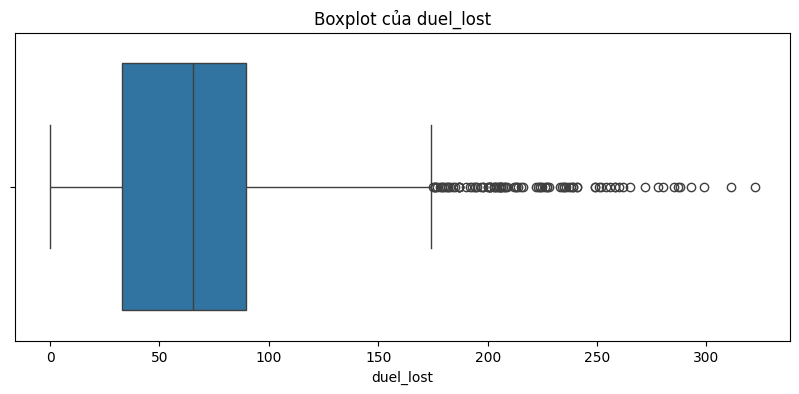


Cột: duel_won
Số lượng outliers (IQR): 125
Giá trị outliers (IQR):
duel_won
165.0    6
167.0    5
182.0    4
169.0    4
199.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 35
Giá trị outliers (Z-score):
duel_won
204.0    3
222.0    2
241.0    2
208.0    2
219.0    2
Name: count, dtype: int64


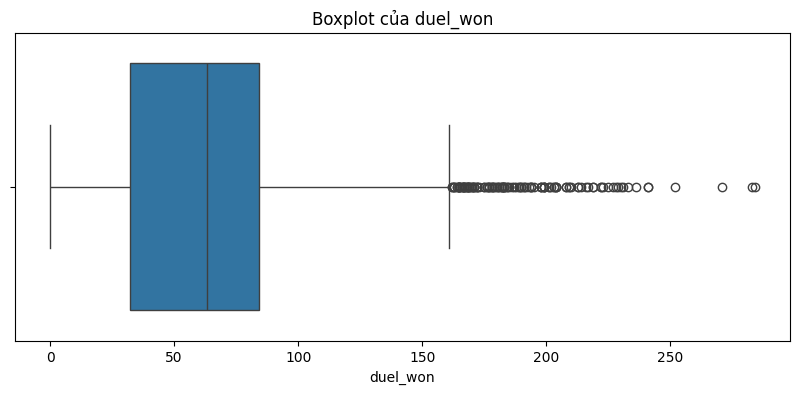


Cột: effective_blocked_cross
Số lượng outliers (IQR): 390
Giá trị outliers (IQR):
effective_blocked_cross
6.769231    92
6.391892    90
5.000000    49
6.000000    41
7.000000    26
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
effective_blocked_cross
10.0    10
11.0     8
14.0     6
12.0     6
13.0     5
Name: count, dtype: int64


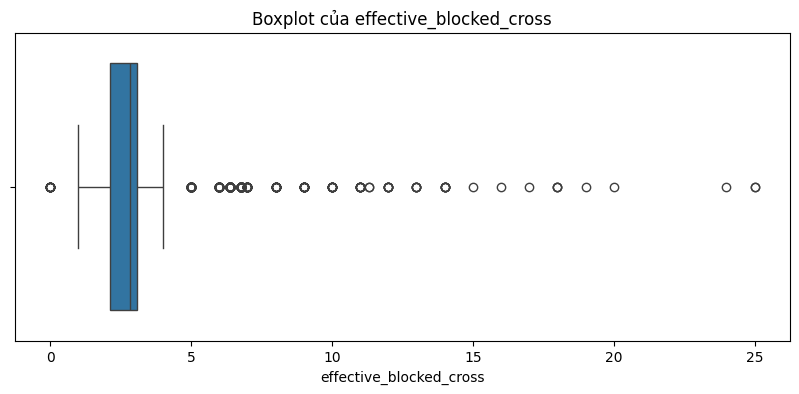


Cột: effective_clearance
Số lượng outliers (IQR): 321
Giá trị outliers (IQR):
effective_clearance
74.095745     161
78.000000       6
82.000000       6
122.416667      5
81.000000       5
Name: count, dtype: int64

Số lượng outliers (Z-score): 64
Giá trị outliers (Z-score):
effective_clearance
122.416667    5
120.000000    4
187.000000    3
139.000000    3
138.000000    2
Name: count, dtype: int64


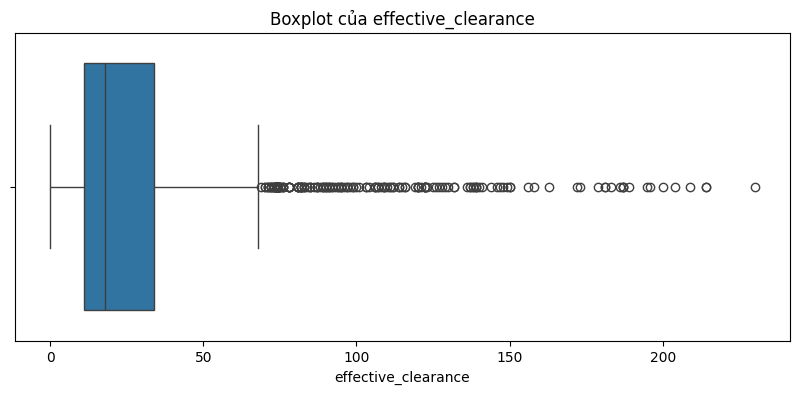


Cột: effective_head_clearance
Số lượng outliers (IQR): 318
Giá trị outliers (IQR):
effective_head_clearance
40.706522    165
46.000000      8
44.000000      8
54.000000      7
42.000000      7
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
effective_head_clearance
68.75    5
71.00    4
64.00    4
63.00    4
69.00    3
Name: count, dtype: int64


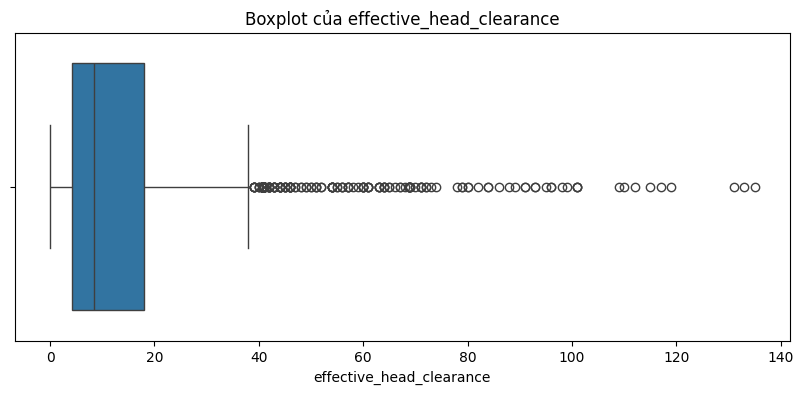


Cột: fifty_fifty
Số lượng outliers (IQR): 82
Giá trị outliers (IQR):
fifty_fifty
79.0    6
84.0    5
80.0    5
89.0    5
83.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 34
Giá trị outliers (Z-score):
fifty_fifty
107.0    4
104.0    3
96.0     3
93.0     3
95.0     3
Name: count, dtype: int64


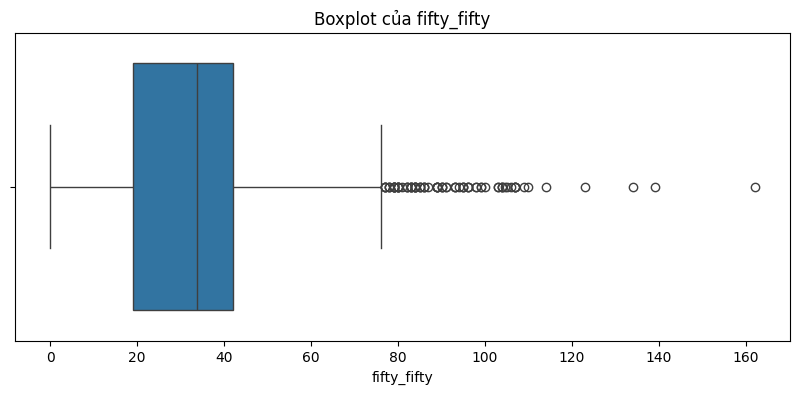


Cột: final_third_entries
Số lượng outliers (IQR): 98
Giá trị outliers (IQR):
final_third_entries
246.0    4
253.0    4
254.0    3
281.0    3
224.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 58
Giá trị outliers (Z-score):
final_third_entries
253.0    4
254.0    3
252.0    3
281.0    3
305.0    2
Name: count, dtype: int64


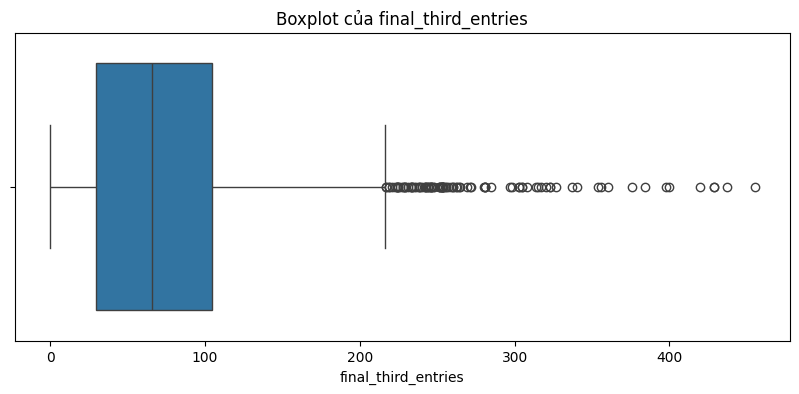


Cột: fouled_final_third
Số lượng outliers (IQR): 132
Giá trị outliers (IQR):
fouled_final_third
9.0     33
11.0    19
14.0    13
10.0    12
12.0    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
fouled_final_third
14.0    13
16.0     7
13.0     7
18.0     7
15.0     5
Name: count, dtype: int64


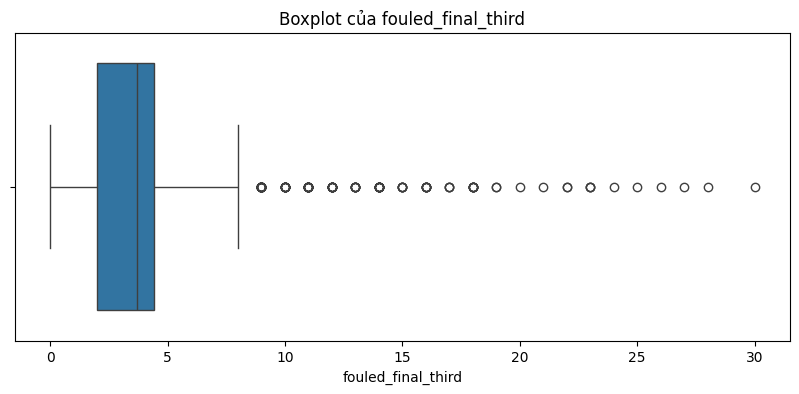


Cột: fouls
Số lượng outliers (IQR): 130
Giá trị outliers (IQR):
fouls
39.0    17
43.0    13
37.0    11
38.0    10
40.0     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 44
Giá trị outliers (Z-score):
fouls
48.0    8
50.0    7
47.0    4
68.0    4
65.0    3
Name: count, dtype: int64


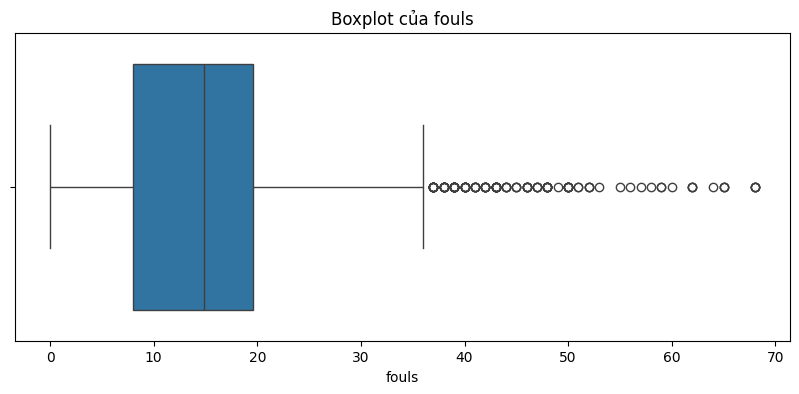


Cột: fwd_pass
Số lượng outliers (IQR): 54
Giá trị outliers (IQR):
fwd_pass
721.0    2
710.0    2
826.0    2
716.0    2
695.0    1
Name: count, dtype: int64

Số lượng outliers (Z-score): 50
Giá trị outliers (Z-score):
fwd_pass
721.0    2
710.0    2
826.0    2
716.0    2
812.0    1
Name: count, dtype: int64


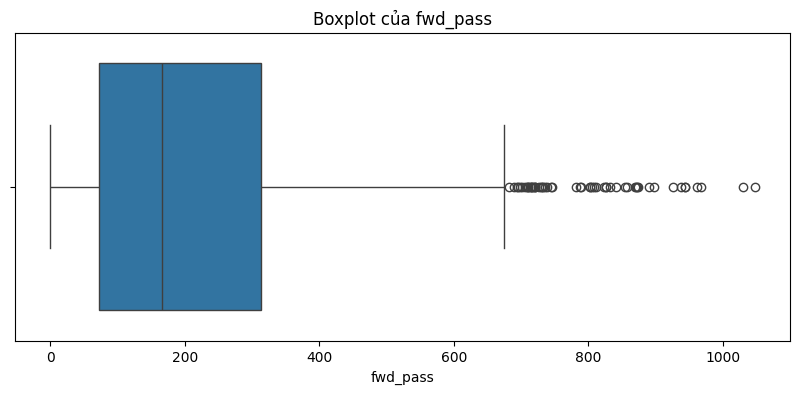


Cột: game_started
Số lượng outliers (IQR): 425
Giá trị outliers (IQR):
game_started
1.0     92
2.0     58
36.0    35
32.0    33
34.0    33
Name: count, dtype: int64

Số lượng outliers (Z-score): 0


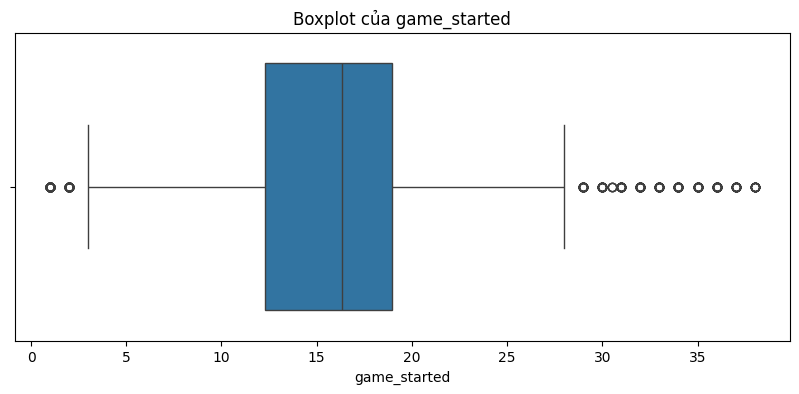


Cột: goal_assist
Số lượng outliers (IQR): 141
Giá trị outliers (IQR):
goal_assist
5.000000    41
6.000000    27
7.000000    21
8.000000    17
6.818182    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 73
Giá trị outliers (Z-score):
goal_assist
7.000000     21
8.000000     17
6.818182     10
10.000000     9
9.000000      7
Name: count, dtype: int64


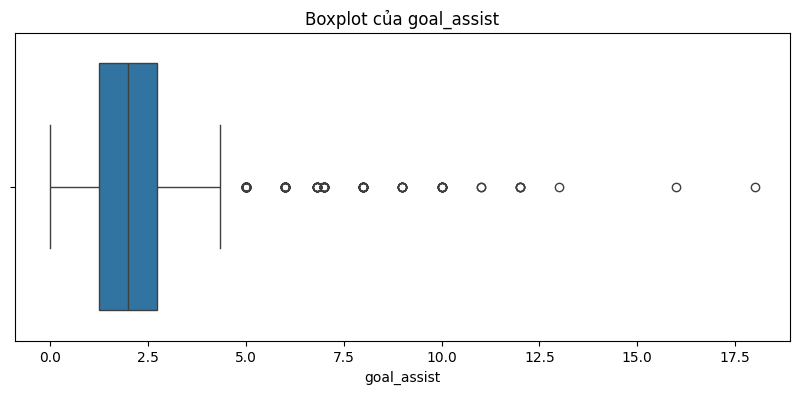


Cột: goal_assist_intentional
Số lượng outliers (IQR): 98
Giá trị outliers (IQR):
goal_assist_intentional
6.0    28
5.0    28
7.0    20
8.0     7
9.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 70
Giá trị outliers (Z-score):
goal_assist_intentional
6.0     28
7.0     20
8.0      7
9.0      5
10.0     5
Name: count, dtype: int64


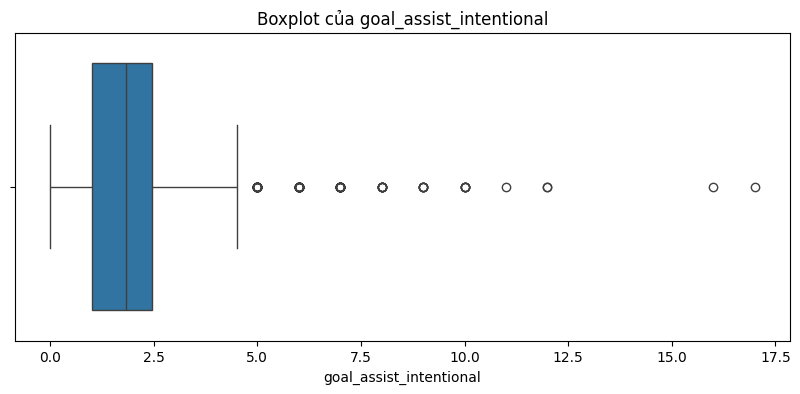


Cột: goal_assist_openplay
Số lượng outliers (IQR): 98
Giá trị outliers (IQR):
goal_assist_openplay
5.000000    29
6.000000    24
8.000000    14
5.909091    10
7.000000     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 69
Giá trị outliers (Z-score):
goal_assist_openplay
6.000000    24
8.000000    14
5.909091    10
7.000000     9
9.000000     4
Name: count, dtype: int64


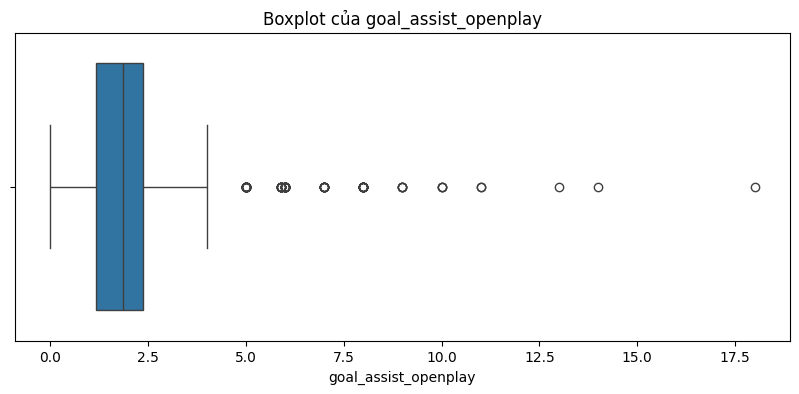


Cột: goals_conceded
Số lượng outliers (IQR): 188
Giá trị outliers (IQR):
goals_conceded
43.0    21
44.0    13
45.0    13
47.0    11
48.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 35
Giá trị outliers (Z-score):
goals_conceded
62.0    6
58.0    5
66.0    3
70.0    2
63.0    2
Name: count, dtype: int64


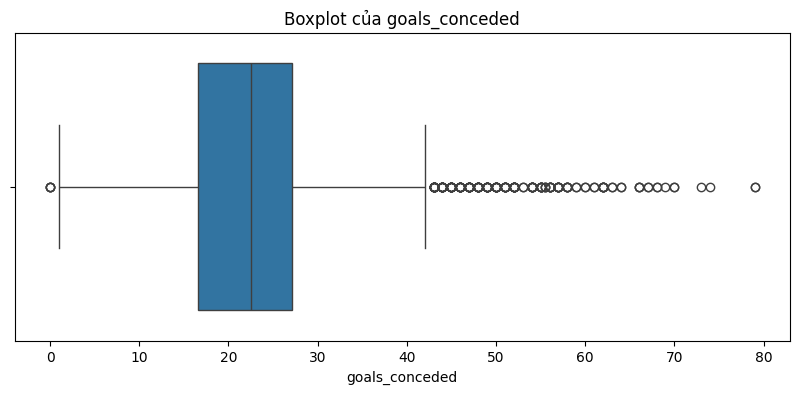


Cột: goals_conceded_ibox
Số lượng outliers (IQR): 185
Giá trị outliers (IQR):
goals_conceded_ibox
39.0    26
40.0    18
41.0    15
48.0    13
38.0    13
Name: count, dtype: int64

Số lượng outliers (Z-score): 37
Giá trị outliers (Z-score):
goals_conceded_ibox
52.0    6
51.0    5
56.0    3
60.0    3
57.0    2
Name: count, dtype: int64


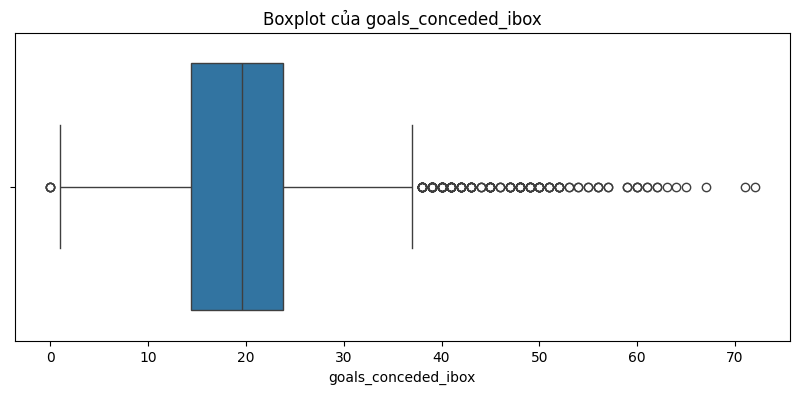


Cột: goals_conceded_obox
Số lượng outliers (IQR): 469
Giá trị outliers (IQR):
goals_conceded_obox
1.0    238
6.0     78
7.0     58
8.0     33
9.0     18
Name: count, dtype: int64

Số lượng outliers (Z-score): 49
Giá trị outliers (Z-score):
goals_conceded_obox
9.0     18
11.0     9
10.0     8
12.0     6
14.0     5
Name: count, dtype: int64


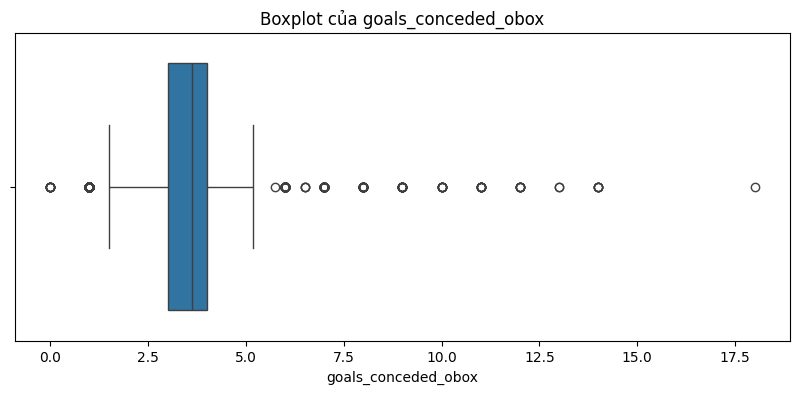


Cột: head_clearance
Số lượng outliers (IQR): 318
Giá trị outliers (IQR):
head_clearance
40.706522    165
46.000000      8
44.000000      8
54.000000      7
42.000000      7
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
head_clearance
68.75    5
71.00    4
64.00    4
63.00    4
69.00    3
Name: count, dtype: int64


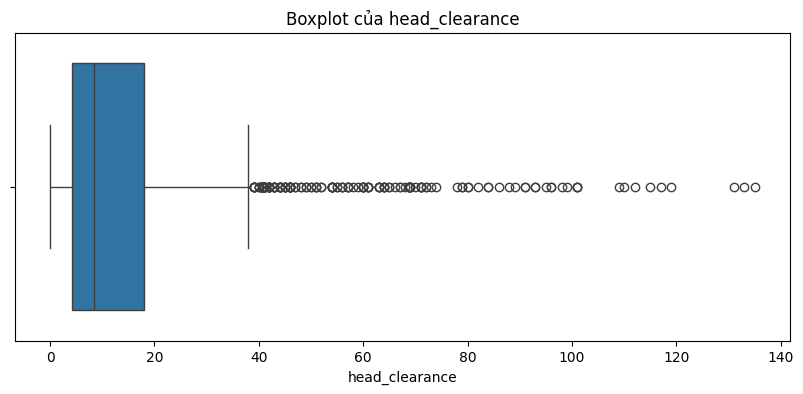


Cột: head_pass
Số lượng outliers (IQR): 137
Giá trị outliers (IQR):
head_pass
121.000000    7
114.000000    7
145.000000    5
122.583333    5
136.000000    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
head_pass
156.0    3
167.0    2
151.0    2
203.0    2
170.0    2
Name: count, dtype: int64


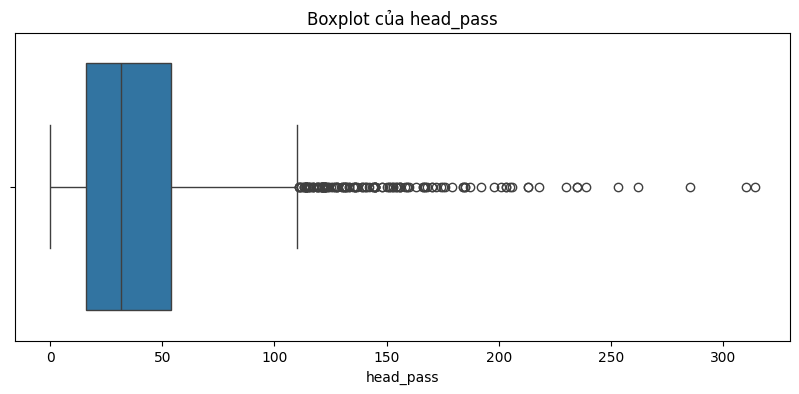


Cột: interception
Số lượng outliers (IQR): 72
Giá trị outliers (IQR):
interception
43.0    10
44.0     7
45.0     6
52.0     5
56.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
interception
45.0    6
56.0    5
52.0    5
48.0    4
46.0    4
Name: count, dtype: int64


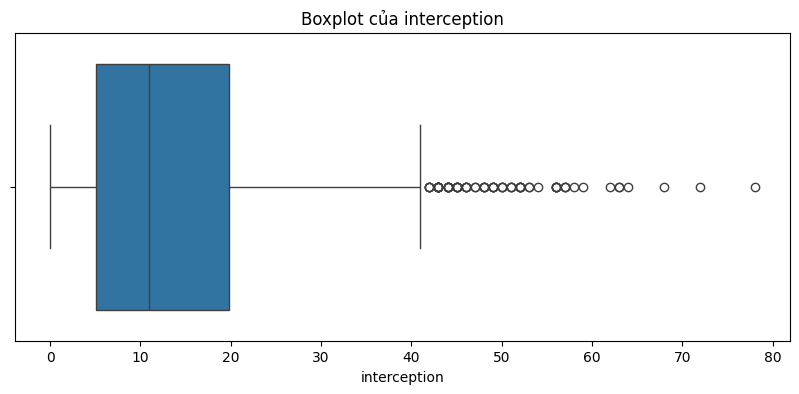


Cột: interception_won
Số lượng outliers (IQR): 72
Giá trị outliers (IQR):
interception_won
43.0    10
44.0     7
45.0     6
52.0     5
56.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
interception_won
45.0    6
56.0    5
52.0    5
48.0    4
46.0    4
Name: count, dtype: int64


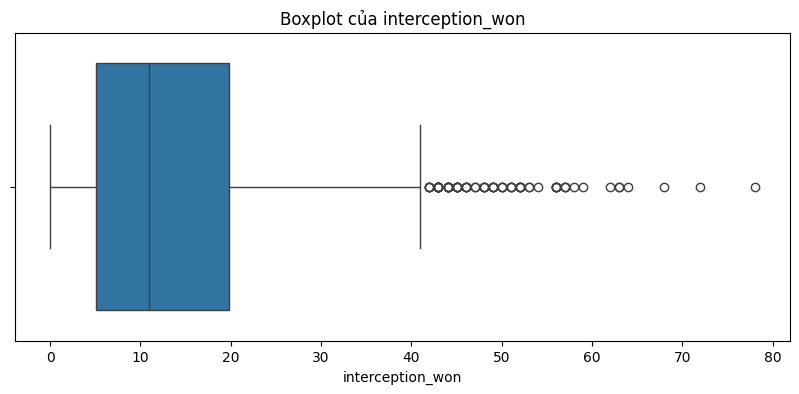


Cột: interceptions_in_box
Số lượng outliers (IQR): 80
Giá trị outliers (IQR):
interceptions_in_box
6.0     36
7.0     16
8.0      9
9.0      8
10.0     3
Name: count, dtype: int64

Số lượng outliers (Z-score): 44
Giá trị outliers (Z-score):
interceptions_in_box
7.0     16
8.0      9
9.0      8
10.0     3
12.0     3
Name: count, dtype: int64


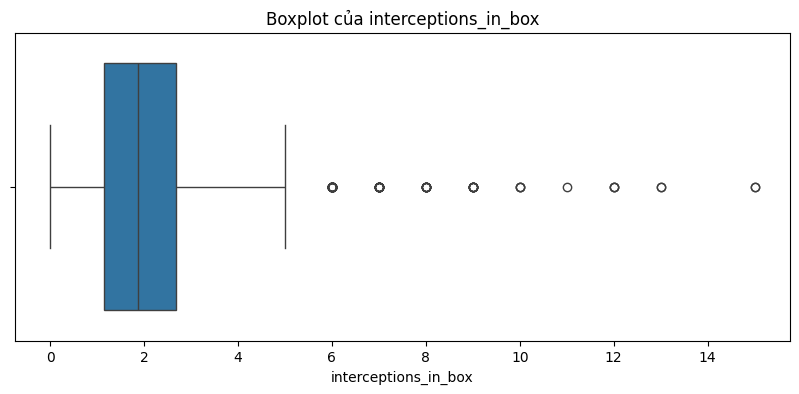


Cột: leftside_pass
Số lượng outliers (IQR): 123
Giá trị outliers (IQR):
leftside_pass
436.0    3
488.0    3
487.0    2
482.0    2
430.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
leftside_pass
564.0    2
568.0    2
616.0    1
594.0    1
649.0    1
Name: count, dtype: int64


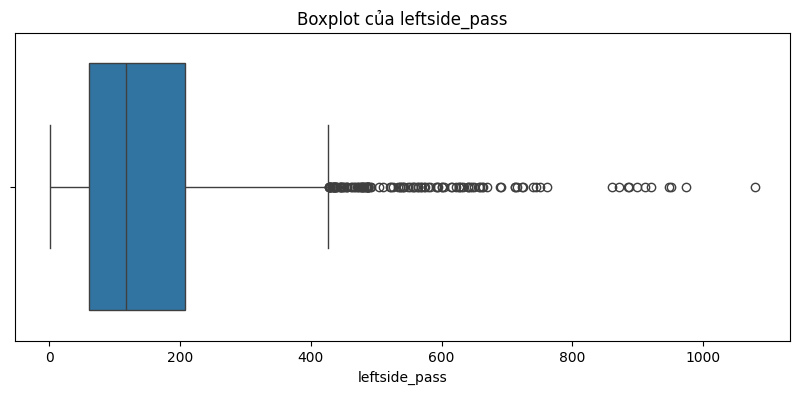


Cột: long_pass_own_to_opp
Số lượng outliers (IQR): 89
Giá trị outliers (IQR):
long_pass_own_to_opp
354.0    4
325.0    2
383.0    2
334.0    2
347.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 45
Giá trị outliers (Z-score):
long_pass_own_to_opp
454.0    2
443.0    2
383.0    2
436.0    1
419.0    1
Name: count, dtype: int64


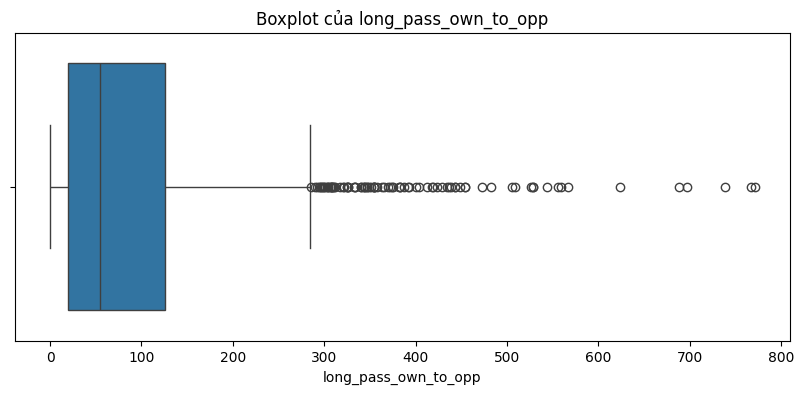


Cột: long_pass_own_to_opp_success
Số lượng outliers (IQR): 123
Giá trị outliers (IQR):
long_pass_own_to_opp_success
148.166667    5
157.000000    4
168.000000    4
173.000000    3
148.000000    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 60
Giá trị outliers (Z-score):
long_pass_own_to_opp_success
203.0    3
193.0    3
205.0    3
395.0    2
293.0    2
Name: count, dtype: int64


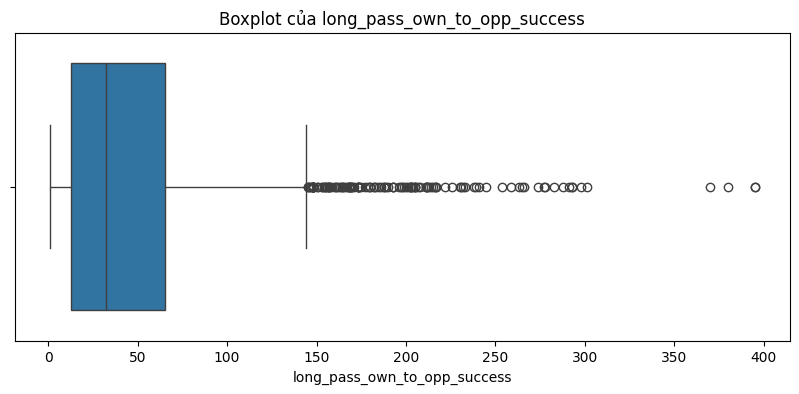


Cột: losses
Số lượng outliers (IQR): 384
Giá trị outliers (IQR):
losses
1.0     145
14.0     51
16.0     37
18.0     33
15.0     28
Name: count, dtype: int64

Số lượng outliers (Z-score): 45
Giá trị outliers (Z-score):
losses
20.0    18
21.0     9
23.0     5
22.0     4
26.0     3
Name: count, dtype: int64


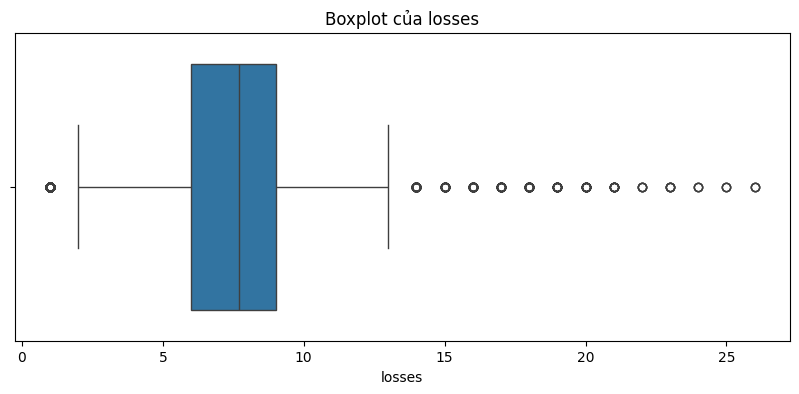


Cột: lost_corners
Số lượng outliers (IQR): 53
Giá trị outliers (IQR):
lost_corners
29.0    9
30.0    7
34.0    6
38.0    5
33.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
lost_corners
29.0    9
30.0    7
34.0    6
38.0    5
33.0    5
Name: count, dtype: int64


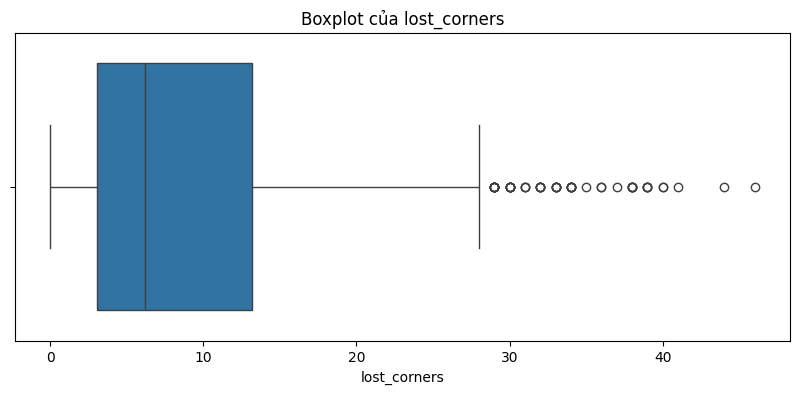


Cột: offside_provoked
Số lượng outliers (IQR): 426
Giá trị outliers (IQR):
offside_provoked
9.335227    173
7.558824     39
7.000000     31
6.000000     31
9.000000     24
Name: count, dtype: int64

Số lượng outliers (Z-score): 50
Giá trị outliers (Z-score):
offside_provoked
15.0    9
19.0    7
22.0    5
20.0    5
16.0    4
Name: count, dtype: int64


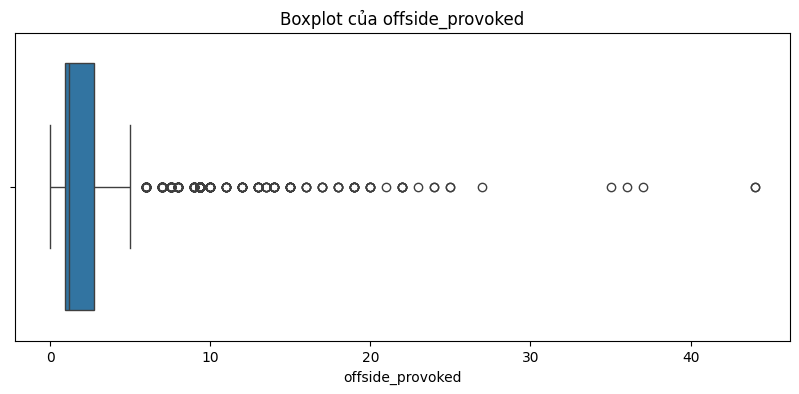


Cột: offtarget_att_assist
Số lượng outliers (IQR): 113
Giá trị outliers (IQR):
offtarget_att_assist
17.0    15
16.0    15
18.0    13
20.0    10
22.0     8
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
offtarget_att_assist
22.0    8
21.0    7
24.0    7
23.0    6
31.0    4
Name: count, dtype: int64


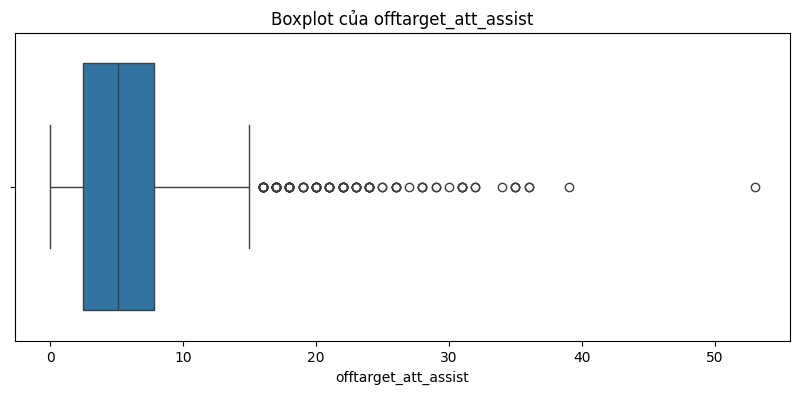


Cột: ontarget_att_assist
Số lượng outliers (IQR): 144
Giá trị outliers (IQR):
ontarget_att_assist
25.0    15
26.0    14
27.0    13
29.0    10
28.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
ontarget_att_assist
35.0    10
40.0     4
34.0     4
33.0     4
42.0     3
Name: count, dtype: int64


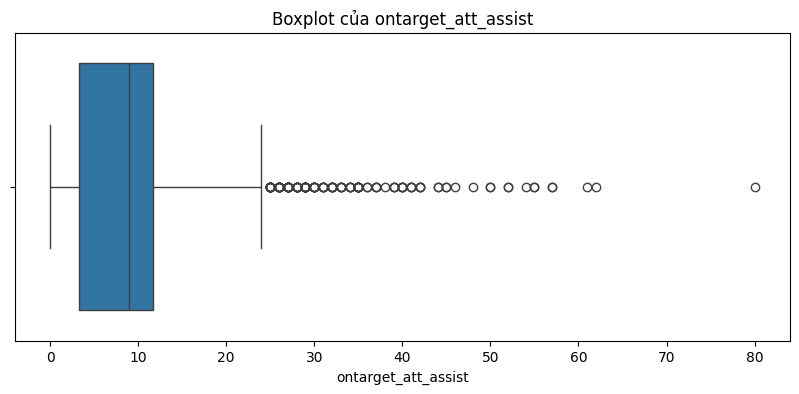


Cột: ontarget_scoring_att
Số lượng outliers (IQR): 110
Giá trị outliers (IQR):
ontarget_scoring_att
22.000000    12
23.000000    10
28.166667     9
32.000000     8
29.000000     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 66
Giá trị outliers (Z-score):
ontarget_scoring_att
28.166667    9
32.000000    8
29.000000    7
34.000000    6
39.000000    4
Name: count, dtype: int64


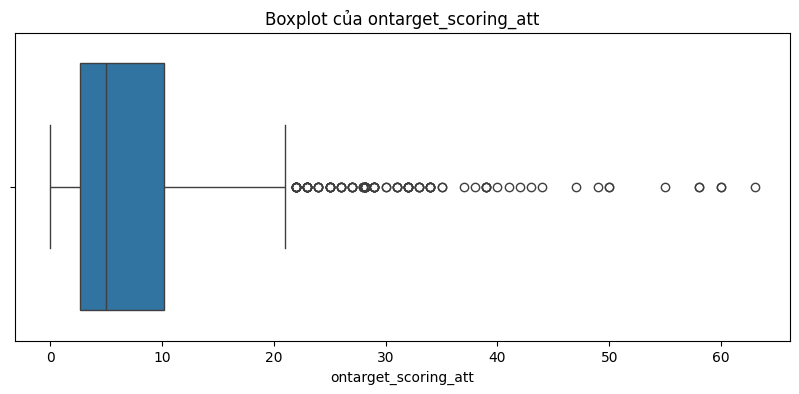


Cột: open_play_pass
Số lượng outliers (IQR): 115
Giá trị outliers (IQR):
open_play_pass
1519.0    3
1550.0    2
1830.0    2
1652.0    2
1516.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
open_play_pass
1830.0    2
1821.0    2
2269.0    1
2575.0    1
2430.0    1
Name: count, dtype: int64


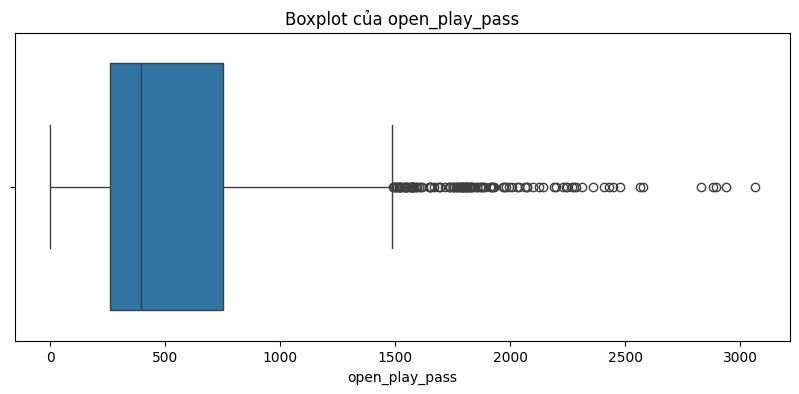


Cột: outfielder_block
Số lượng outliers (IQR): 122
Giá trị outliers (IQR):
outfielder_block
17.0    16
16.0    10
24.0    10
18.0     8
19.0     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 58
Giá trị outliers (Z-score):
outfielder_block
24.0    10
28.0     6
26.0     6
25.0     6
29.0     5
Name: count, dtype: int64


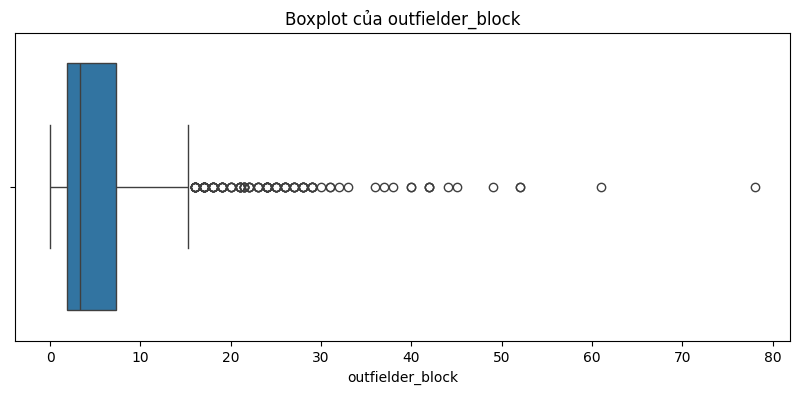


Cột: overrun
Số lượng outliers (IQR): 126
Giá trị outliers (IQR):
overrun
6.000000    32
7.000000    31
9.000000    15
8.000000    14
8.333333    12
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
overrun
9.000000     15
8.000000     14
8.333333     12
10.000000     9
12.000000     5
Name: count, dtype: int64


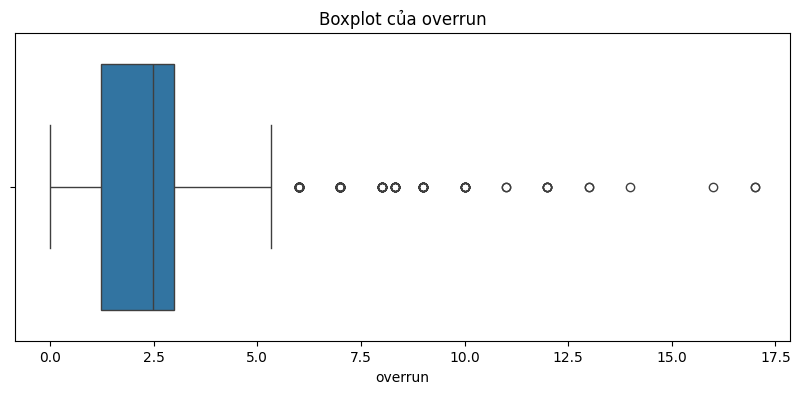


Cột: passes_left
Số lượng outliers (IQR): 291
Giá trị outliers (IQR):
passes_left
210.930233    78
225.416667     5
211.000000     5
224.000000     4
282.000000     4
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
passes_left
341.0    2
400.0    2
352.0    2
334.0    2
326.0    2
Name: count, dtype: int64


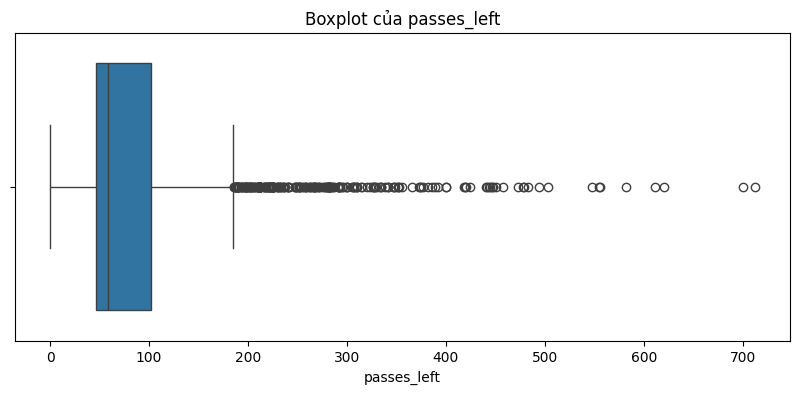


Cột: passes_right
Số lượng outliers (IQR): 257
Giá trị outliers (IQR):
passes_right
197.628571    78
236.000000     5
229.000000     5
208.000000     4
230.000000     4
Name: count, dtype: int64

Số lượng outliers (Z-score): 71
Giá trị outliers (Z-score):
passes_right
471.0    3
413.0    3
331.0    2
343.0    2
344.0    2
Name: count, dtype: int64


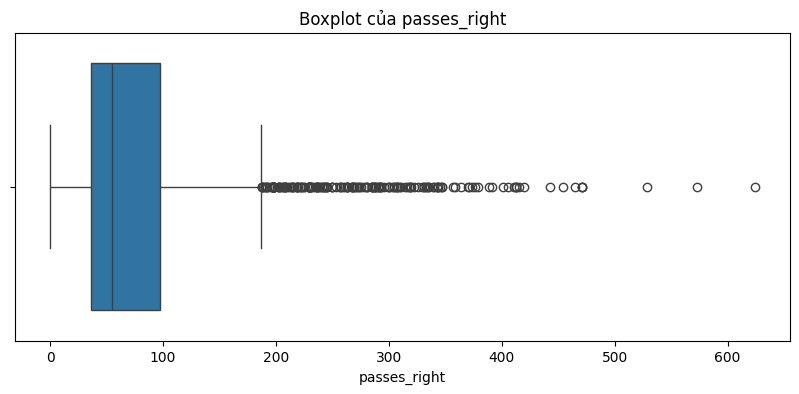


Cột: pen_area_entries
Số lượng outliers (IQR): 132
Giá trị outliers (IQR):
pen_area_entries
113.0    5
119.0    5
108.0    4
201.0    3
136.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 59
Giá trị outliers (Z-score):
pen_area_entries
201.0    3
164.0    3
162.0    3
205.0    3
189.0    2
Name: count, dtype: int64


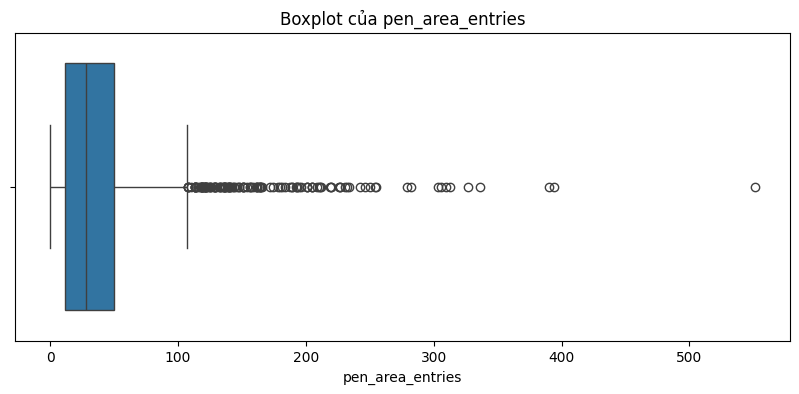


Cột: pen_goals_conceded
Số lượng outliers (IQR): 189
Giá trị outliers (IQR):
pen_goals_conceded
4.0    96
5.0    58
7.0    17
6.0    13
8.0     3
Name: count, dtype: int64

Số lượng outliers (Z-score): 35
Giá trị outliers (Z-score):
pen_goals_conceded
7.0    17
6.0    13
8.0     3
9.0     2
Name: count, dtype: int64


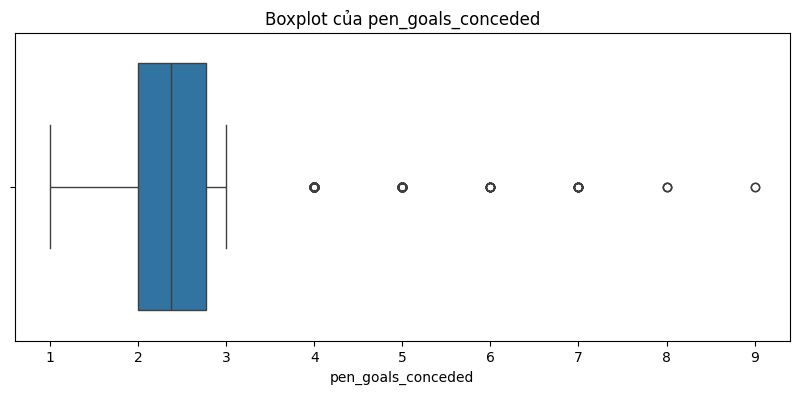


Cột: poss_lost_all
Số lượng outliers (IQR): 163
Giá trị outliers (IQR):
poss_lost_all
390.0    5
423.0    5
487.0    4
484.0    3
394.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 45
Giá trị outliers (Z-score):
poss_lost_all
532.0    2
522.0    2
516.0    2
638.0    2
520.0    1
Name: count, dtype: int64


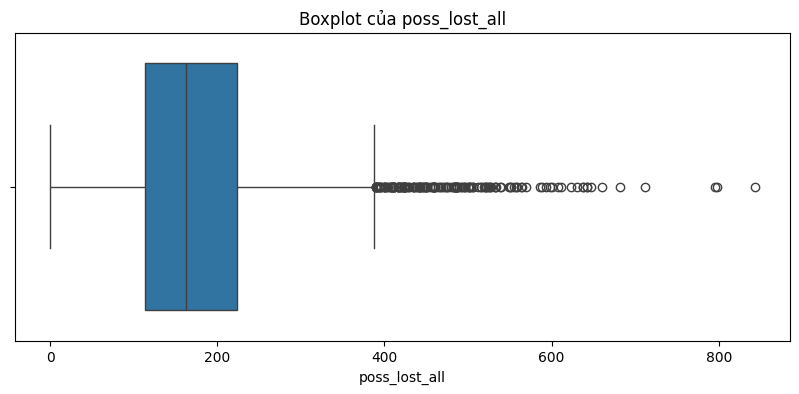


Cột: poss_lost_ctrl
Số lượng outliers (IQR): 163
Giá trị outliers (IQR):
poss_lost_ctrl
390.0    5
423.0    5
487.0    4
484.0    3
394.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 45
Giá trị outliers (Z-score):
poss_lost_ctrl
532.0    2
522.0    2
516.0    2
638.0    2
520.0    1
Name: count, dtype: int64


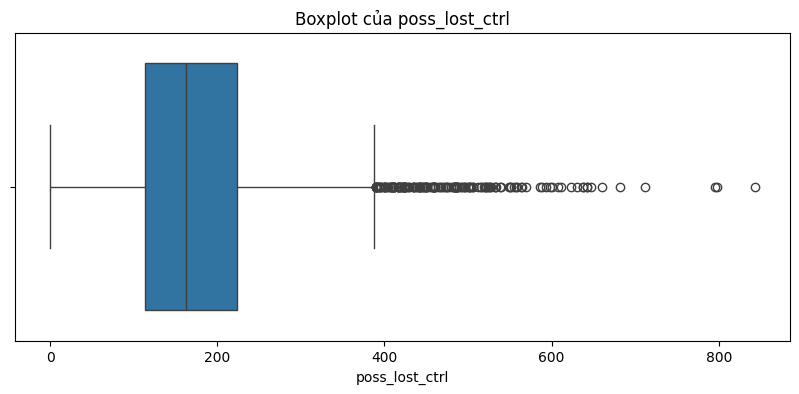


Cột: poss_won_att_3rd
Số lượng outliers (IQR): 81
Giá trị outliers (IQR):
poss_won_att_3rd
22.0    15
23.0    12
25.0    10
28.0     9
24.0     8
Name: count, dtype: int64

Số lượng outliers (Z-score): 46
Giá trị outliers (Z-score):
poss_won_att_3rd
25.0    10
28.0     9
26.0     5
29.0     4
31.0     3
Name: count, dtype: int64


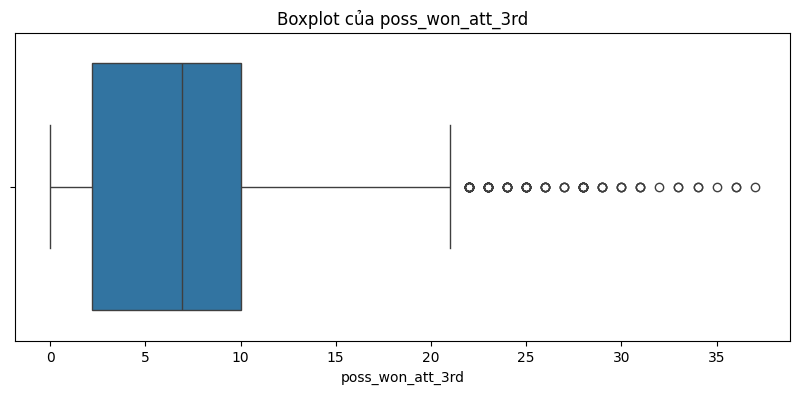


Cột: poss_won_def_3rd
Số lượng outliers (IQR): 104
Giá trị outliers (IQR):
poss_won_def_3rd
90.0     9
106.0    5
95.0     5
91.0     5
110.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
poss_won_def_3rd
106.0    5
107.0    4
110.0    4
103.0    4
119.0    3
Name: count, dtype: int64


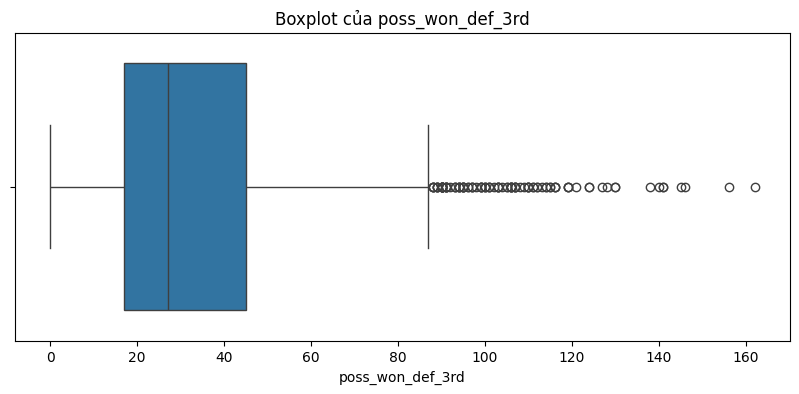


Cột: poss_won_mid_3rd
Số lượng outliers (IQR): 153
Giá trị outliers (IQR):
poss_won_mid_3rd
76.0    10
80.0     9
75.0     9
92.0     7
85.0     6
Name: count, dtype: int64

Số lượng outliers (Z-score): 48
Giá trị outliers (Z-score):
poss_won_mid_3rd
101.0    4
112.0    4
111.0    3
129.0    2
110.0    2
Name: count, dtype: int64


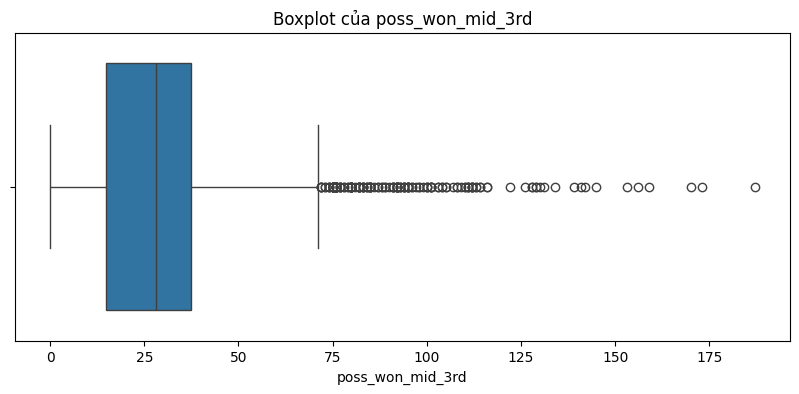


Cột: put_through
Số lượng outliers (IQR): 98
Giá trị outliers (IQR):
put_through
67.0    10
65.0     7
70.0     6
62.0     6
74.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 42
Giá trị outliers (Z-score):
put_through
74.0    5
81.0    3
79.0    3
88.0    3
80.0    3
Name: count, dtype: int64


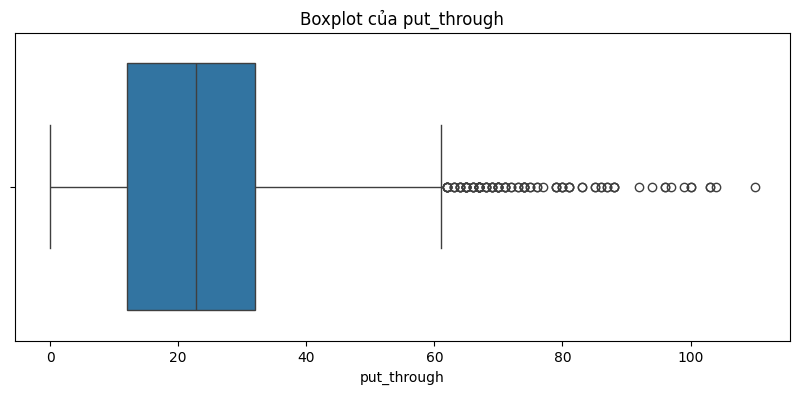


Cột: rightside_pass
Số lượng outliers (IQR): 119
Giá trị outliers (IQR):
rightside_pass
461.75    5
453.00    2
439.00    2
755.00    2
641.00    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 62
Giá trị outliers (Z-score):
rightside_pass
641.0    2
755.0    2
606.0    2
681.0    2
687.0    2
Name: count, dtype: int64


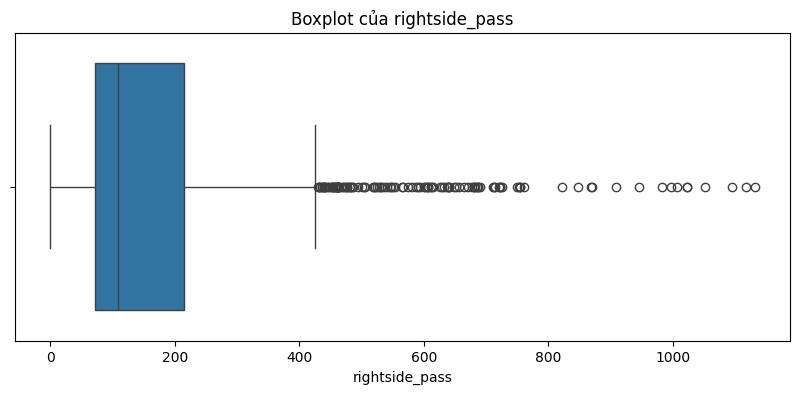


Cột: shot_off_target
Số lượng outliers (IQR): 107
Giá trị outliers (IQR):
shot_off_target
21.0    17
20.0    16
22.0    12
27.0     8
25.0     6
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
shot_off_target
27.0    8
25.0    6
26.0    5
37.0    4
38.0    3
Name: count, dtype: int64


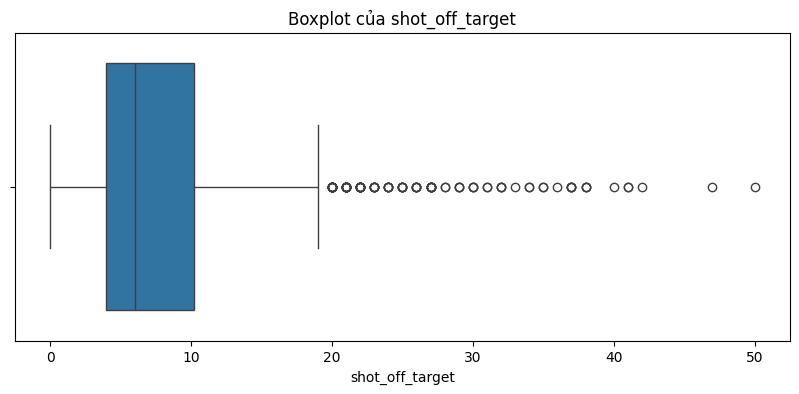


Cột: successful_fifty_fifty
Số lượng outliers (IQR): 104
Giá trị outliers (IQR):
successful_fifty_fifty
39.0    11
37.0    11
40.0    10
41.0     8
50.0     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 33
Giá trị outliers (Z-score):
successful_fifty_fifty
50.0    7
47.0    5
53.0    3
64.0    2
52.0    2
Name: count, dtype: int64


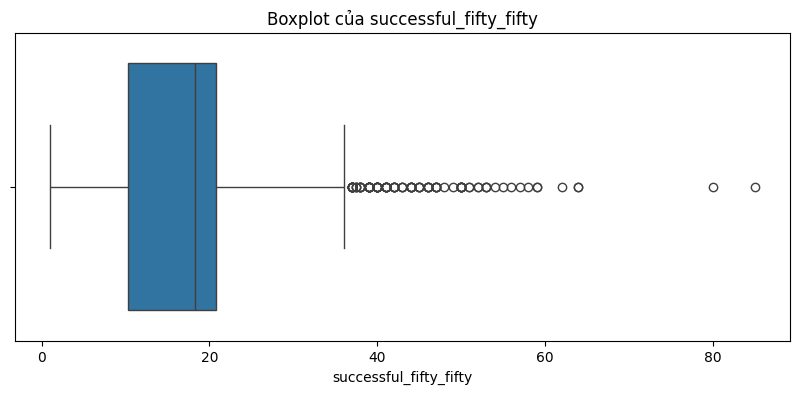


Cột: successful_final_third_passes
Số lượng outliers (IQR): 115
Giá trị outliers (IQR):
successful_final_third_passes
370.0    4
433.0    3
371.0    3
458.0    2
360.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 64
Giá trị outliers (Z-score):
successful_final_third_passes
433.0    3
464.0    2
458.0    2
558.0    2
419.0    2
Name: count, dtype: int64


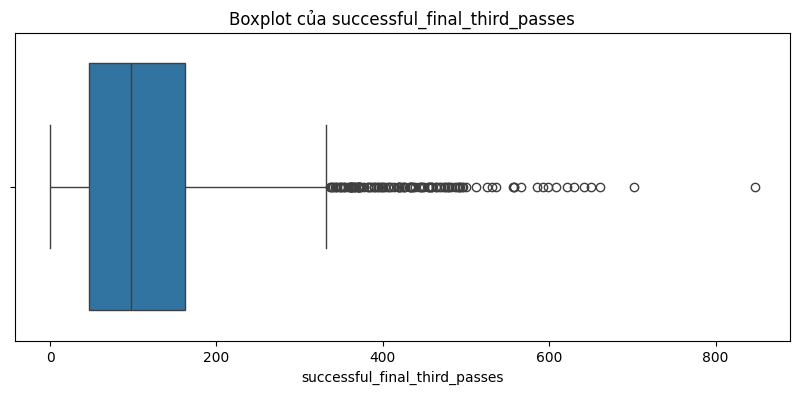


Cột: successful_open_play_pass
Số lượng outliers (IQR): 104
Giá trị outliers (IQR):
successful_open_play_pass
1482.0    2
1346.0    2
1355.0    2
1336.0    2
1389.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
successful_open_play_pass
1996.0    1
2462.0    1
1635.0    1
2304.0    1
2176.0    1
Name: count, dtype: int64


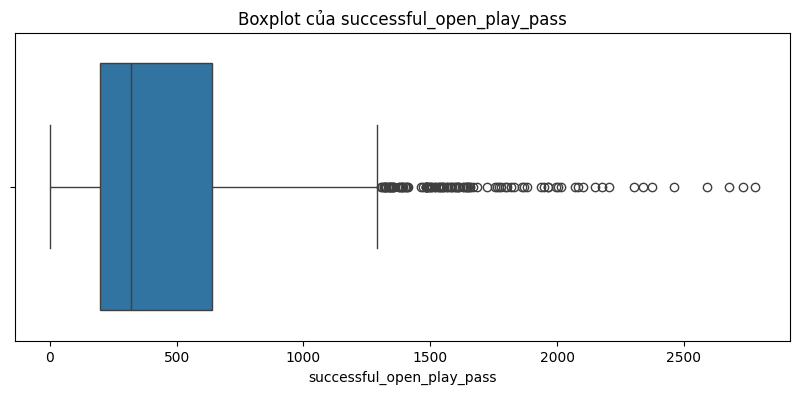


Cột: successful_put_through
Số lượng outliers (IQR): 146
Giá trị outliers (IQR):
successful_put_through
29.0    17
27.0    16
31.0    14
30.0    14
34.0    11
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
successful_put_through
38.0    8
35.0    7
36.0    6
37.0    6
40.0    5
Name: count, dtype: int64


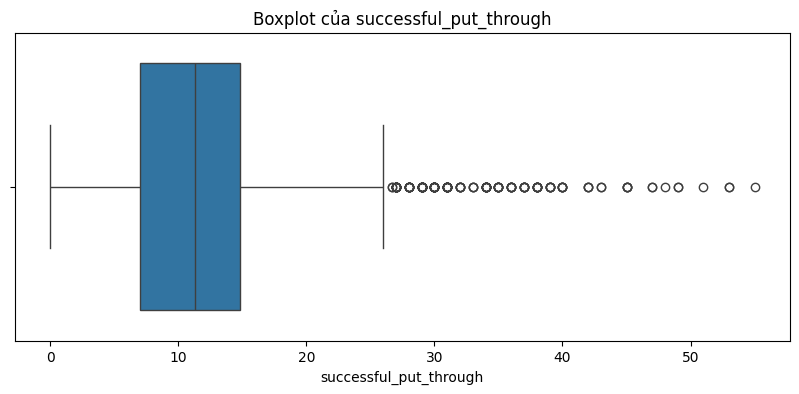


Cột: times_tackled
Số lượng outliers (IQR): 148
Giá trị outliers (IQR):
times_tackled
75.923077    8
74.000000    6
95.000000    6
75.000000    6
67.000000    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
times_tackled
95.0     6
98.0     4
96.0     3
108.0    3
107.0    3
Name: count, dtype: int64


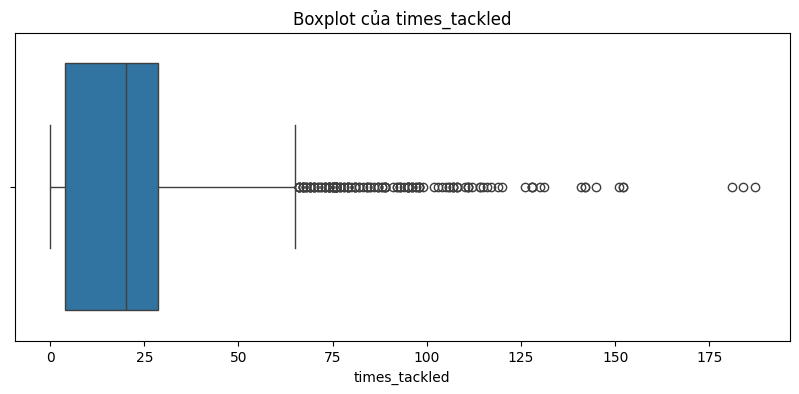


Cột: total_att_assist
Số lượng outliers (IQR): 146
Giá trị outliers (IQR):
total_att_assist
41.0    10
48.0    10
41.5     9
38.0     8
40.0     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
total_att_assist
55.0    5
59.0    3
60.0    3
65.0    3
52.0    3
Name: count, dtype: int64


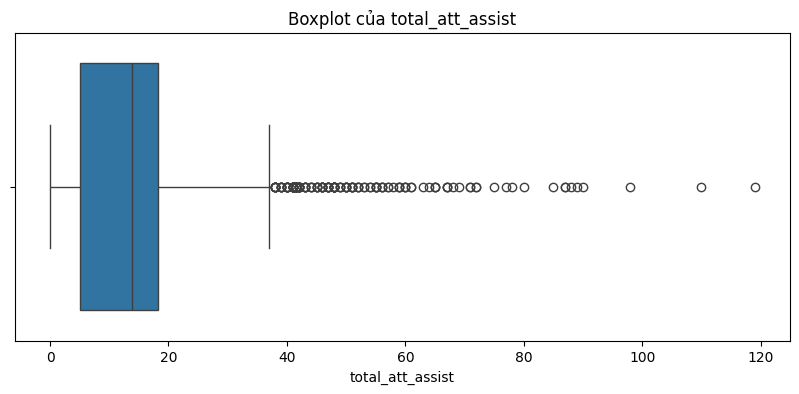


Cột: total_back_zone_pass
Số lượng outliers (IQR): 165
Giá trị outliers (IQR):
total_back_zone_pass
866.0    5
716.0    3
986.0    3
726.0    3
723.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 55
Giá trị outliers (Z-score):
total_back_zone_pass
1048.0    2
1600.0    1
1067.0    1
1641.0    1
1229.0    1
Name: count, dtype: int64


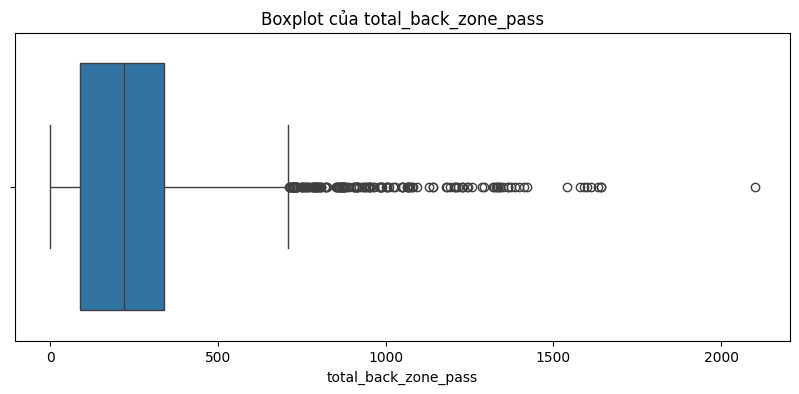


Cột: total_chipped_pass
Số lượng outliers (IQR): 86
Giá trị outliers (IQR):
total_chipped_pass
170.0    4
214.0    3
211.0    3
181.0    2
167.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 60
Giá trị outliers (Z-score):
total_chipped_pass
214.0    3
211.0    3
242.0    2
195.0    2
202.0    2
Name: count, dtype: int64


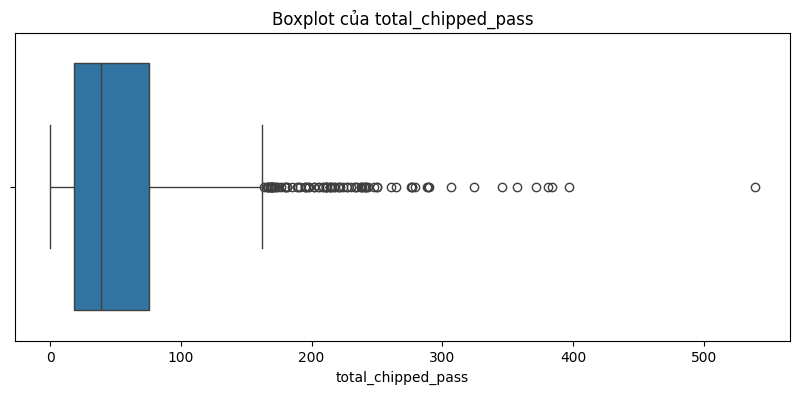


Cột: total_clearance
Số lượng outliers (IQR): 321
Giá trị outliers (IQR):
total_clearance
74.095745     161
78.000000       6
82.000000       6
122.416667      5
81.000000       5
Name: count, dtype: int64

Số lượng outliers (Z-score): 64
Giá trị outliers (Z-score):
total_clearance
122.416667    5
120.000000    4
187.000000    3
139.000000    3
138.000000    2
Name: count, dtype: int64


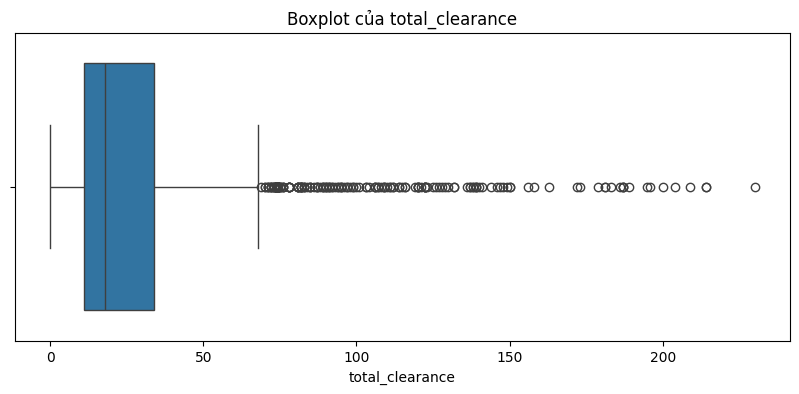


Cột: total_contest
Số lượng outliers (IQR): 154
Giá trị outliers (IQR):
total_contest
68.000000    9
67.461538    8
67.000000    7
64.000000    7
77.000000    6
Name: count, dtype: int64

Số lượng outliers (Z-score): 61
Giá trị outliers (Z-score):
total_contest
90.0     5
93.0     4
92.0     4
106.0    3
107.0    3
Name: count, dtype: int64


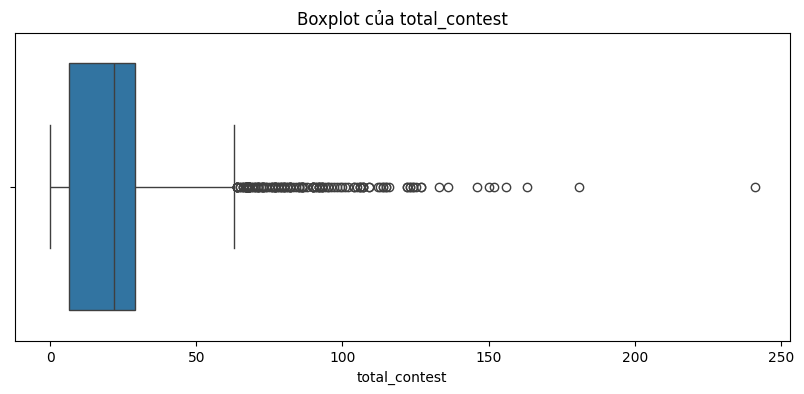


Cột: total_cross
Số lượng outliers (IQR): 147
Giá trị outliers (IQR):
total_cross
96.0     5
79.0     5
87.0     4
132.0    4
110.0    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 61
Giá trị outliers (Z-score):
total_cross
132.0    4
124.0    3
141.0    2
195.0    2
172.0    2
Name: count, dtype: int64


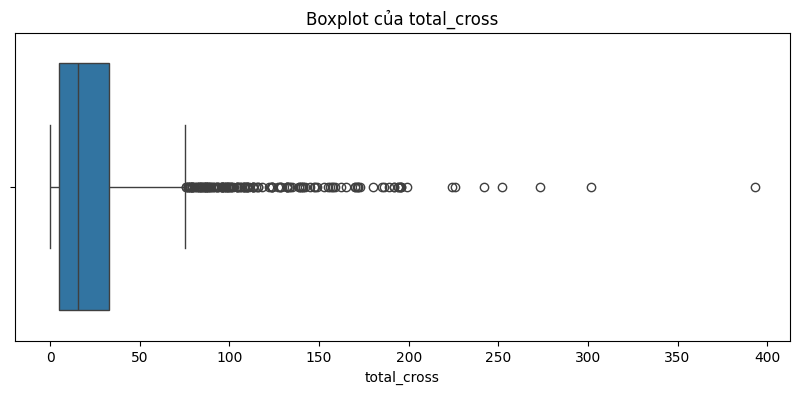


Cột: total_cross_nocorner
Số lượng outliers (IQR): 141
Giá trị outliers (IQR):
total_cross_nocorner
73.0    8
74.0    7
58.0    6
63.0    6
62.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 60
Giá trị outliers (Z-score):
total_cross_nocorner
102.0    5
123.0    4
87.0     4
96.0     4
93.0     4
Name: count, dtype: int64


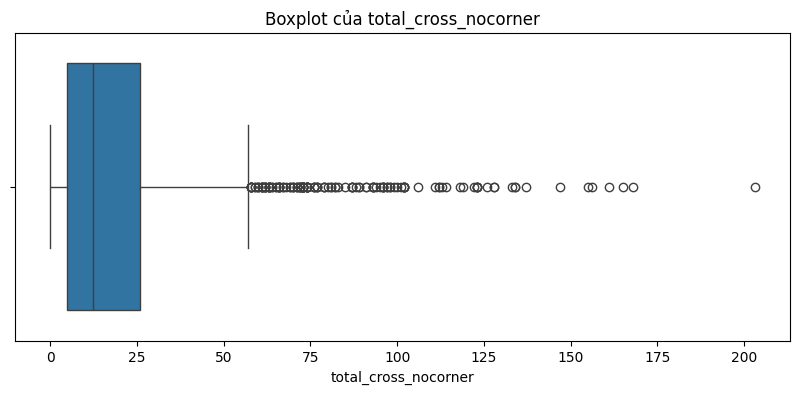


Cột: total_final_third_passes
Số lượng outliers (IQR): 124
Giá trị outliers (IQR):
total_final_third_passes
444.0    4
435.0    3
586.0    3
481.0    3
533.0    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
total_final_third_passes
586.0    3
555.0    2
573.0    2
592.0    2
653.0    2
Name: count, dtype: int64


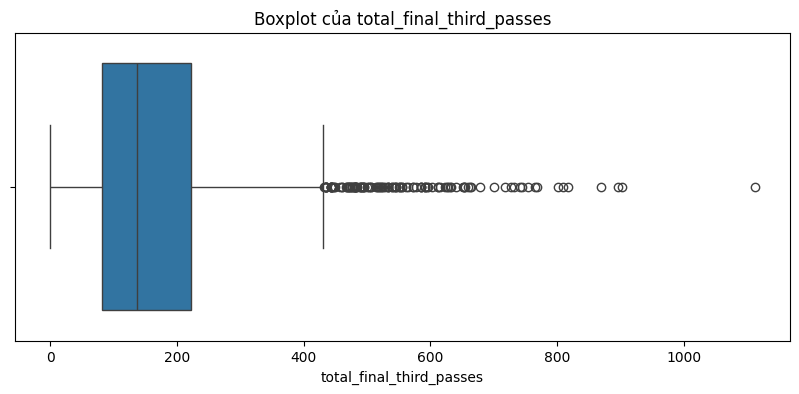


Cột: total_flick_on
Số lượng outliers (IQR): 266
Giá trị outliers (IQR):
total_flick_on
21.619565    109
16.741935     15
20.000000     12
17.000000     11
18.000000      9
Name: count, dtype: int64

Số lượng outliers (Z-score): 43
Giá trị outliers (Z-score):
total_flick_on
41.0    4
50.0    4
37.0    3
43.0    3
35.0    3
Name: count, dtype: int64


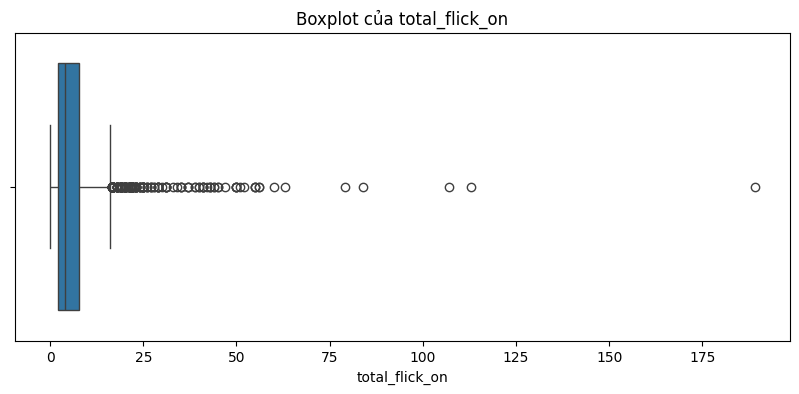


Cột: total_fwd_zone_pass
Số lượng outliers (IQR): 122
Giá trị outliers (IQR):
total_fwd_zone_pass
855.0     4
1036.0    3
874.0     3
927.0     2
912.0     2
Name: count, dtype: int64

Số lượng outliers (Z-score): 44
Giá trị outliers (Z-score):
total_fwd_zone_pass
1043.0    2
1232.0    2
2008.0    1
1315.0    1
1320.0    1
Name: count, dtype: int64


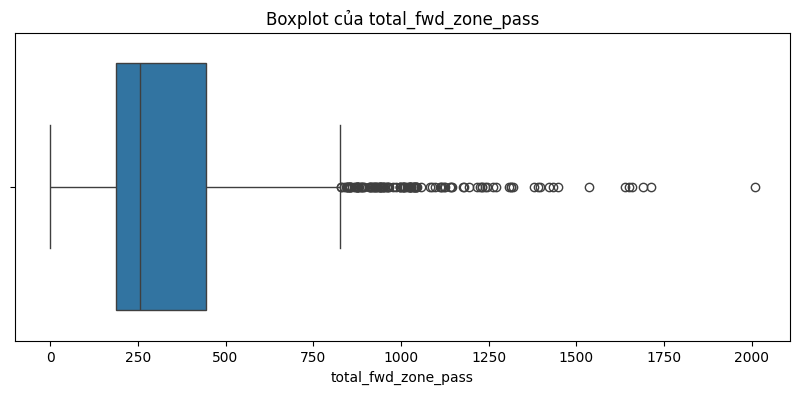


Cột: total_launches
Số lượng outliers (IQR): 357
Giá trị outliers (IQR):
total_launches
99.274336    242
66.000000      6
61.000000      5
68.000000      4
85.000000      4
Name: count, dtype: int64

Số lượng outliers (Z-score): 32
Giá trị outliers (Z-score):
total_launches
191.0    2
352.0    2
158.0    2
282.0    1
168.0    1
Name: count, dtype: int64


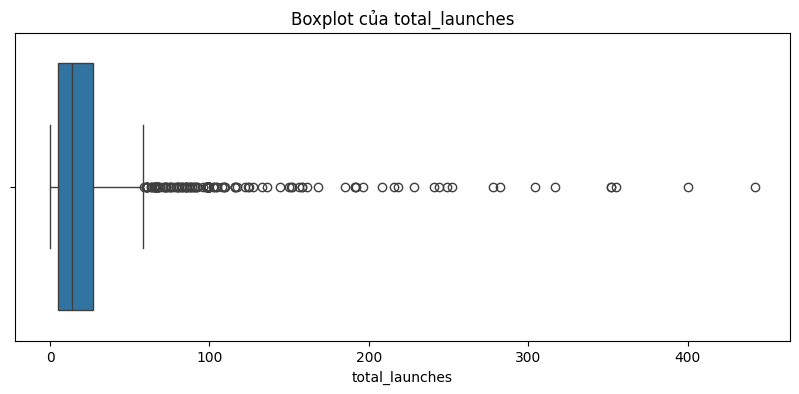


Cột: total_layoffs
Số lượng outliers (IQR): 87
Giá trị outliers (IQR):
total_layoffs
34.0    12
33.0     7
31.0     6
32.0     5
37.0     5
Name: count, dtype: int64

Số lượng outliers (Z-score): 54
Giá trị outliers (Z-score):
total_layoffs
37.0    5
49.0    5
42.0    4
58.0    3
39.0    3
Name: count, dtype: int64


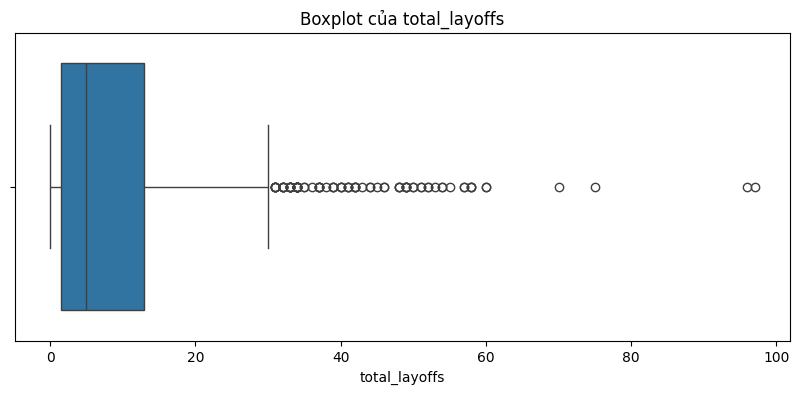


Cột: total_long_balls
Số lượng outliers (IQR): 360
Giá trị outliers (IQR):
total_long_balls
275.362832    242
214.000000      3
286.000000      2
334.000000      2
235.000000      2
Name: count, dtype: int64

Số lượng outliers (Z-score): 43
Giá trị outliers (Z-score):
total_long_balls
592.0    1
659.0    1
491.0    1
562.0    1
446.0    1
Name: count, dtype: int64


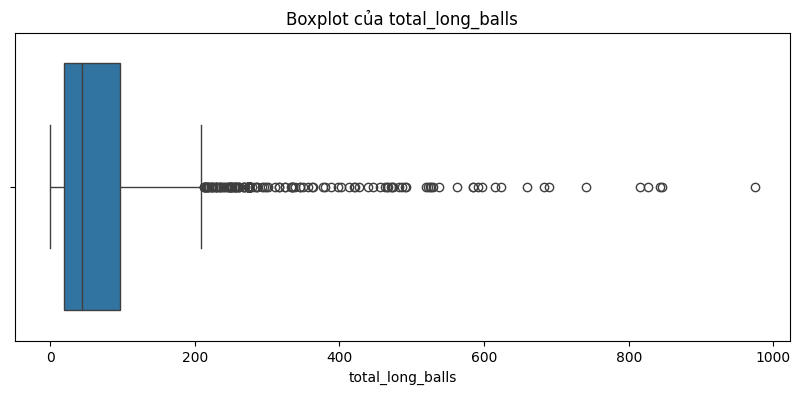


Cột: total_offside
Số lượng outliers (IQR): 437
Giá trị outliers (IQR):
total_offside
8.209877    120
7.131579    116
8.076923     20
9.000000     19
7.000000     19
Name: count, dtype: int64

Số lượng outliers (Z-score): 74
Giá trị outliers (Z-score):
total_offside
14.333333    12
14.000000    12
13.000000    11
16.000000     7
19.000000     7
Name: count, dtype: int64


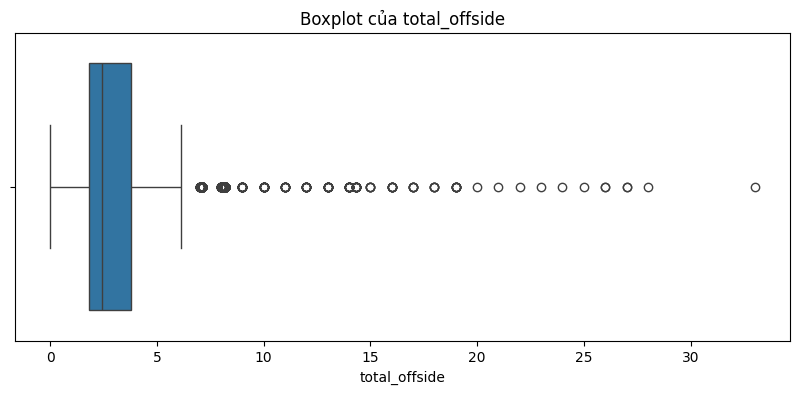


Cột: total_pass
Số lượng outliers (IQR): 116
Giá trị outliers (IQR):
total_pass
1584.0    3
1827.0    2
1920.0    2
1543.0    2
1901.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 56
Giá trị outliers (Z-score):
total_pass
1920.0    2
1901.0    2
1883.0    2
1934.0    2
2646.0    1
Name: count, dtype: int64


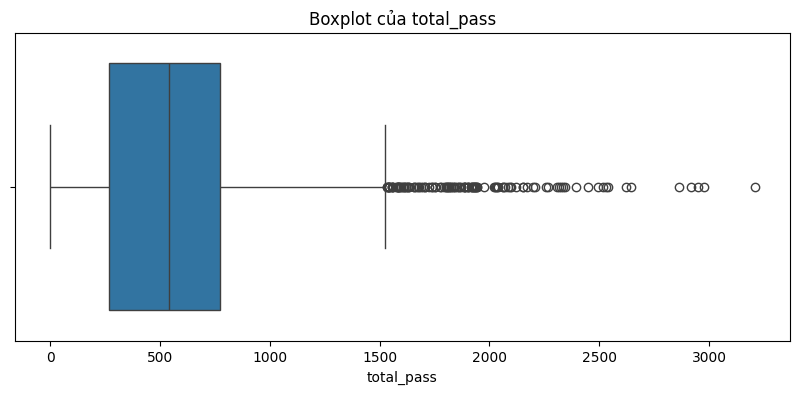


Cột: total_scoring_att
Số lượng outliers (IQR): 105
Giá trị outliers (IQR):
total_scoring_att
61.25    9
59.00    5
71.00    5
57.00    4
67.00    4
Name: count, dtype: int64

Số lượng outliers (Z-score): 61
Giá trị outliers (Z-score):
total_scoring_att
71.0    5
72.0    4
79.0    3
77.0    3
98.0    3
Name: count, dtype: int64


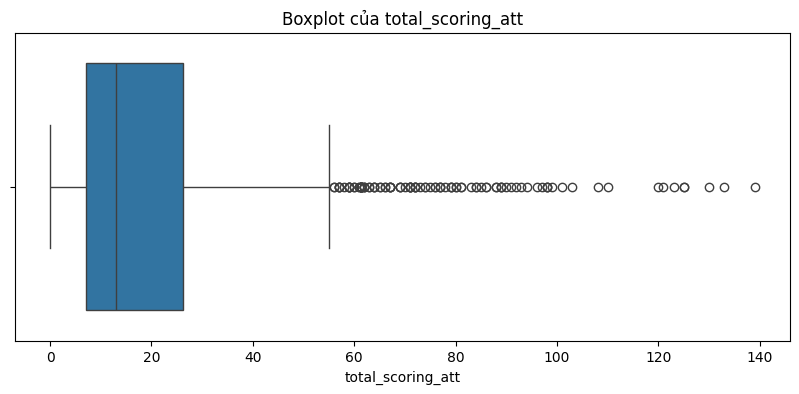


Cột: total_sub_off
Số lượng outliers (IQR): 64
Giá trị outliers (IQR):
total_sub_off
17.0    18
19.0    12
18.0    10
20.0     9
22.0     4
Name: count, dtype: int64

Số lượng outliers (Z-score): 46
Giá trị outliers (Z-score):
total_sub_off
19.0    12
18.0    10
20.0     9
22.0     4
23.0     4
Name: count, dtype: int64


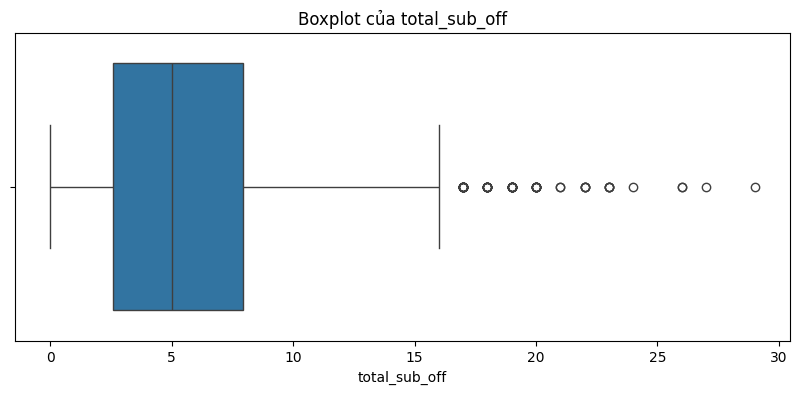


Cột: total_sub_on
Số lượng outliers (IQR): 105
Giá trị outliers (IQR):
total_sub_on
15.0    21
14.0    18
16.0    15
17.0    12
18.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 51
Giá trị outliers (Z-score):
total_sub_on
17.0    12
18.0    10
19.0     9
20.0     5
21.0     5
Name: count, dtype: int64


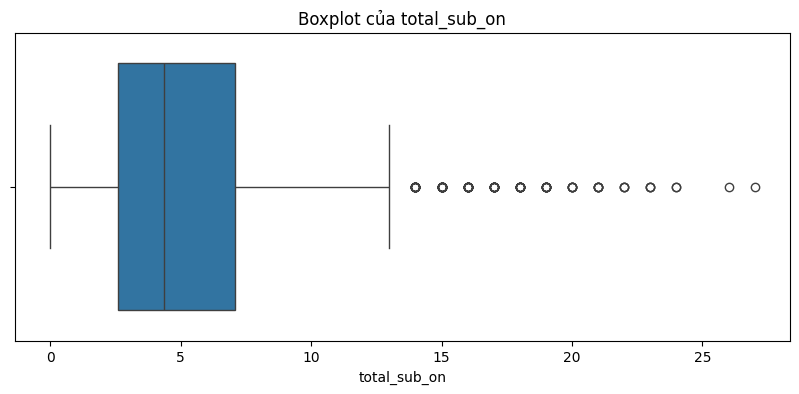


Cột: total_tackle
Số lượng outliers (IQR): 90
Giá trị outliers (IQR):
total_tackle
74.0    7
67.0    7
71.0    6
72.0    5
68.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 44
Giá trị outliers (Z-score):
total_tackle
78.0    5
88.0    4
80.0    4
83.0    3
79.0    3
Name: count, dtype: int64


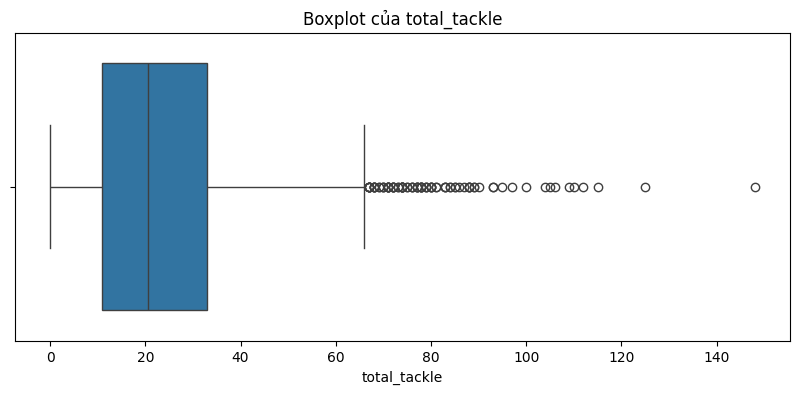


Cột: total_through_ball
Số lượng outliers (IQR): 146
Giá trị outliers (IQR):
total_through_ball
8.628571     30
8.000000     29
9.000000     13
11.000000    11
10.000000    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
total_through_ball
12.0    9
16.0    9
14.0    6
22.0    5
15.0    5
Name: count, dtype: int64


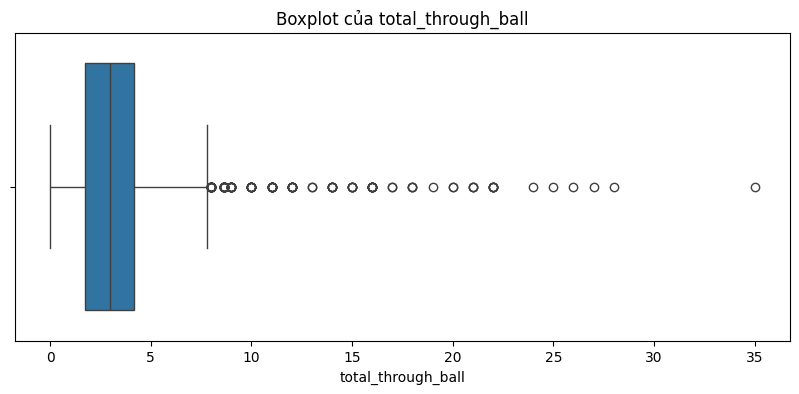


Cột: total_throws
Số lượng outliers (IQR): 379
Giá trị outliers (IQR):
total_throws
114.256098    82
131.048077    79
43.000000      5
103.000000     4
48.000000      4
Name: count, dtype: int64

Số lượng outliers (Z-score): 71
Giá trị outliers (Z-score):
total_throws
238.0    4
227.0    3
167.0    3
182.0    2
199.0    2
Name: count, dtype: int64


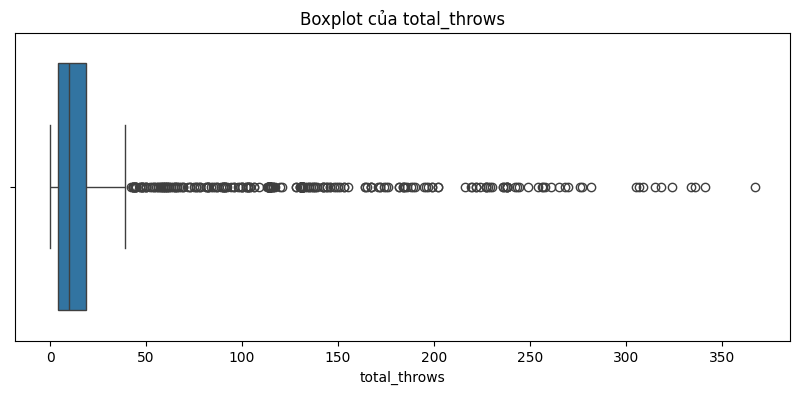


Cột: touches
Số lượng outliers (IQR): 98
Giá trị outliers (IQR):
touches
2317.0    2
2630.0    2
2264.0    2
2671.0    2
2280.0    2
Name: count, dtype: int64

Số lượng outliers (Z-score): 40
Giá trị outliers (Z-score):
touches
2630.0    2
2671.0    2
3908.0    1
2921.0    1
3059.0    1
Name: count, dtype: int64


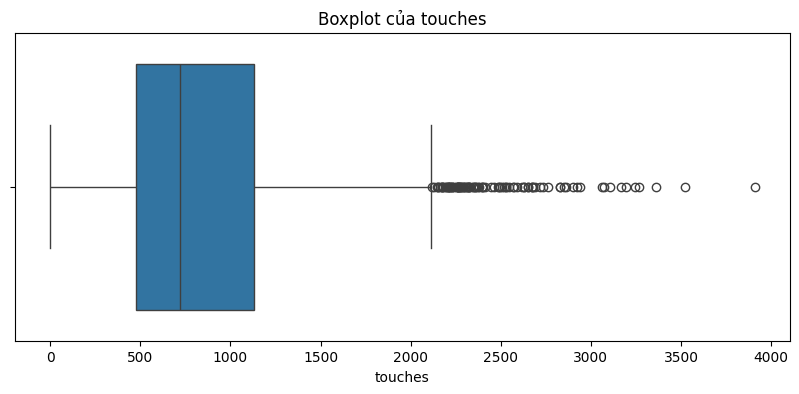


Cột: touches_in_opp_box
Số lượng outliers (IQR): 106
Giá trị outliers (IQR):
touches_in_opp_box
147.833333    9
116.000000    6
140.000000    4
146.000000    4
215.000000    3
Name: count, dtype: int64

Số lượng outliers (Z-score): 72
Giá trị outliers (Z-score):
touches_in_opp_box
147.833333    9
146.000000    4
167.000000    3
215.000000    3
157.000000    3
Name: count, dtype: int64


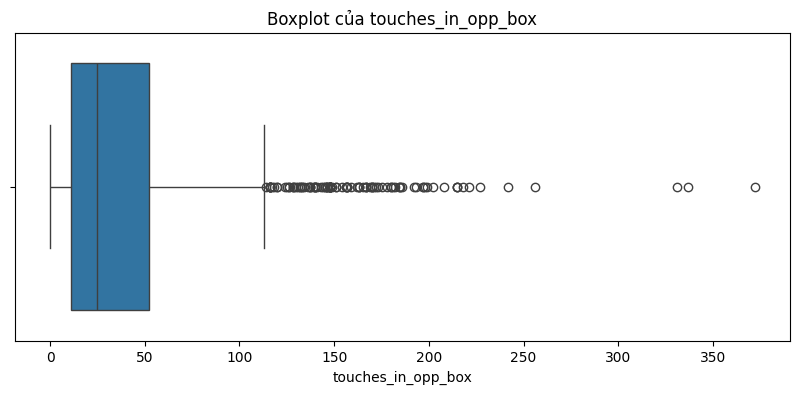


Cột: turnover
Số lượng outliers (IQR): 92
Giá trị outliers (IQR):
turnover
68.0    6
70.0    5
72.0    5
63.0    5
66.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
turnover
74.0     5
99.0     4
84.0     3
104.0    3
78.0     3
Name: count, dtype: int64


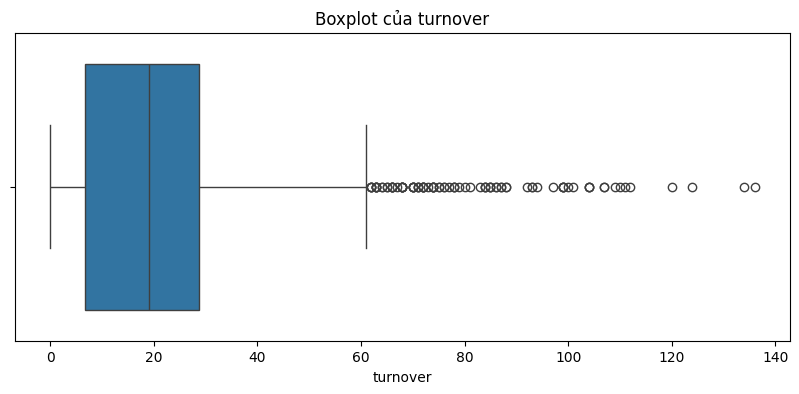


Cột: unsuccessful_touch
Số lượng outliers (IQR): 92
Giá trị outliers (IQR):
unsuccessful_touch
68.0    6
70.0    5
72.0    5
63.0    5
66.0    5
Name: count, dtype: int64

Số lượng outliers (Z-score): 53
Giá trị outliers (Z-score):
unsuccessful_touch
74.0     5
99.0     4
84.0     3
104.0    3
78.0     3
Name: count, dtype: int64


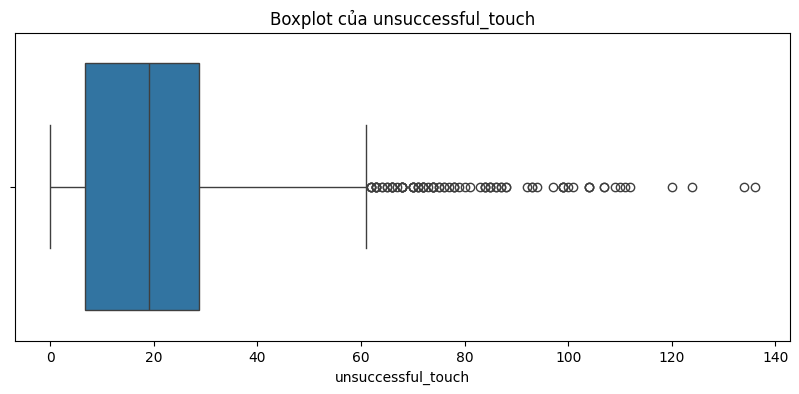


Cột: was_fouled
Số lượng outliers (IQR): 137
Giá trị outliers (IQR):
was_fouled
38.0    14
39.0    11
50.0    11
40.0     8
47.0     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
was_fouled
50.0    11
48.0     4
51.0     4
57.0     4
55.0     3
Name: count, dtype: int64


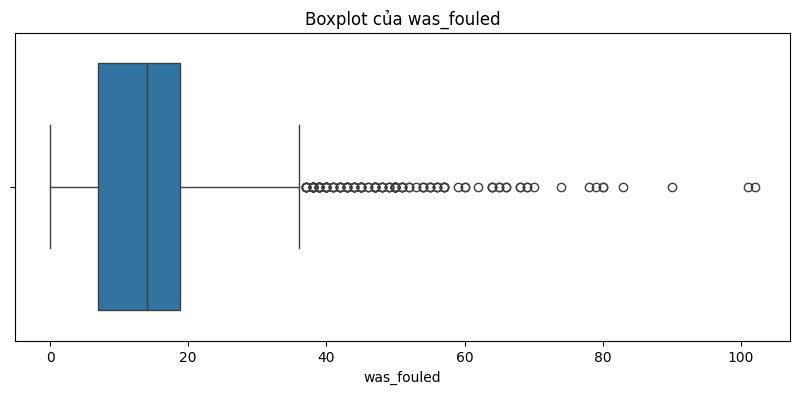


Cột: winning_goal
Số lượng outliers (IQR): 170
Giá trị outliers (IQR):
winning_goal
2.000000    80
3.000000    41
4.000000    16
5.000000     9
2.692308     8
Name: count, dtype: int64

Số lượng outliers (Z-score): 41
Giá trị outliers (Z-score):
winning_goal
4.0     16
5.0      9
6.0      7
7.0      4
10.0     2
Name: count, dtype: int64


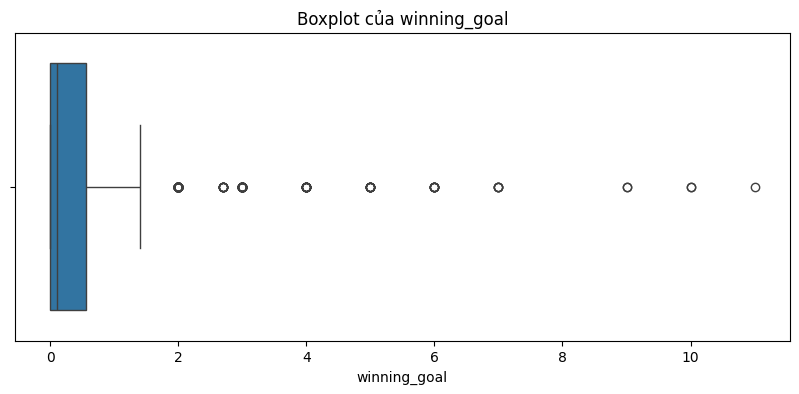


Cột: wins
Số lượng outliers (IQR): 216
Giá trị outliers (IQR):
wins
16.0    38
18.0    34
15.0    31
17.0    24
19.0    19
Name: count, dtype: int64

Số lượng outliers (Z-score): 63
Giá trị outliers (Z-score):
wins
21.0    14
24.0    11
22.0     9
23.0     9
25.0     8
Name: count, dtype: int64


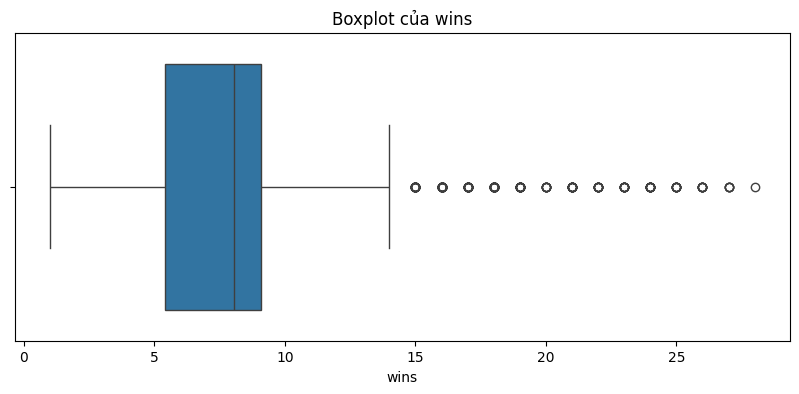


Cột: won_contest
Số lượng outliers (IQR): 164
Giá trị outliers (IQR):
won_contest
34.0    19
36.0    11
33.0    10
40.0     9
35.0     9
Name: count, dtype: int64

Số lượng outliers (Z-score): 57
Giá trị outliers (Z-score):
won_contest
50.0    5
47.0    5
51.0    5
54.0    4
53.0    4
Name: count, dtype: int64


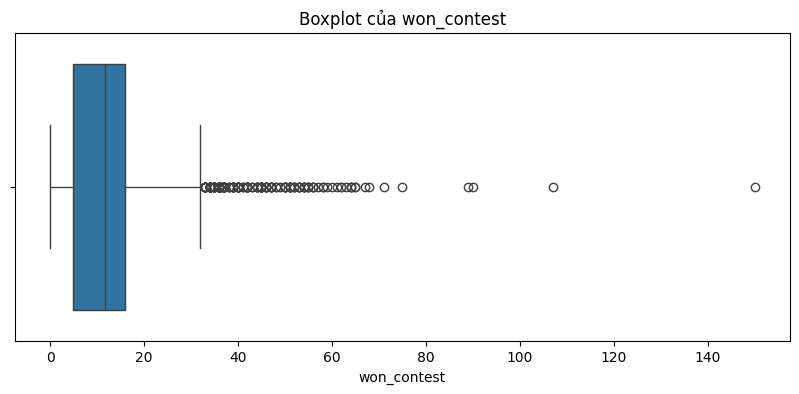


Cột: won_corners
Số lượng outliers (IQR): 125
Giá trị outliers (IQR):
won_corners
24.000000    17
26.000000    11
26.363636    10
31.000000     7
25.000000     7
Name: count, dtype: int64

Số lượng outliers (Z-score): 70
Giá trị outliers (Z-score):
won_corners
31.0    7
30.0    7
33.0    7
29.0    7
41.0    6
Name: count, dtype: int64


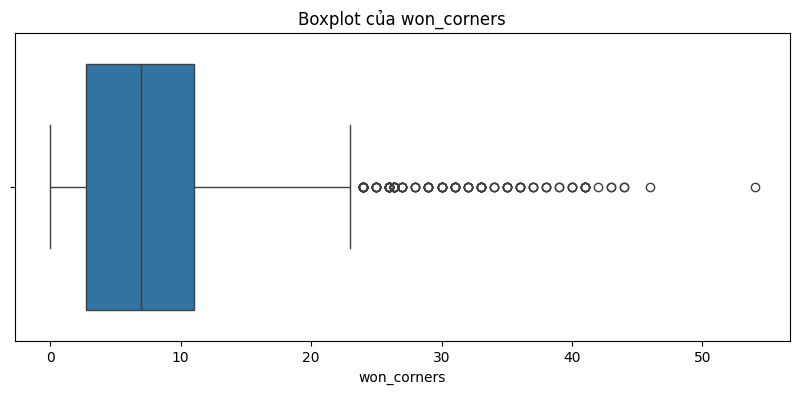


Cột: won_tackle
Số lượng outliers (IQR): 91
Giá trị outliers (IQR):
won_tackle
42.0    9
41.0    9
40.0    9
43.0    7
46.0    7
Name: count, dtype: int64

Số lượng outliers (Z-score): 50
Giá trị outliers (Z-score):
won_tackle
46.0    7
49.0    6
50.0    5
47.0    5
57.0    5
Name: count, dtype: int64


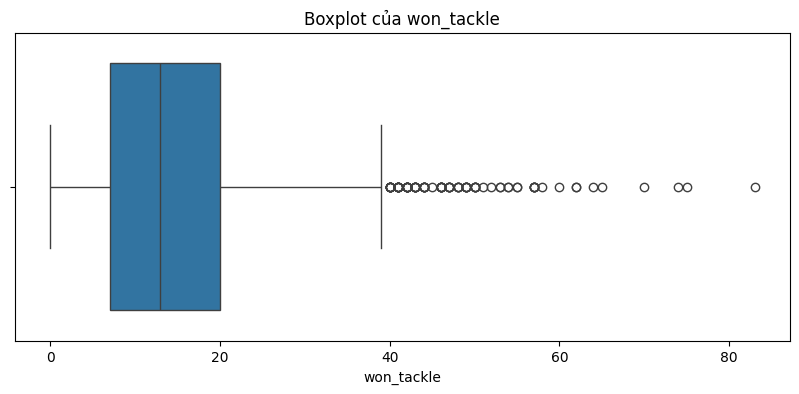


Cột: yellow_card
Số lượng outliers (IQR): 147
Giá trị outliers (IQR):
yellow_card
7.0     54
8.0     44
9.0     22
10.0    13
11.0    10
Name: count, dtype: int64

Số lượng outliers (Z-score): 49
Giá trị outliers (Z-score):
yellow_card
9.0     22
10.0    13
11.0    10
12.0     3
14.0     1
Name: count, dtype: int64


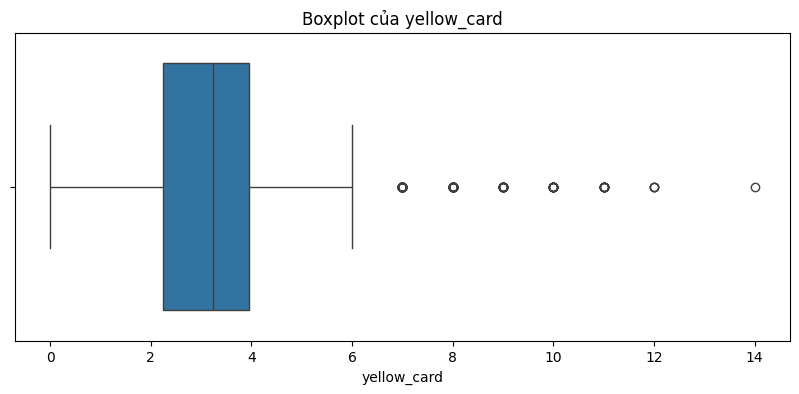


Thống kê cơ bản của các cột có nhiều outliers:

Cột player_id:
count      2986.000000
mean      46976.700268
std       42586.350125
min        1870.000000
25%       12704.000000
50%       25281.000000
75%       69258.500000
max      303421.000000
Name: player_id, dtype: float64

Cột age:
count    2986.000000
mean       26.152713
std         5.119751
min        15.000000
25%        22.000000
50%        25.000000
75%        30.000000
max        43.000000
Name: age, dtype: float64

Cột mins_played:
count    2986.000000
mean     1301.200795
std       768.587568
min         1.000000
25%       832.000000
50%      1363.604651
75%      1646.654867
max      3420.000000
Name: mins_played, dtype: float64

Cột goals:
count    2986.000000
mean        3.194617
std         2.488506
min         0.000000
25%         1.604167
50%         2.686747
75%         4.000000
max        36.000000
Name: goals, dtype: float64

Cột accurate_back_zone_pass:
count    2986.000000
mean      252.816107
std       229.74

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy các cột số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hàm kiểm tra outliers bằng IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Hàm kiểm tra outliers bằng Z-score
def detect_outliers_zscore(df, column):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > 3][column]
    return outliers

# Kiểm tra outliers cho từng cột
print("Kiểm tra outliers cho các cột số:\n")
for col in numeric_columns:
    print(f"\nCột: {col}")
    
    # Kiểm tra bằng IQR
    outliers_iqr = detect_outliers_iqr(df, col)
    print(f"Số lượng outliers (IQR): {len(outliers_iqr)}")
    if len(outliers_iqr) > 0:
        print("Giá trị outliers (IQR):")
        print(outliers_iqr.value_counts().head())
    
    # Kiểm tra bằng Z-score
    outliers_zscore = detect_outliers_zscore(df, col)
    print(f"\nSố lượng outliers (Z-score): {len(outliers_zscore)}")
    if len(outliers_zscore) > 0:
        print("Giá trị outliers (Z-score):")
        print(outliers_zscore.value_counts().head())
    
    # Vẽ boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot của {col}')
    plt.show()

# In thống kê cơ bản của các cột có nhiều outliers
print("\nThống kê cơ bản của các cột có nhiều outliers:")
for col in numeric_columns:
    outliers_iqr = detect_outliers_iqr(df, col)
    if len(outliers_iqr) > 0:
        print(f"\nCột {col}:")
        print(df[col].describe())